In [1]:
library(tidyverse)
library(lubridate)
library(ggtext)


library(assertr)

library(DBI)


── Attaching packages ────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ───────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Notes


#### Legal (ISO) gender types:

* https://data.gov.uk/education-standards/sites/default/files/CL-Legal-Sex-Type-v2-0.pdf


#### For data stored as % 

* need to relax sum to 100%
* 			
Symbol	Meaning		
    * '-'	Not Applicable		
    * '-'	No Entries (Table 3)		
    * 0%	Less than 0.5%		
    * ***	Fewer Than 5 Entries	
    
<br />&nbsp;<br />

In [2]:
focus_subject <- "computing" # use a vector for multiple patterns
redundant_column_flags <- c("-Passes", "-percentage*", "-COMP", "-PassesUngradedCourses")

path_to_file_store <- "sta_it_402/data"

# todo - complete and include level - 
sqa_qualification_list <- read_csv("sta_it_402/data/grades/sqa_qualifications.csv", trim_ws = T)
sqa_qualification_list


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  AwardId = col_character(),
  AwardTitle = col_character(),
  Level = col_logical(),
  DataStartYear = col_double(),
  DataEndYear = col_double()
)




AwardId                   AwardTitle                         Level
1  Higher                    Higher                             NA   
2  AdvancedHigher            Advanced Higher                    NA   
3  OrdinaryGrade             Ordinary Grade                     NA   
4  NewHigher                 New Higher                         NA   
5  StandardGrade             Standard Grade                     NA   
6  CSYS                      Certiificate of Sixth Year Studies NA   
7  HigherNational            Higher National                    NA   
8  HigherNationalCertificate Higher National Certificate        NA   
9  HigherNationalDiploma     Higher National Diploma            NA   
10 HigherNationalUnit        Higher National Unit               NA   
   DataStartYear DataEndYear
1  1986            NA       
2  2001            NA       
3  1986            NA       
4  2000          2000       
5    NA            NA       
6    NA            NA       
7    NA            NA       
8    NA            NA       
9    NA            NA       
10   NA            NA

In [3]:
guess_formats("2020", orders = "%Y")

Y 
"%Y"

In [4]:
sqa_qualification_list <- sqa_qualification_list %>%
    mutate_at(c("DataStartYear", "DataEndYear"), as.integer) #%>%
    #mutate_at(c("DataStartYear"), parse_date, "Y")

glimpse(sqa_qualification_list)

Rows: 10
Columns: 5
$ AwardId       <chr> "Higher", "AdvancedHigher", "OrdinaryGrade", "NewHigher…
$ AwardTitle    <chr> "Higher", "Advanced Higher", "Ordinary Grade", "New Hig…
$ Level         <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA
$ DataStartYear <int> 1986, 2001, 1986, 2000, NA, NA, NA, NA, NA, NA
$ DataEndYear   <int> NA, NA, NA, 2000, NA, NA, NA, NA, NA, NA


In [5]:
files_to_verify <- list.files(path_to_file_store, pattern = "higher", full.names = T, 
                              ignore.case = T, recursive = T) #%>%
                        #as.data.frame
files_to_verify

[1] "sta_it_402/data/grades/1986_Higher.csv"        
 [2] "sta_it_402/data/grades/1987_Higher.csv"        
 [3] "sta_it_402/data/grades/1988_Higher.csv"        
 [4] "sta_it_402/data/grades/1989_Higher.csv"        
 [5] "sta_it_402/data/grades/1990_Higher.csv"        
 [6] "sta_it_402/data/grades/1991_Higher.csv"        
 [7] "sta_it_402/data/grades/1992_Higher.csv"        
 [8] "sta_it_402/data/grades/1993_Higher.csv"        
 [9] "sta_it_402/data/grades/1994_Higher.csv"        
[10] "sta_it_402/data/grades/1995_Higher.csv"        
[11] "sta_it_402/data/grades/1996_Higher.csv"        
[12] "sta_it_402/data/grades/1997_Higher.csv"        
[13] "sta_it_402/data/grades/1998_Higher.csv"        
[14] "sta_it_402/data/grades/1999_Higher.csv"        
[15] "sta_it_402/data/grades/2000_NewHigher.csv"     
[16] "sta_it_402/data/grades/2001_AdvancedHigher.csv"
[17] "sta_it_402/data/grades/2001_Higher.csv"        
[18] "sta_it_402/data/grades/2002_AdvancedHigher.csv"
[19] "sta_it_402/data/grades/2002_Higher.csv"        
[20] "sta_it_402/data/grades/2005_AdvancedHigher.csv"
[21] "sta_it_402/data/grades/2005_HigherNational.csv"
[22] "sta_it_402/data/grades/2012_AdvancedHigher.csv"
[23] "sta_it_402/data/grades/2012_Higher.csv"        
[24] "sta_it_402/data/grades/2016_AdvancedHigher.csv"
[25] "sta_it_402/data/grades/2016_Higher.csv"        
[26] "sta_it_402/data/grades/2017_AdvancedHigher.csv"
[27] "sta_it_402/data/grades/2017_Higher.csv"        
[28] "sta_it_402/data/grades/2018_AdvancedHigher.csv"
[29] "sta_it_402/data/grades/2018_Higher.csv"        
[30] "sta_it_402/data/grades/2019_AdvancedHigher.csv"
[31] "sta_it_402/data/grades/2019_Higher.csv"

<br /> &nbsp;<br />
<h3>1986-8</h3>

* Standard Grades only

* Ordinary Grade, Higher &amp; CSYS did not include Computing

<br />

* __NoAward__ calculated as diff b/n all entries and grades awarded. The value represents both those who did not achieve a named grade or did not take the assessment but were not withdrawn

<br />


* From 1999 to ?
    * Awards in Optional Papers, Music Practical Harmony and Music Parts II - VI are not expressed in terms of bands.



<br /> &nbsp; <br />

<h3>1989</h3>
<br /> &nbsp; <br />




In [6]:
higher_1989 <- read_csv("sta_it_402/data/grades/1989_Higher.csv", trim_ws = T) %>% #, skip_empty_rows = T) # NOT skipping empty rows... :(
                    filter(rowSums(is.na(.)) != ncol(.))

glimpse(higher_1989)
head(higher_1989)
spec(higher_1989)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




Rows: 56
Columns: 20
$ Subject          <chr> "Accounting", "Agricultural Science", "Anatomy, Phys…
$ `male-Entries`   <chr> "1,994", "4", "239", "2,890", "4,275", "7,523", "469…
$ `male-A`         <chr> "184", "2", "18", "232", "583", "1,240", "58", "148"…
$ `male-B`         <chr> "447", "1", "37", "633", "1,118", "1,848", "85", "36…
$ `male-C`         <chr> "691", "1", "73", "1,227", "1,186", "2,174", "145", …
$ `male-Passes`    <chr> "1,322", "4", "128", "2,092", "2,887", "5,262", "288…
$ `male-D`         <chr> "429", "-", "54", "615", "844", "1,472", "84", "319"…
$ `female-Entries` <chr> "2,509", "3", "1,149", "4,776", "8,552", "6,001", "1…
$ `female-A`       <chr> "188", "1", "72", "576", "853", "688", "10", "8", "1…
$ `female-B`       <chr> "469", "-", "206", "1,400", "1,953", "1,424", "22", …
$ `female-C`       <chr> "903", "2", "352", "1,949", "2,642", "1,875", "33", …
$ `female-Passes`  <chr> "1,560", "3", "630", "3,925", "5,448", "3,987", "65"…
$ `female-D`       <chr> "621",

Subject                        male-Entries male-A male-B male-C male-Passes
1 Accounting                     1,994        184    447    691    1,322      
2 Agricultural Science           4            2      1      1      4          
3 Anatomy, Physiology and Health 239          18     37     73     128        
4 Art and Design                 2,890        232    633    1,227  2,092      
5 Biology                        4,275        583    1,118  1,186  2,887      
6 Chemistry                      7,523        1,240  1,848  2,174  5,262      
  male-D female-Entries female-A female-B female-C female-Passes female-D
1 429    2,509          188      469      903      1,560         621     
2 -      3              1        -        2        3             -       
3 54     1,149          72       206      352      630           279     
4 615    4,776          576      1,400    1,949    3,925         682     
5 844    8,552          853      1,953    2,642    5,448         1,981   
6 1,472  6,001          688      1,424    1,875    3,987         1,347   
  all-Entries all-A all-B all-C all-Passes all-D NumberOfCentres
1 4,503       372   916   1,594 2,882      1,050 432            
2 7           3     1     3     7          -     2              
3 1,388       90    243   425   758        333   179            
4 7,666       808   2,033 3,176 6,017      1,297 512            
5 12,827      1,436 3,071 3,828 8,335      2,825 536            
6 13,524      1,928 3,272 4,049 9,249      2,819 497

cols(
  Subject = col_character(),
  `male-Entries` = col_character(),
  `male-A` = col_character(),
  `male-B` = col_character(),
  `male-C` = col_character(),
  `male-Passes` = col_character(),
  `male-D` = col_character(),
  `female-Entries` = col_character(),
  `female-A` = col_character(),
  `female-B` = col_character(),
  `female-C` = col_character(),
  `female-Passes` = col_character(),
  `female-D` = col_character(),
  `all-Entries` = col_character(),
  `all-A` = col_character(),
  `all-B` = col_character(),
  `all-C` = col_character(),
  `all-Passes` = col_character(),
  `all-D` = col_character(),
  NumberOfCentres = col_character()
)

In [7]:
higher_1989 <- higher_1989 %>%
    distinct(across(everything()), .keep_all = TRUE)

# confirm all entries unique - Subject, (gender,) grade 
higher_1989 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%

    assert_rows(col_concat, is_uniq, Subject, grade) %>%
    nrow

[1] 1008

In [8]:
# use parse_number (not parse_integer) to remove any formatting such as thousand separators. 
# convert all to x'ter first - some will be number, some character, but the former ensures it 
# reads exactly as stored in file, esp if you have set-up to auto-convert to factor
# final conversion to integer - they should all be integers - count of humans
# note however, at the point in the late 20-teens when the data is by percentage this should 
# probably include a check and change to round - NOTE TO SELF - update this once check done

higher_1989 <- higher_1989 %>%
    mutate_at(c("Subject"), as.factor) %>%
    mutate_at(c("NumberOfCentres"), as.integer) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), as.character) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), parse_number) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), as.integer) 

glimpse(higher_1989)     
head(higher_1989)

Warning message:
“Problem with `mutate()` input `NumberOfCentres`.
ℹ NAs introduced by coercion
ℹ Input `NumberOfCentres` is `.Primitive("as.integer")(NumberOfCentres)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `male-Entries`.
ℹ 4 parsing failures.
row col expected actual
 21  -- a number      -
 23  -- a number      -
 26  -- a number      -
 54  -- a number      -

ℹ Input `male-Entries` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“4 parsing failures.
row col expected actual
 21  -- a number      -
 23  -- a number      -
 26  -- a number      -
 54  -- a number      -
”
Warning message:
“Problem with `mutate()` input `male-A`.
ℹ 14 parsing failures.
row col expected actual
 21  -- a number      -
 23  -- a number      -
 26  -- a number      -
 27  -- a number      -
 31  -- a number      -
... ... ........ ......
See problems(...) for m

Warning message:
“Problem with `mutate()` input `all-B`.
ℹ 10 parsing failures.
row col expected actual
 21  -- a number      -
 23  -- a number      -
 31  -- a number      -
 38  -- a number      -
 39  -- a number      -
... ... ........ ......
See problems(...) for more details.

ℹ Input `all-B` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“10 parsing failures.
row col expected actual
 21  -- a number      -
 23  -- a number      -
 31  -- a number      -
 38  -- a number      -
 39  -- a number      -
... ... ........ ......
See problems(...) for more details.
”
Warning message:
“Problem with `mutate()` input `all-C`.
ℹ 10 parsing failures.
row col expected actual
 21  -- a number      -
 23  -- a number      -
 31  -- a number      -
 38  -- a number      -
 39  -- a number      -
... ... ........ ......
See problems(...) for more details.

ℹ Input `all-C` is `(function (x, na = c("", "NA"), locale = default_locale(), trim

Rows: 56
Columns: 20
$ Subject          <fct> "Accounting", "Agricultural Science", "Anatomy, Phys…
$ `male-Entries`   <int> 1994, 4, 239, 2890, 4275, 7523, 469, 1579, 155, 2239…
$ `male-A`         <int> 184, 2, 18, 232, 583, 1240, 58, 148, 13, 344, 22, 11…
$ `male-B`         <int> 447, 1, 37, 633, 1118, 1848, 85, 364, 74, 573, 38, 2…
$ `male-C`         <int> 691, 1, 73, 1227, 1186, 2174, 145, 505, 38, 732, 47,…
$ `male-Passes`    <int> 1322, 4, 128, 2092, 2887, 5262, 288, 1017, 125, 1649…
$ `male-D`         <int> 429, NA, 54, 615, 844, 1472, 84, 319, 16, 371, 39, 2…
$ `female-Entries` <int> 2509, 3, 1149, 4776, 8552, 6001, 124, 158, 152, 1817…
$ `female-A`       <int> 188, 1, 72, 576, 853, 688, 10, 8, 17, 163, 2, 240, 2…
$ `female-B`       <int> 469, NA, 206, 1400, 1953, 1424, 22, 38, 61, 409, 4, …
$ `female-C`       <int> 903, 2, 352, 1949, 2642, 1875, 33, 59, 44, 665, 4, 5…
$ `female-Passes`  <int> 1560, 3, 630, 3925, 5448, 3987, 65, 105, 122, 1237, …
$ `female-D`       <int> 621, N

Subject                        male-Entries male-A male-B male-C male-Passes
1 Accounting                     1994          184    447    691   1322       
2 Agricultural Science              4            2      1      1      4       
3 Anatomy, Physiology and Health  239           18     37     73    128       
4 Art and Design                 2890          232    633   1227   2092       
5 Biology                        4275          583   1118   1186   2887       
6 Chemistry                      7523         1240   1848   2174   5262       
  male-D female-Entries female-A female-B female-C female-Passes female-D
1  429   2509           188       469      903     1560           621    
2   NA      3             1        NA        2        3            NA    
3   54   1149            72       206      352      630           279    
4  615   4776           576      1400     1949     3925           682    
5  844   8552           853      1953     2642     5448          1981    
6 1472   6001           688      1424     1875     3987          1347    
  all-Entries all-A all-B all-C all-Passes all-D NumberOfCentres
1  4503        372   916  1594  2882       1050  432            
2     7          3     1     3     7         NA    2            
3  1388         90   243   425   758        333  179            
4  7666        808  2033  3176  6017       1297  512            
5 12827       1436  3071  3828  8335       2825  536            
6 13524       1928  3272  4049  9249       2819  497

In [9]:
# only need to watch empty entries, but need to corect those with mismatches

higher_1989 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter(gender == "all") %>%

    full_join(

        higher_1989 %>%
            pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
            separate("grade", c("gender", "grade")) %>%
            mutate_at(c("gender", "grade"), as.factor) %>%
            filter(gender %in% c("male", "female")) %>%

            group_by(Subject, grade) %>%
            summarise(TotalStudentsByGender = sum(NoOfStudents, na.rm = T)) 
    ) %>%

    filter((NoOfStudents != TotalStudentsByGender) | is.na(NoOfStudents) | is.na(TotalStudentsByGender))

tail(higher_1989)

`summarise()` regrouping output by 'Subject' (override with `.groups` argument)

Joining, by = c("Subject", "grade")



Subject                     NumberOfCentres gender grade   NoOfStudents
1  Agricultural Science         2              all    D       NA          
2  Greek (Optional Paper III)* NA              all    Entries NA          
3  Greek (Optional Paper III)* NA              all    A       NA          
4  Greek (Optional Paper III)* NA              all    B       NA          
5  Greek (Optional Paper III)* NA              all    C       NA          
6  Greek (Optional Paper III)* NA              all    Passes  NA          
7  Greek (Optional Paper III)* NA              all    D       NA          
8  Hebrew                       1              all    B       NA          
9  Hebrew                       1              all    C       NA          
10 Hebrew                       1              all    D       NA          
11 Home Economics (Revised)    11              all    A       NA          
12 Latin (Optional Paper III)*  3              all    A       NA          
13 Latin (Optional Paper III)*  3              all    B       NA          
14 Latin (Optional Paper III)*  3              all    C       NA          
15 Latin (Optional Paper III)*  3              all    D       NA          
16 Music (Practical Harmony)*  54              all    A       NA          
17 Music (Practical Harmony)*  54              all    B       NA          
18 Music (Practical Harmony)*  54              all    C       NA          
19 Music (Practical Harmony)*  54              all    D       NA          
20 Music Part II*               7              all    A       NA          
21 Music Part II*               7              all    B       NA          
22 Music Part II*               7              all    C       NA          
23 Music Part II*               7              all    D       NA          
24 Music Part III*             17              all    A       NA          
25 Music Part III*             17              all    B       NA          
26 Music Part III*             17              all    C       NA          
27 Music Part III*             17              all    D       NA          
28 Music Part IV*               7              all    A       NA          
29 Music Part IV*               7              all    B       NA          
30 Music Part IV*               7              all    C       NA          
31 Music Part IV*               7              all    D       NA          
32 Music Part V*               25              all    A       NA          
33 Music Part V*               25              all    B       NA          
34 Music Part V*               25              all    C       NA          
35 Music Part V*               25              all    D       NA          
36 Music Part VI*              10              all    A       NA          
37 Music Part VI*              10              all    B       NA          
38 Music Part VI*              10              all    C       NA          
39 Music Part VI*              10              all    D       NA          
40 Navigation                   6              all    A       NA          
41 Norwegian                    7              all    D       NA          
42 Portuguese                   3              all    B       NA          
43 Portuguese                   3              all    C       NA          
44 Portuguese                   3              all    D       NA          
45 Swedish                      6              all    D       NA          
   TotalStudentsByGender
1  0                    
2  0                    
3  0                    
4  0                    
5  0                    
6  0                    
7  0                    
8  0                    
9  0                    
10 0                    
11 0                    
12 0                    
13 0                    
14 0                    
15 0                    
16 0                    
17 0                    
18 0                    
19 0                    
20 0                    
21 0                    
22 

Subject                                 male-Entries male-A male-B male-C
1 Secretarial Studies (Audio-typewriting)  121           8     26     45   
2 Secretarial Studies (Word Processing)     14          NA      6      3   
3 Spanish                                  131          33     41     33   
4 Swedish                                   NA          NA     NA     NA   
5 Technical Drawing                       1958         257    445    584   
6 Woodwork                                  99          10     22     33   
  male-Passes male-D female-Entries female-A female-B female-C female-Passes
1   79         25    4948           461      1324     1682     3467         
2    9          4     490            60       114      169      343         
3  107         18     402            84       102      120      306         
4   NA         NA       6             4         1        1        6         
5 1286        426     171            17        26       58      101         
6   65         22       9            NA        NA        5        5         
  female-D all-Entries all-A all-B all-C all-Passes all-D NumberOfCentres
1 846      5069        469   1350  1727  3546       871   386            
2  91       504         60    120   172   352        95    41            
3  74       533        117    143   153   413        92   124            
4  NA         6          4      1     1     6        NA     6            
5  45      2129        274    471   642  1387       471   377            
6   3       108         10     22    38    70        25    34

In [10]:
tmp_df <- higher_1989 %>%
    select(-matches(redundant_column_flags)) 
tmp_df[is.na(tmp_df)] <- 0

higher_1989 <- bind_cols(higher_1989,
        
    tmp_df %>%
        mutate("male-NoAward" = (`male-Entries` - reduce(select(., (starts_with("male") & !ends_with("-Entries"))), `+`)), # rowSums(select(., starts_with("male-")))
               "female-NoAward" = (`female-Entries` - reduce(select(., (starts_with("female") & !ends_with("-Entries"))), `+`)), 
               "all-NoAward" = (`all-Entries` - reduce(select(., (starts_with("all") & !ends_with("-Entries"))), `+`))) %>%
        select(c("male-NoAward", "female-NoAward", "all-NoAward"))
    ) %>%

    relocate(`male-NoAward`, .after = `male-Entries`) %>%
    relocate(`female-NoAward`, .after = `female-Entries`) %>%
    relocate(`all-NoAward`, .after = `all-Entries`) 

tail(higher_1989)
rm(tmp_df)

Subject                                 male-Entries male-NoAward male-A
1 Secretarial Studies (Audio-typewriting)  121          17            8   
2 Secretarial Studies (Word Processing)     14           1           NA   
3 Spanish                                  131           6           33   
4 Swedish                                   NA           0           NA   
5 Technical Drawing                       1958         246          257   
6 Woodwork                                  99          12           10   
  male-B male-C male-Passes male-D female-Entries female-NoAward ⋯
1  26     45      79         25    4948           635            ⋯
2   6      3       9          4     490            56            ⋯
3  41     33     107         18     402            22            ⋯
4  NA     NA      NA         NA       6             0            ⋯
5 445    584    1286        426     171            25            ⋯
6  22     33      65         22       9             1            ⋯
  female-Passes female-D all-Entries all-NoAward all-A all-B all-C all-Passes
1 3467          846      5069        652         469   1350  1727  3546      
2  343           91       504         57          60    120   172   352      
3  306           74       533         28         117    143   153   413      
4    6           NA         6          0           4      1     1     6      
5  101           45      2129        271         274    471   642  1387      
6    5            3       108         13          10     22    38    70      
  all-D NumberOfCentres
1 871   386            
2  95    41            
3  92   124            
4  NA     6            
5 471   377            
6  25    34

In [11]:
# themes commented out only because not currently needed or swapping between values

dressCodeTheme <- 
        theme_bw() +
        #theme_void() + 
        theme(panel.grid.major.y = element_line(), #panel.grid.minor.y = element_blank(),
                panel.grid.major.x = element_blank(), #panel.grid.minor.x = element_blank(), 
                axis.text.x = element_text(size = 12), # angle = 0, vjust = 0.3),
                axis.text.y = element_markdown(size = 12), #element_text(size = 12),
                #plot.title = element_text(size = 16),
                legend.text = element_text(size = 10), legend.title = element_text(size = 14),
                strip.text = element_text(size = 18)
            ) 

In [12]:
# evaluation will fail if focus_subject not set in advance
if (!exists("focus_subject") || is_null(focus_subject) || (str_trim(focus_subject) == "")) 
    focus_subject <- "computing"

formatted_subject_labels_as_expr <- expression(
    formatted_subject_labels <- paste0(
        "<span style = 'color: ",
             if_else(str_detect(Subject, regex(focus_subject, ignore_case = TRUE)), "maroon", "black"),
         "; font-weight: ",
             if_else(str_detect(Subject, regex(focus_subject, ignore_case = TRUE)), "bold", "normal"), # has no effect altho' docs say it's recognised :(...
         ";'>",
             if_else(str_detect(Subject, regex(focus_subject, ignore_case = TRUE)), "<b>", ""),

                 Subject,
             if_else(str_detect(Subject, regex(focus_subject, ignore_case = TRUE)), "</b>", ""),
         "</span>")
    )
formatted_subject_labels_as_expr


expression(formatted_subject_labels <- paste0("<span style = 'color: ", 
    if_else(str_detect(Subject, regex(focus_subject, ignore_case = TRUE)), 
        "maroon", "black"), "; font-weight: ", if_else(str_detect(Subject, 
        regex(focus_subject, ignore_case = TRUE)), "bold", "normal"), 
    ";'>", if_else(str_detect(Subject, regex(focus_subject, ignore_case = TRUE)), 
        "<b>", ""), Subject, if_else(str_detect(Subject, regex(focus_subject, 
        ignore_case = TRUE)), "</b>", ""), "</span>"))

In [13]:

head(higher_1989, 8) %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((gender %in% c("all")) & (grade %in% c("Entries"))) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot...

    mutate(Subject.label = eval(formatted_subject_labels_as_expr)) %>%
    mutate(Subject.label = fct_reorder(Subject.label, NoOfStudents))


Subject                        NumberOfCentres gender grade   NoOfStudents
1 Accounting                     432             all    Entries  4503       
2 Agricultural Science             2             all    Entries     7       
3 Anatomy, Physiology and Health 179             all    Entries  1388       
4 Art and Design                 512             all    Entries  7666       
5 Biology                        536             all    Entries 12827       
6 Chemistry                      497             all    Entries 13524       
7 Computing Studies               70             all    Entries   593       
8 Craft and Design               307             all    Entries  1737       
  Subject.label                                                                           
1 <span style = 'color: black; font-weight: normal;'>Accounting</span>                    
2 <span style = 'color: black; font-weight: normal;'>Agricultural Science</span>          
3 <span style = 'color: black; font-weight: normal;'>Anatomy, Physiology and Health</span>
4 <span style = 'color: black; font-weight: normal;'>Art and Design</span>                
5 <span style = 'color: black; font-weight: normal;'>Biology</span>                       
6 <span style = 'color: black; font-weight: normal;'>Chemistry</span>                     
7 <span style = 'color: maroon; font-weight: bold;'><b>Computing Studies</b></span>       
8 <span style = 'color: black; font-weight: normal;'>Craft and Design</span>

[1] "computing"

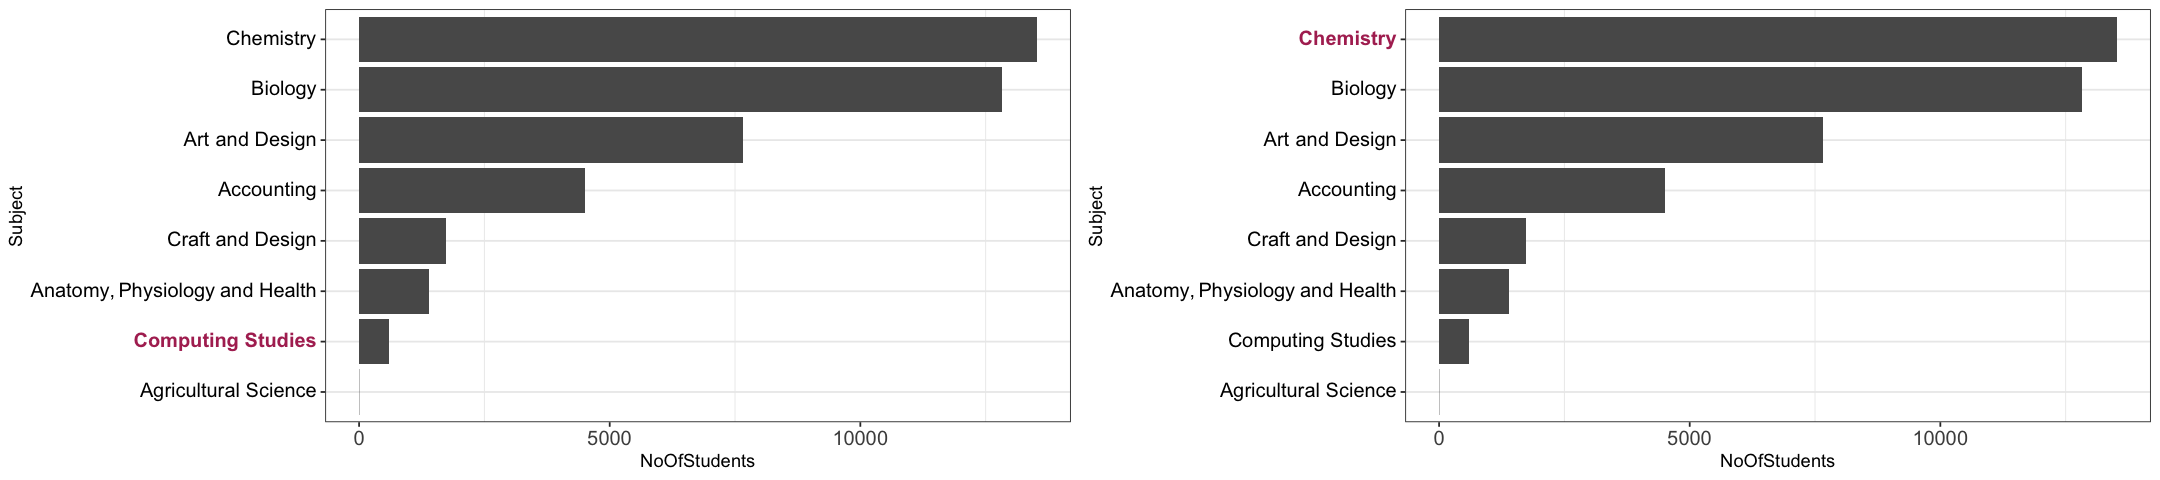

In [14]:
tmp_df <- head(higher_1989, 8) %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((gender %in% c("all")) & (grade %in% c("Entries"))) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) # instead of filter - want to keep labels in plot...


focus_subject
plot1 <- tmp_df %>%

    mutate((Subject.label = paste0("<span style = 'color: ",
                                 if_else(str_detect(Subject, regex(focus_subject, ignore_case = TRUE)), "maroon", "black"),
                                 "; font-weight: ",
                                 if_else(str_detect(Subject, regex(focus_subject, ignore_case = TRUE)), "bold", "normal"), # has no effect altho' docs say it's recognised :(...
                                 ";'>",
                                 if_else(str_detect(Subject, regex(focus_subject, ignore_case = TRUE)), "<b>", ""),
                                 
                                 Subject,
                                 if_else(str_detect(Subject, regex(focus_subject, ignore_case = TRUE)), "</b>", ""),
                                 "</span>")),
           Subject.label = fct_reorder(Subject.label, NoOfStudents)) %>%


    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_col() +
        ylab("Subject") +
        dressCodeTheme  +
        theme(axis.text.y = element_markdown())


focus_subject <- "chem" # test ...
plot2 <- tmp_df %>%

    mutate(Subject.label = eval(formatted_subject_labels_as_expr),
           Subject.label = fct_reorder(Subject.label, NoOfStudents)) %>%

    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_col() +
        ylab("Subject") +
        dressCodeTheme  #+
        #theme(axis.text.y = element_markdown())


options(repr.plot.width = 18, repr.plot.height = 4)
gridExtra::grid.arrange(plot1, plot2, nrow = 1)    


focus_subject <- "computing" # reset ...


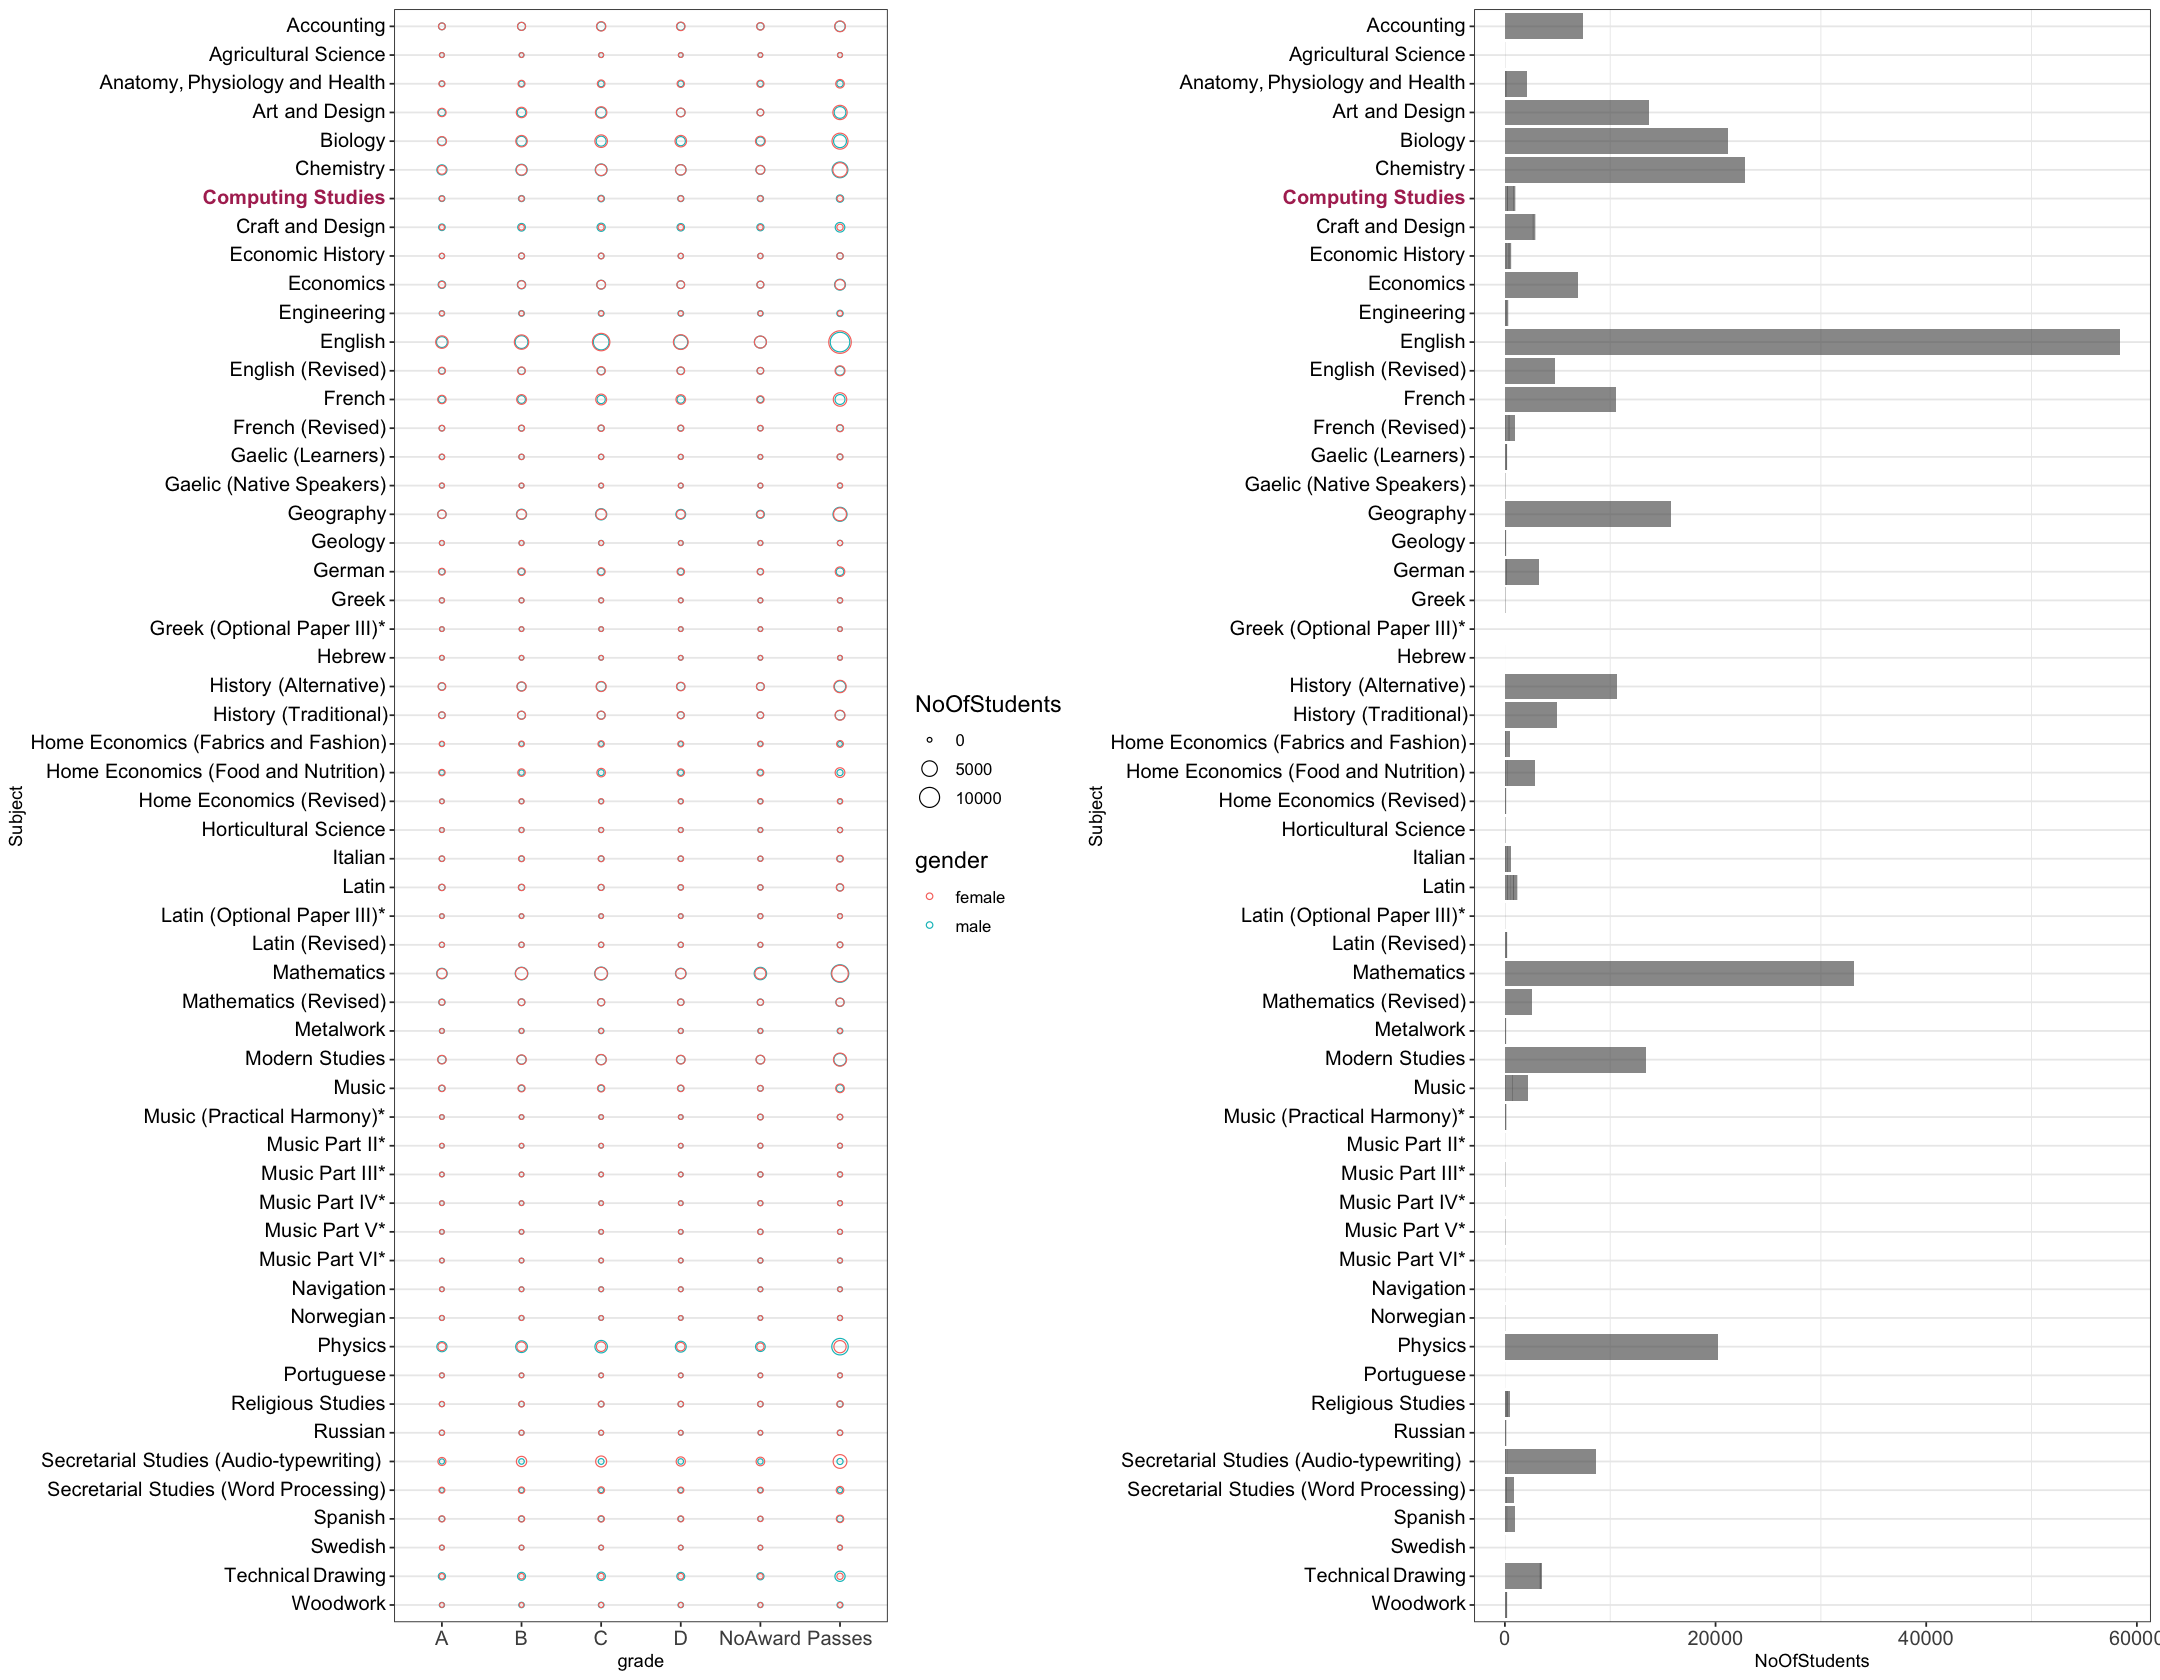

In [15]:
# second chart to draw attention to large disparity in entries per subject
# the bubble chart will need to use a log transform or similar to make the relative differences easier to read

# the default colour coding is non-ideal, and not just because it's pink-cyan but because it won't print well
# and is almost certainly not colour-blind proof. One of the things we'll need to decide on is a colour scheme.

# equivalent for element "Computing" (or current focus subject(s)) on Subject axis in maroon and bold 

tmp_df <- higher_1989 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter(!(gender %in% c("all")) & !(grade %in% c("Entries"))) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot...
    
    mutate(Subject.label = eval(formatted_subject_labels_as_expr),
           Subject.label = reorder(Subject.label, desc(Subject)))


plot1 <- tmp_df %>%

    ggplot(aes(y = Subject.label, x = grade, colour = gender), fill = NA) +
        geom_point(aes(size = NoOfStudents), pch = 21, na.rm = T) + # , alpha = 0.65
        ylab("Subject") +
        dressCodeTheme 


plot2 <- tmp_df %>%

    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_col(alpha = 0.65) +
        ylab("Subject") +
        dressCodeTheme 


options(repr.plot.width = 18, repr.plot.height = 14)
gridExtra::grid.arrange(plot1, plot2, nrow = 1)    
rm(tmp_df)


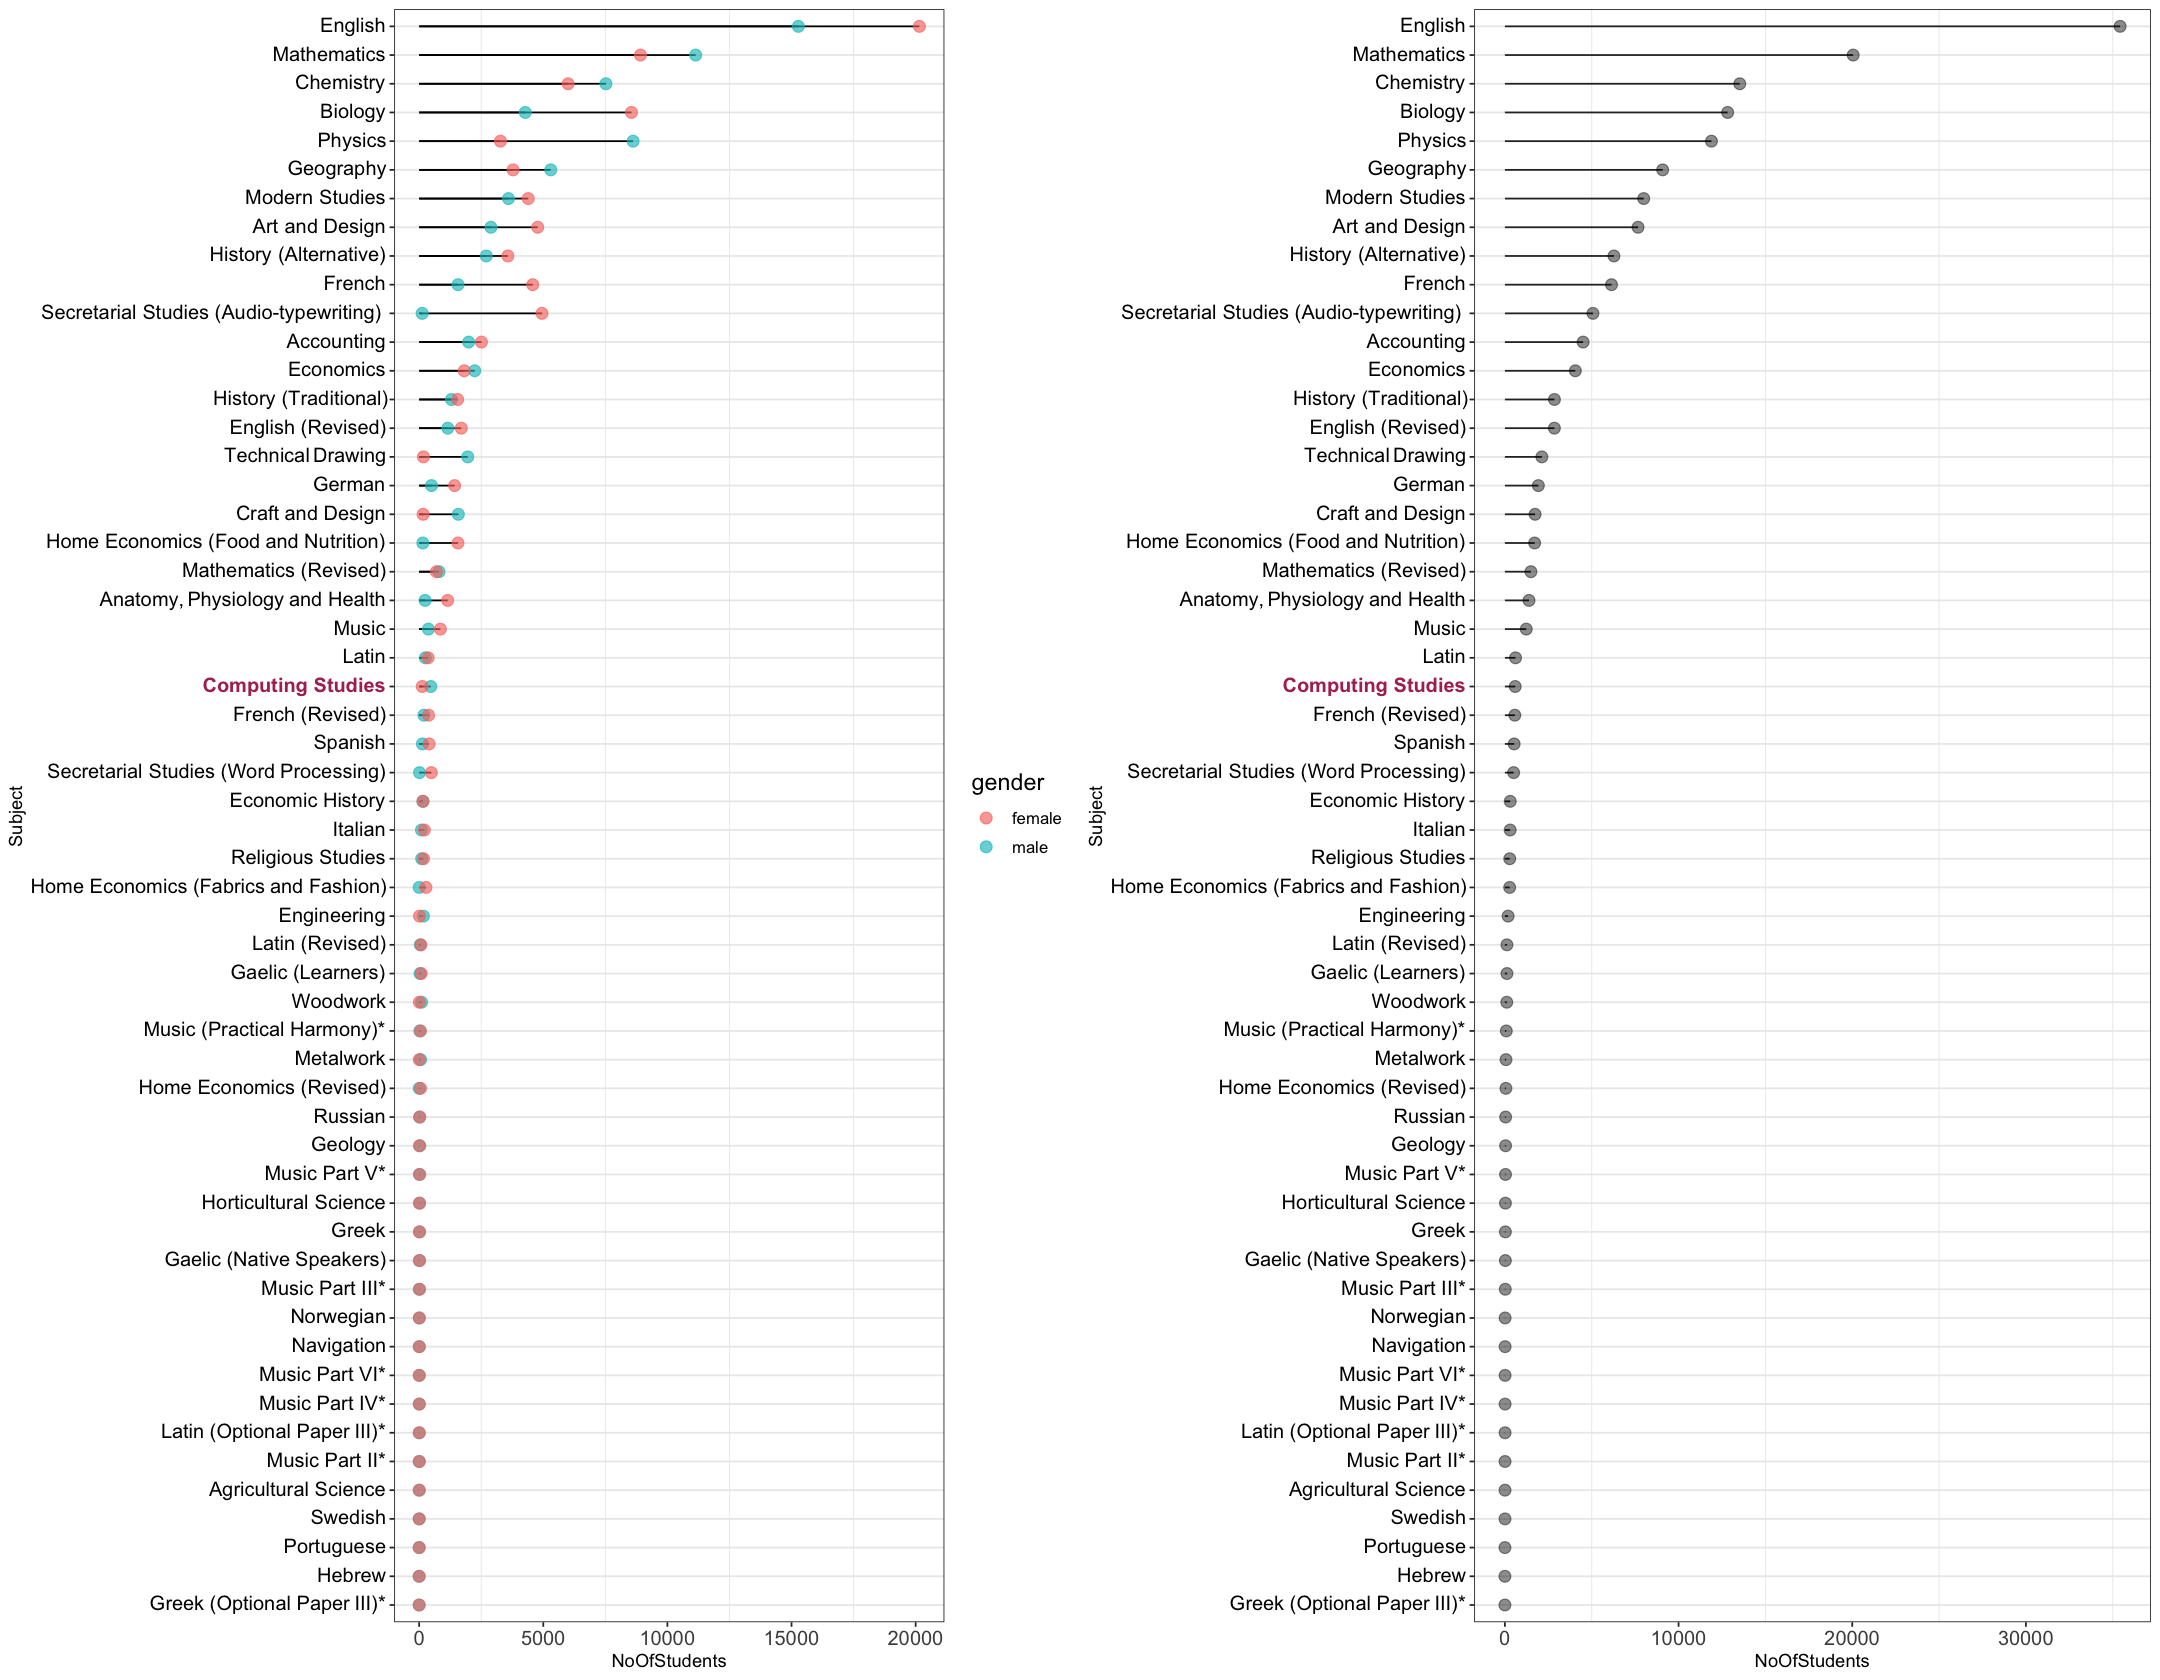

In [16]:
# order between the two y-axes may differ, depending on gender distribution 

tmp_df <- higher_1989 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter(grade %in% c("Entries")) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) # instead of filter - want to keep labels in plot...



plot1 <- tmp_df %>%
    filter(!(gender %in% c("all"))) %>%
    
    mutate(Subject.label = eval(formatted_subject_labels_as_expr),
           Subject.label = fct_reorder(Subject.label, NoOfStudents)) %>%

    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_segment(aes(xend = 0, yend = Subject.label)) +
        geom_point(aes(colour = gender), size = 3, alpha = 0.65) +
        ylab("Subject") +
        dressCodeTheme 


plot2 <- tmp_df %>%
    filter(gender %in% c("all")) %>%
    
    mutate(Subject.label = eval(formatted_subject_labels_as_expr),
           Subject.label = fct_reorder(Subject.label, NoOfStudents)) %>%

    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_segment(aes(xend = 0, yend = Subject.label), alpha = 0.85) +
        geom_point(size = 3, alpha = 0.45, show.legend = FALSE) + 
        ylab("Subject") +
        dressCodeTheme 


options(repr.plot.width = 18, repr.plot.height = 14)
gridExtra::grid.arrange(plot1, plot2, nrow = 1)    
rm(tmp_df)


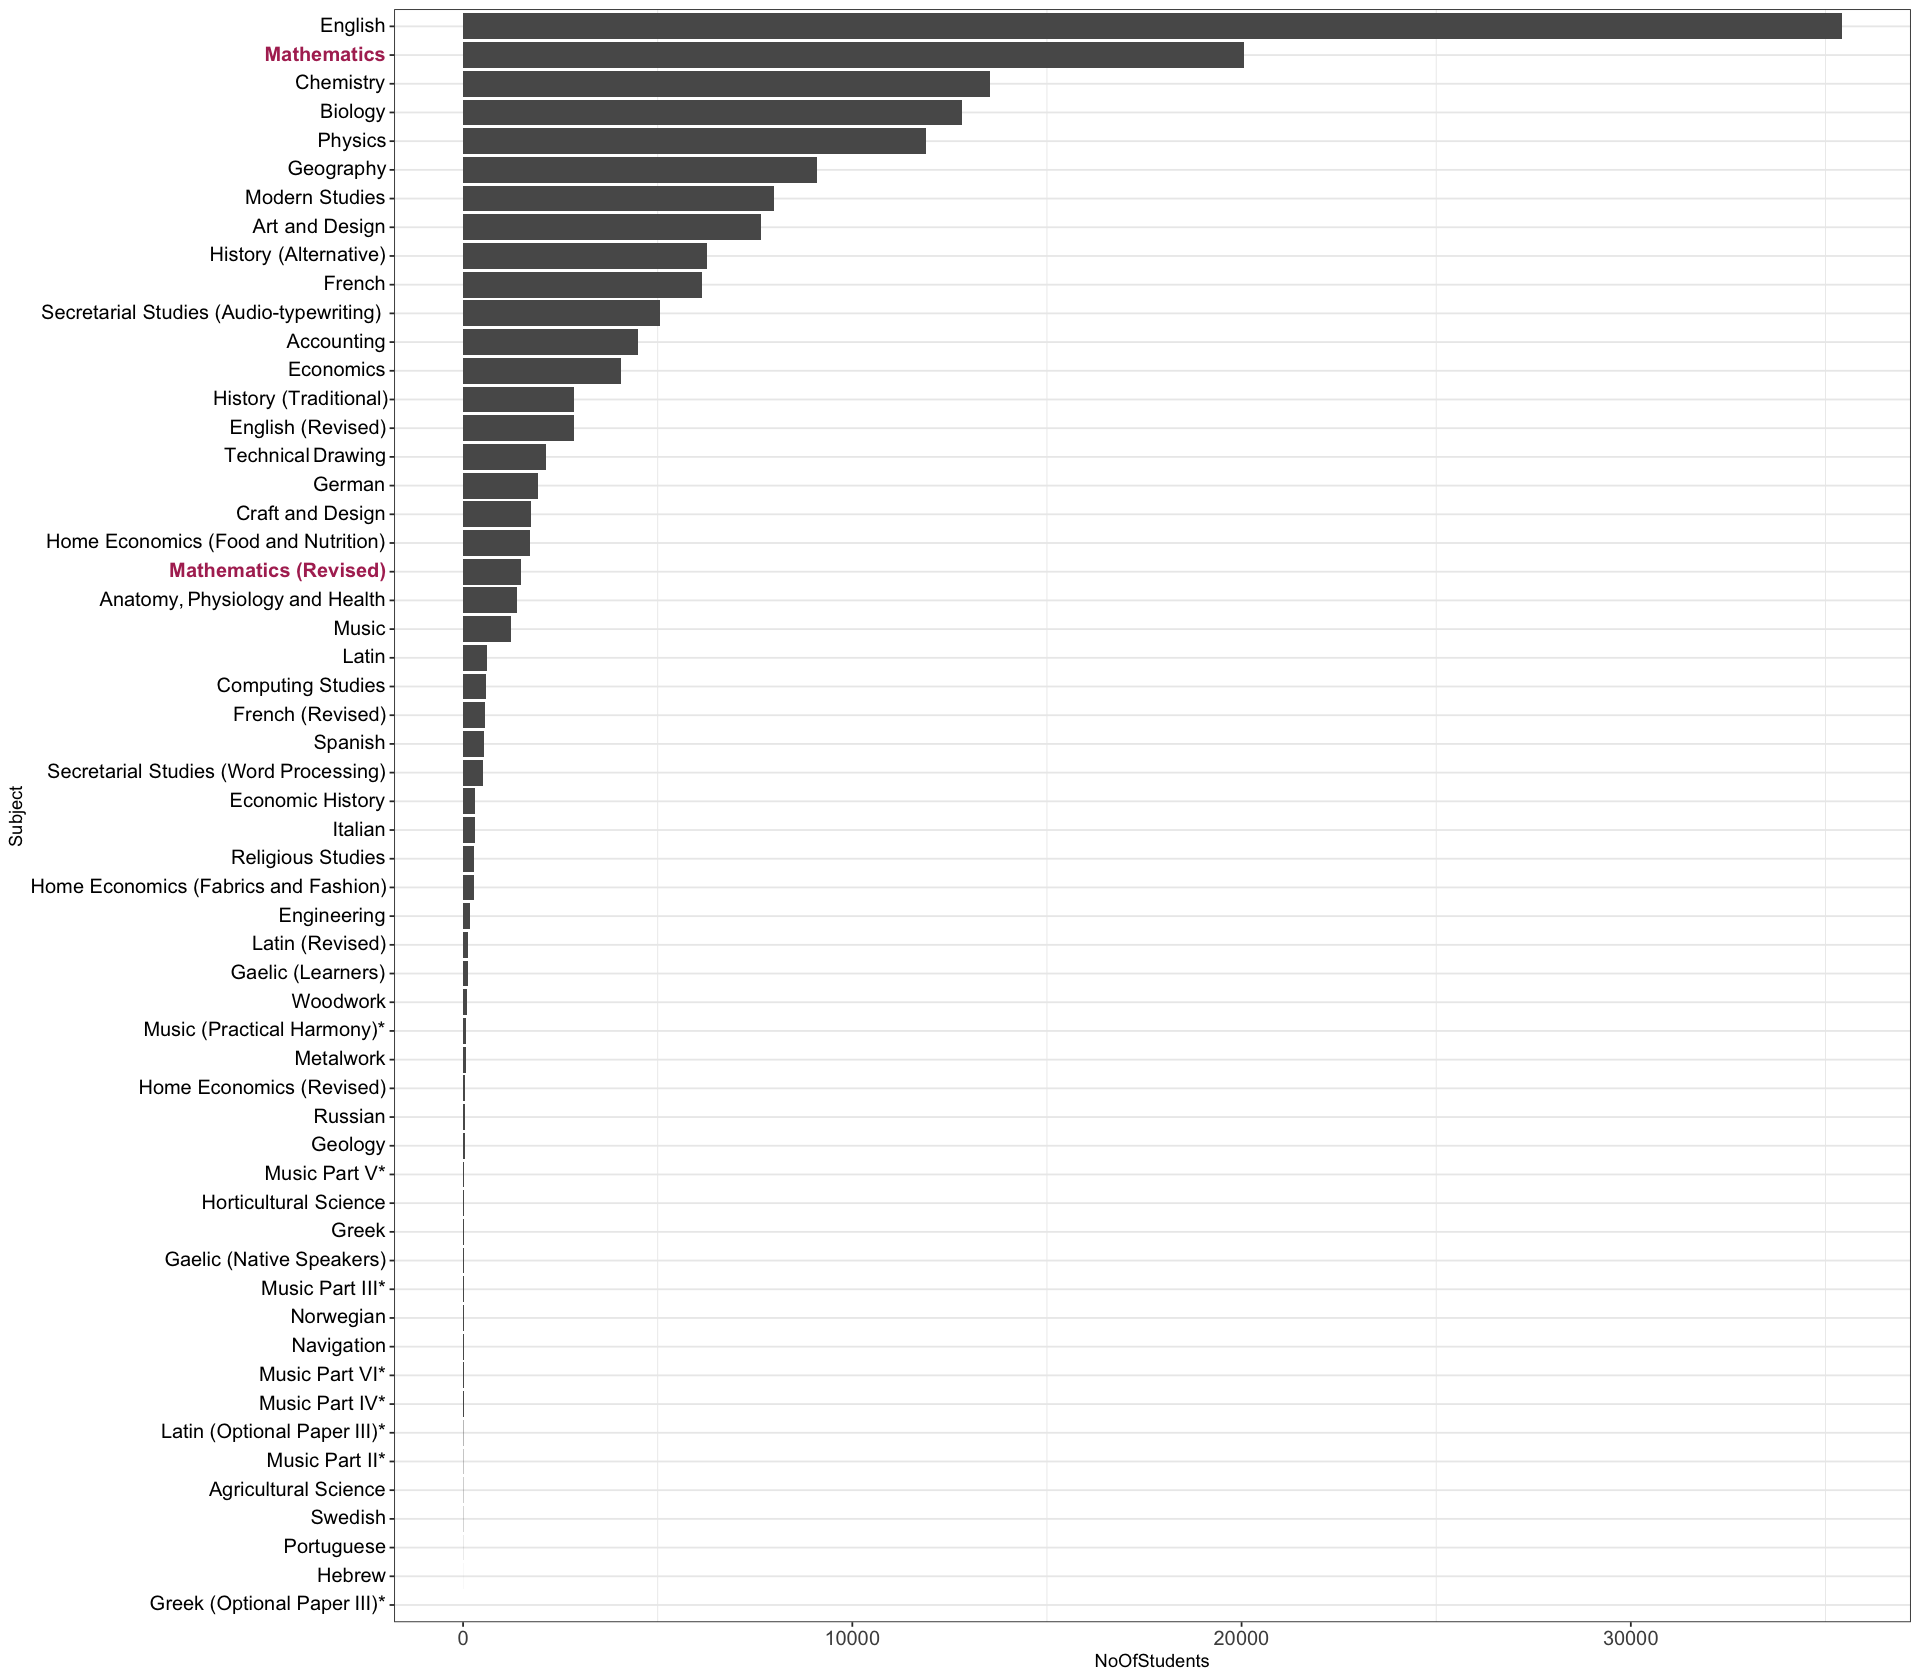

In [17]:

options(repr.plot.width = 16, 
        repr.plot.height = 14)

focus_subject <- "math"

higher_1989 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((gender %in% c("all")) & (grade %in% c("Entries"))) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot...

    mutate(Subject.label = eval(formatted_subject_labels_as_expr),
           Subject.label = fct_reorder(Subject.label, NoOfStudents)) %>%

    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_col() +
        ylab("Subject") +
        dressCodeTheme  +
        theme(axis.text.y = element_markdown())


focus_subject <- "computing" # reset ...


In [18]:
# using percentages to get a better picture of distribution
# this turned out to be a good thing as it highlighted an error in the data (in ordinary or standard grades '86 or 7') 
# error check now included as standard

# percentage of total gender-wise
head(higher_1989, 10) %>%

    mutate_at(vars(starts_with("male") & !ends_with("-Entries")), ~(. / `male-Entries`)) %>%
    mutate_at(vars(starts_with("female") & !ends_with("-Entries")), ~(. / `female-Entries`)) %>%
    mutate_at(vars(starts_with("all") & !ends_with("-Entries")), ~(. / `all-Entries`))
    

# percentage of total entries by grade and gender
head(higher_1989, 10) %>%

    mutate_at(vars(starts_with("male")), ~(. / `all-Entries`)) %>%
    mutate_at(vars(starts_with("female")), ~(. / `all-Entries`)) %>%
    select(-(starts_with("all") & !ends_with("-Entries")))



Subject                        male-Entries male-NoAward male-A    
1  Accounting                     1994         0.12186560   0.09227683
2  Agricultural Science              4         0.00000000   0.50000000
3  Anatomy, Physiology and Health  239         0.23849372   0.07531381
4  Art and Design                 2890         0.06332180   0.08027682
5  Biology                        4275         0.12725146   0.13637427
6  Chemistry                      7523         0.10487837   0.16482786
7  Computing Studies               469         0.20682303   0.12366738
8  Craft and Design               1579         0.15389487   0.09373021
9  Economic History                155         0.09032258   0.08387097
10 Economics                      2239         0.09781152   0.15364002
   male-B    male-C    male-Passes male-D    female-Entries female-NoAward ⋯
1  0.2241725 0.3465396 0.6629890   0.2151454 2509           0.13072937     ⋯
2  0.2500000 0.2500000 1.0000000          NA    3           0.00000000     ⋯
3  0.1548117 0.3054393 0.5355649   0.2259414 1149           0.20887728     ⋯
4  0.2190311 0.4245675 0.7238754   0.2128028 4776           0.03538526     ⋯
5  0.2615205 0.2774269 0.6753216   0.1974269 8552           0.13131431     ⋯
6  0.2456467 0.2889805 0.6994550   0.1956666 6001           0.11114814     ⋯
7  0.1812367 0.3091684 0.6140725   0.1791045  124           0.21774194     ⋯
8  0.2305256 0.3198227 0.6440785   0.2020266  158           0.12658228     ⋯
9  0.4774194 0.2451613 0.8064516   0.1032258  152           0.09868421     ⋯
10 0.2559178 0.3269317 0.7364895   0.1656990 1817           0.11172262     ⋯
   female-Passes female-D   all-Entries all-NoAward all-A      all-B    
1  0.6217617     0.24750897  4503       0.12680435  0.08261159 0.2034199
2  1.0000000             NA     7       0.00000000  0.42857143 0.1428571
3  0.5483029     0.24281984  1388       0.21397695  0.06484150 0.1750720
4  0.8218174     0.14279732  7666       0.04591704  0.10540047 0.2651970
5  0.6370440     0.23164172 12827       0.12996024  0.11195135 0.2394169
6  0.6643893     0.22446259 13524       0.10766046  0.14256137 0.2419403
7  0.5241935     0.25806452   593       0.20910624  0.11467116 0.1804384
8  0.6645570     0.20886076  1737       0.15141048  0.08981002 0.2314335
9  0.8026316     0.09868421   307       0.09446254  0.09771987 0.4397394
10 0.6807925     0.20748487  4056       0.10404339  0.12500000 0.2421105
   all-C     all-Passes all-D     NumberOfCentres
1  0.3539862 0.6400178  0.2331779 432            
2  0.4285714 1.0000000         NA   2            
3  0.3061960 0.5461095  0.2399135 179            
4  0.4142969 0.7848943  0.1691886 512            
5  0.2984330 0.6498012  0.2202386 536            
6  0.2993937 0.6838953  0.2084442 497            
7  0.3001686 0.5952782  0.1956155  70            
8  0.3246978 0.6459413  0.2026482 307            
9  0.2671010 0.8045603  0.1009772  33            
10 0.3444280 0.7115385  0.1844181 316

Subject                        male-Entries male-NoAward male-A    
1  Accounting                     0.4428159    0.05396402   0.04086165
2  Agricultural Science           0.5714286    0.00000000   0.28571429
3  Anatomy, Physiology and Health 0.1721902    0.04106628   0.01296830
4  Art and Design                 0.3769893    0.02387164   0.03026350
5  Biology                        0.3332814    0.04241054   0.04545100
6  Chemistry                      0.5562703    0.05834073   0.09168885
7  Computing Studies              0.7908938    0.16357504   0.09780776
8  Craft and Design               0.9090386    0.13989637   0.08520438
9  Economic History               0.5048860    0.04560261   0.04234528
10 Economics                      0.5520217    0.05399408   0.08481262
   male-B     male-C     male-Passes male-D     female-Entries female-NoAward
1  0.09926716 0.15345325 0.29358206  0.09526982 0.55718410     0.07284033    
2  0.14285714 0.14285714 0.57142857          NA 0.42857143     0.00000000    
3  0.02665706 0.05259366 0.09221902  0.03890490 0.82780980     0.17291066    
4  0.08257240 0.16005740 0.27289330  0.08022437 0.62301070     0.02204540    
5  0.08715990 0.09246121 0.22507211  0.06579871 0.66671864     0.08754970    
6  0.13664596 0.16075126 0.38908607  0.10884354 0.44372967     0.04931973    
7  0.14333895 0.24451939 0.48566610  0.14165261 0.20910624     0.04553120    
8  0.20955671 0.29073115 0.58549223  0.18364997 0.09096143     0.01151410    
9  0.24104235 0.12377850 0.40716612  0.05211726 0.49511401     0.04885993    
10 0.14127219 0.18047337 0.40655819  0.09146943 0.44797830     0.05004931    
   female-A    female-B   female-C   female-Passes female-D   all-Entries
1  0.041749944 0.10415279 0.20053298 0.34643571    0.13790806  4503      
2  0.142857143         NA 0.28571429 0.42857143            NA     7      
3  0.051873199 0.14841499 0.25360231 0.45389049    0.20100865  1388      
4  0.075136968 0.18262458 0.25423950 0.51200104    0.08896426  7666      
5  0.066500351 0.15225696 0.20597178 0.42472909    0.15443985 12827      
6  0.050872523 0.10529429 0.13864241 0.29480923    0.09960071 13524      
7  0.016863406 0.03709949 0.05564924 0.10961214    0.05396290   593      
8  0.004605642 0.02187680 0.03396661 0.06044905    0.01899827  1737      
9  0.055374593 0.19869707 0.14332248 0.39739414    0.04885993   307      
10 0.040187377 0.10083826 0.16395464 0.30498028    0.09294872  4056      
   NumberOfCentres
1  432            
2    2            
3  179            
4  512            
5  536            
6  497            
7   70            
8  307            
9   33            
10 316

Warning message:
“Removed 5 rows containing missing values (position_stack).”
Warning message:
“Removed 5 rows containing missing values (position_stack).”


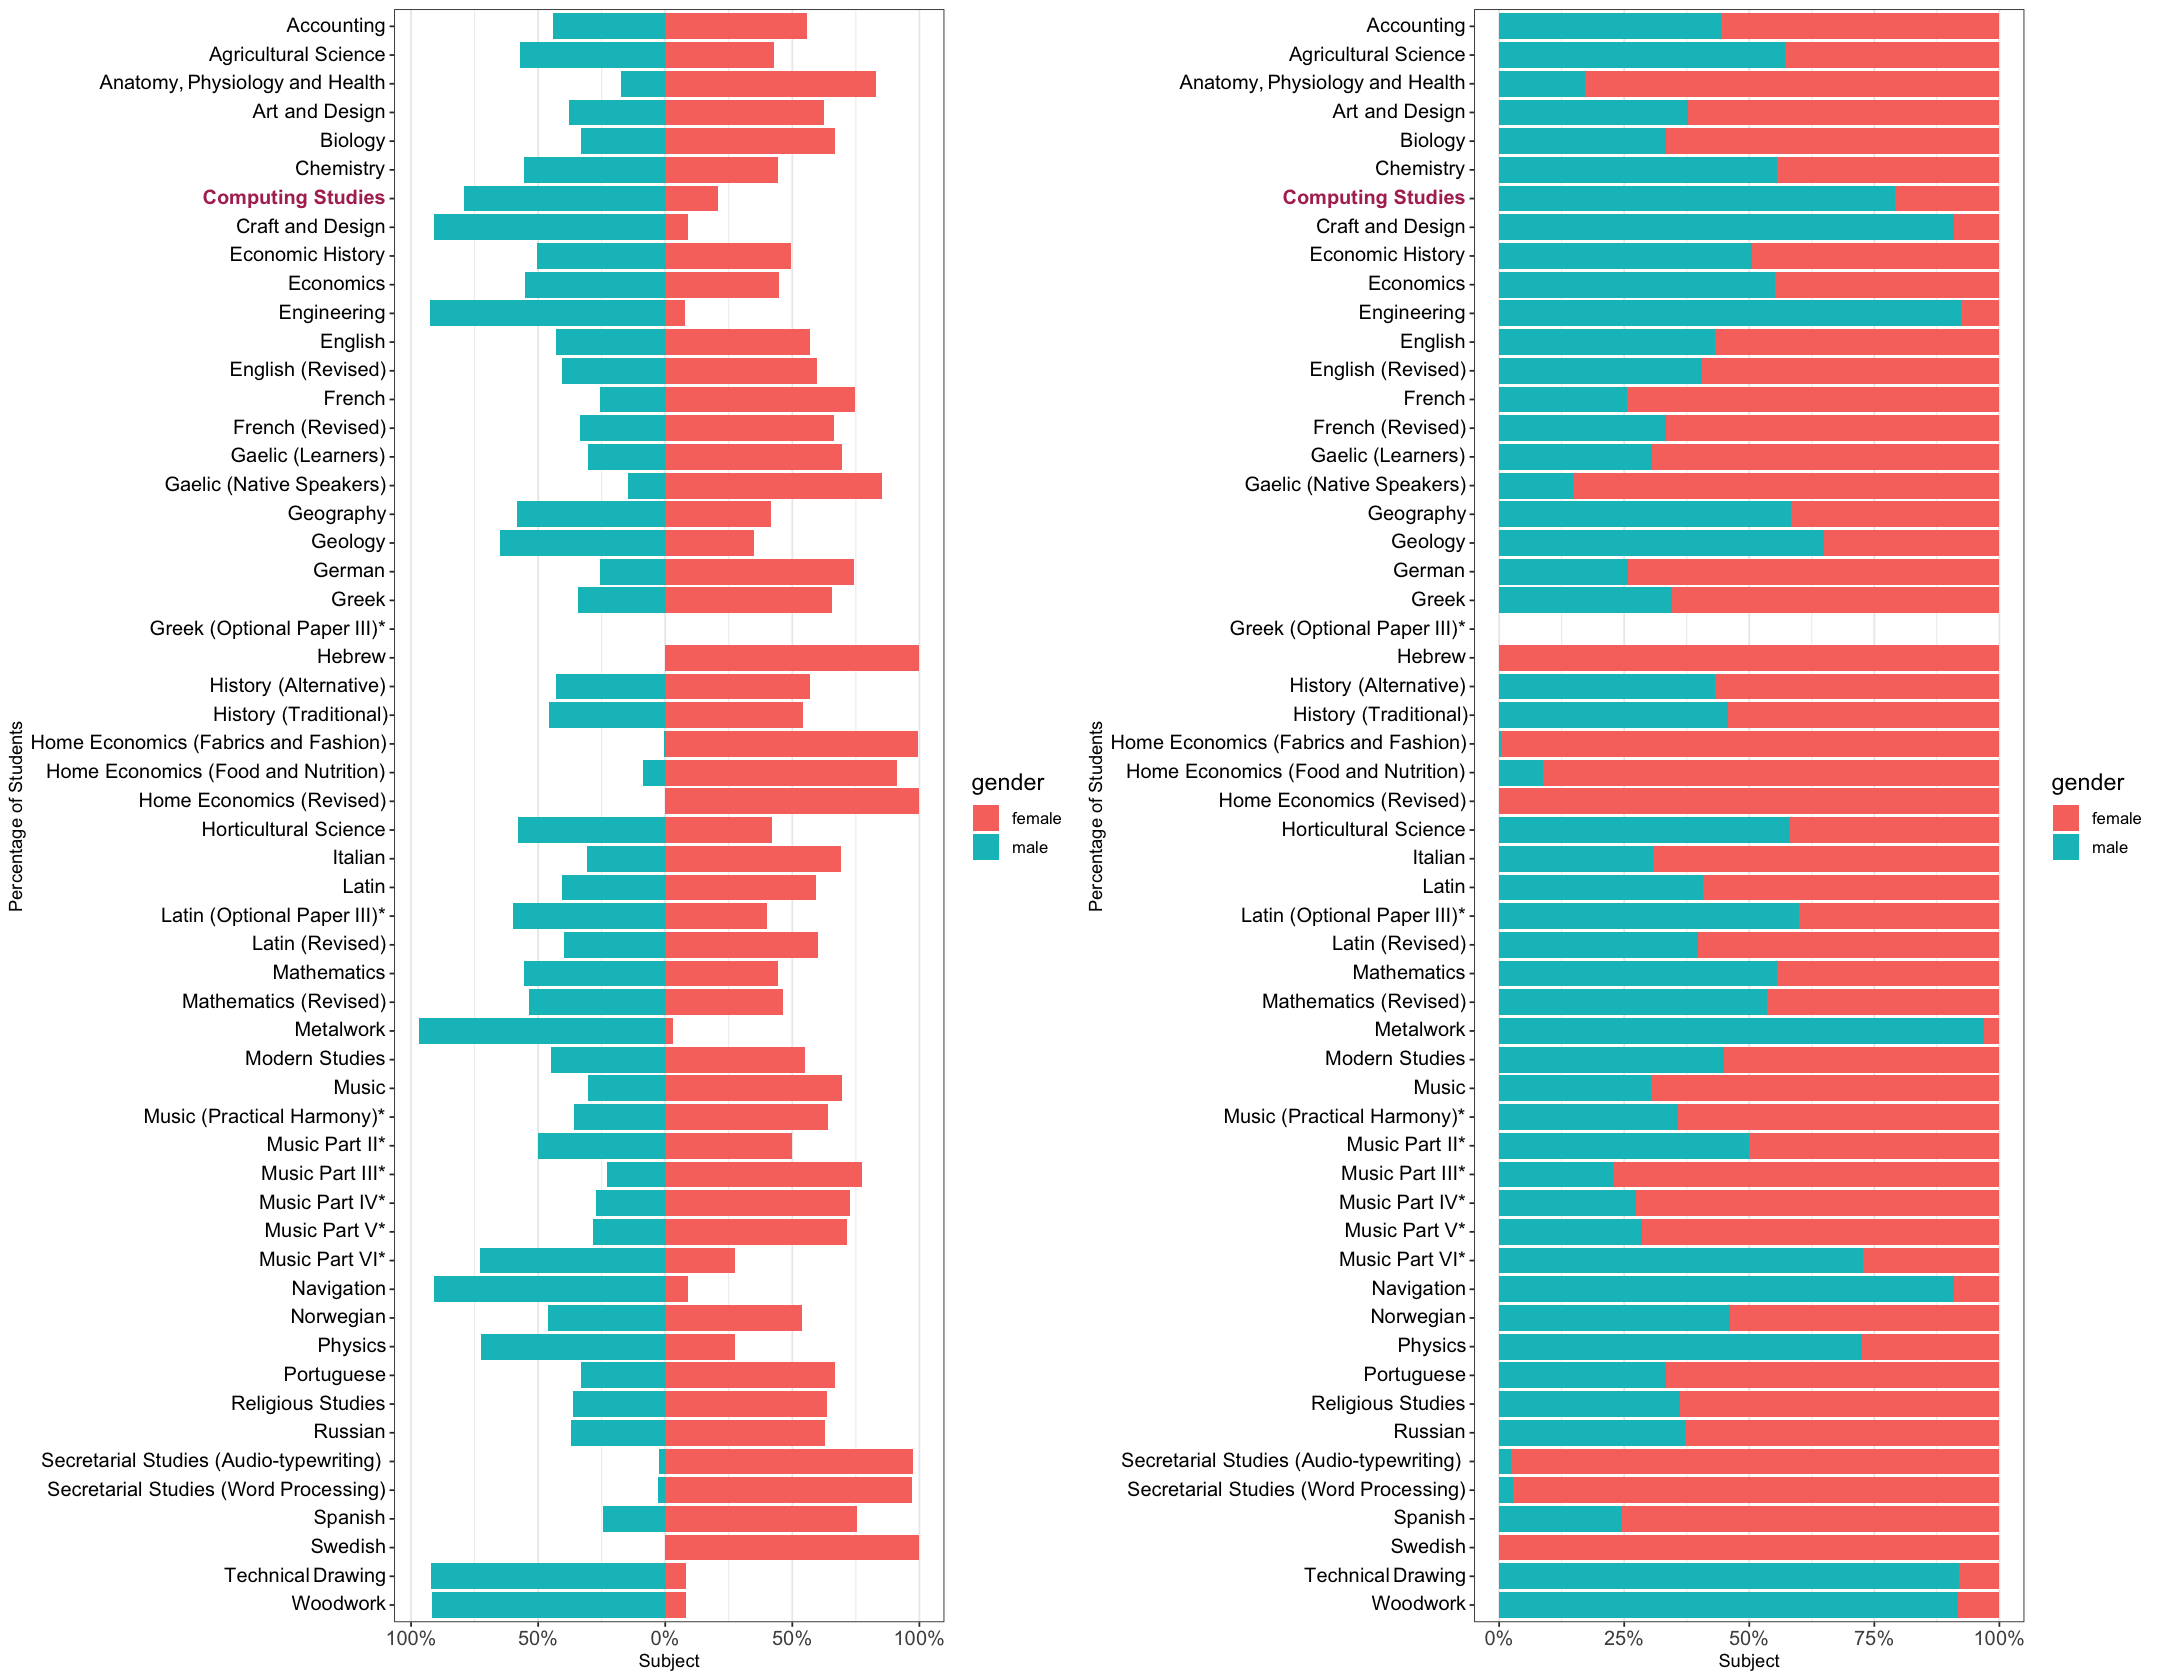

In [19]:
# upside-down, really, but having to flip gender order for consistency with next

tmp_df <- higher_1989 %>%

    mutate_at(vars(starts_with("male")), ~(. / `all-Entries`)) %>%
    mutate_at(vars(starts_with("female")), ~(. / `all-Entries`)) %>%
    select(-(starts_with("all") & !ends_with("-Entries"))) %>%

    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "PercentageOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter(!(gender %in% c("all")) & (grade %in% c("Entries"))) %>%

    mutate(Subject.label = eval(formatted_subject_labels_as_expr),
           Subject.label = reorder(Subject.label, desc(Subject)))



plot1 <- tmp_df %>%   

    ggplot(aes(y = Subject.label, x = if_else(gender == "male", -PercentageOfStudents, PercentageOfStudents), fill = gender)) +
        geom_col() +
        ylab("Percentage of Students") + xlab("Subject") +
        scale_x_continuous(labels = function(x) scales::percent(abs(x))) + #scale_y_continuous(labels = function(n) scales::comma(abs(n))) +
        dressCodeTheme +
        theme(panel.grid.major.y = element_blank(),
              panel.grid.major.x = element_line())
        

                           
plot2 <- tmp_df %>%
    # mutate(gender = fct_rev(gender)) %>% - but need to manually set fill to get this to work properly

    ggplot(aes(y = Subject.label, x = PercentageOfStudents, fill = gender)) +
        geom_col() +
        ylab("Percentage of Students") + xlab("Subject") +
        scale_x_continuous(labels = function(x) scales::percent(abs(x))) + #scale_y_continuous(labels = function(n) scales::comma(abs(n))) +
        scale_fill_discrete(limits = rev(levels("gender"))) + 
        dressCodeTheme +
        theme(panel.grid.major.y = element_blank(),
              panel.grid.major.x = element_line())
                                   
                           
options(repr.plot.width = 18, repr.plot.height = 14)
gridExtra::grid.arrange(plot1, plot2, nrow = 1)    

rm(tmp_df)

<br />&nbsp;<br />

# 1990

In [20]:
higher_1990 <- read_csv("sta_it_402/data/grades/1990_Higher.csv", trim_ws = T) %>% 
                            filter(rowSums(is.na(.)) != ncol(.))

glimpse(higher_1990)
head(higher_1990)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




Rows: 58
Columns: 20
$ Subject          <chr> "Accounting", "Agricultural Science", "Anatomy, Phys…
$ `male-Entries`   <chr> "2,025", "6", "201", "30", "2,861", "4,004", "6,782"…
$ `male-A`         <chr> "190", "2", "14", "2", "199", "531", "1,106", "131",…
$ `male-B`         <chr> "486", "3", "39", "7", "643", "977", "1,624", "207",…
$ `male-C`         <chr> "616", "-", "58", "14", "1,312", "1,178", "2,039", "…
$ `male-Passes`    <chr> "1,292", "5", "111", "23", "2,154", "2,686", "4,769"…
$ `male-D`         <chr> "372", "-", "43", "5", "536", "915", "1,374", "225",…
$ `female-Entries` <chr> "2,268", "2", "966", "48", "4,444", "8,238", "5,346"…
$ `female-A`       <chr> "196", "-", "65", "12", "541", "794", "591", "15", "…
$ `female-B`       <chr> "560", "1", "190", "16", "1,235", "1,800", "1,209", …
$ `female-C`       <chr> "725", "1", "278", "12", "1,905", "2,606", "1,778", …
$ `female-Passes`  <chr> "1,481", "2", "533", "40", "3,681", "5,200", "3,578"…
$ `female-D`       <chr> "464",

Subject                        male-Entries male-A male-B male-C male-Passes
1 Accounting                     2,025        190    486    616    1,292      
2 Agricultural Science           6            2      3      -      5          
3 Anatomy, Physiology and Health 201          14     39     58     111        
4 Art and Design (Revised)       30           2      7      14     23         
5 Art and Design                 2,861        199    643    1,312  2,154      
6 Biology                        4,004        531    977    1,178  2,686      
  male-D female-Entries female-A female-B female-C female-Passes female-D
1 372    2,268          196      560      725      1,481         464     
2 -      2              -        1        1        2             -       
3 43     966            65       190      278      533           237     
4 5      48             12       16       12       40            6       
5 536    4,444          541      1,235    1,905    3,681         589     
6 915    8,238          794      1,800    2,606    5,200         1,986   
  all-Entries all-A all-B all-C all-Passes all-D NumberOfCentres
1 4,293       386   1,046 1,341 2,773      836   426            
2 8           2     4     1     7          -     6              
3 1,167       79    229   336   644        280   175            
4 78          14    23    26    63         11    10             
5 7,305       740   1,878 3,217 5,835      1,125 491            
6 12,242      1,325 2,777 3,784 7,886      2,901 537

In [21]:
higher_1990 <- higher_1990 %>%
    mutate_at(c("Subject"), as.factor) %>%
    mutate_at(c("NumberOfCentres"), as.integer) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), as.character) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), parse_number) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), as.integer) 

glimpse(higher_1990)     
head(higher_1990)

Warning message:
“Problem with `mutate()` input `NumberOfCentres`.
ℹ NAs introduced by coercion
ℹ Input `NumberOfCentres` is `.Primitive("as.integer")(NumberOfCentres)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `male-Entries`.
ℹ 1 parsing failure.
row col expected actual
 23  -- a number      -

ℹ Input `male-Entries` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“1 parsing failure.
row col expected actual
 23  -- a number      -
”
Warning message:
“Problem with `mutate()` input `male-A`.
ℹ 12 parsing failures.
row col expected actual
 23  -- a number      -
 28  -- a number      -
 29  -- a number      -
 33  -- a number      -
 38  -- a number      -
... ... ........ ......
See problems(...) for more details.

ℹ Input `male-A` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“12 parsing 

Warning message:
“Problem with `mutate()` input `all-B`.
ℹ 9 parsing failures.
row col expected actual
 23  -- a number      -
 25  -- a number      -
 33  -- a number      -
 40  -- a number      -
 41  -- a number      -
... ... ........ ......
See problems(...) for more details.

ℹ Input `all-B` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“9 parsing failures.
row col expected actual
 23  -- a number      -
 25  -- a number      -
 33  -- a number      -
 40  -- a number      -
 41  -- a number      -
... ... ........ ......
See problems(...) for more details.
”
Warning message:
“Problem with `mutate()` input `all-C`.
ℹ 11 parsing failures.
row col expected actual
 23  -- a number      -
 25  -- a number      -
 33  -- a number      -
 40  -- a number      -
 41  -- a number      -
... ... ........ ......
See problems(...) for more details.

ℹ Input `all-C` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_w

Rows: 58
Columns: 20
$ Subject          <fct> "Accounting", "Agricultural Science", "Anatomy, Phys…
$ `male-Entries`   <int> 2025, 6, 201, 30, 2861, 4004, 6782, 1089, 148, 1286,…
$ `male-A`         <int> 190, 2, 14, 2, 199, 531, 1106, 131, 14, 112, 19, 314…
$ `male-B`         <int> 486, 3, 39, 7, 643, 977, 1624, 207, 30, 270, 52, 582…
$ `male-C`         <int> 616, NA, 58, 14, 1312, 1178, 2039, 299, 42, 413, 34,…
$ `male-Passes`    <int> 1292, 5, 111, 23, 2154, 2686, 4769, 637, 86, 795, 10…
$ `male-D`         <int> 372, NA, 43, 5, 536, 915, 1374, 225, 41, 274, 9, 402…
$ `female-Entries` <int> 2268, 2, 966, 48, 4444, 8238, 5346, 313, 19, 155, 12…
$ `female-A`       <int> 196, NA, 65, 12, 541, 794, 591, 15, 1, 13, 8, 131, 2…
$ `female-B`       <int> 560, 1, 190, 16, 1235, 1800, 1209, 51, 3, 42, 44, 35…
$ `female-C`       <int> 725, 1, 278, 12, 1905, 2606, 1778, 89, 6, 49, 48, 57…
$ `female-Passes`  <int> 1481, 2, 533, 40, 3681, 5200, 3578, 155, 10, 104, 10…
$ `female-D`       <int> 464, N

Subject                        male-Entries male-A male-B male-C male-Passes
1 Accounting                     2025         190    486     616   1292       
2 Agricultural Science              6           2      3      NA      5       
3 Anatomy, Physiology and Health  201          14     39      58    111       
4 Art and Design (Revised)         30           2      7      14     23       
5 Art and Design                 2861         199    643    1312   2154       
6 Biology                        4004         531    977    1178   2686       
  male-D female-Entries female-A female-B female-C female-Passes female-D
1 372    2268           196       560      725     1481           464    
2  NA       2            NA         1        1        2            NA    
3  43     966            65       190      278      533           237    
4   5      48            12        16       12       40             6    
5 536    4444           541      1235     1905     3681           589    
6 915    8238           794      1800     2606     5200          1986    
  all-Entries all-A all-B all-C all-Passes all-D NumberOfCentres
1  4293        386  1046  1341  2773        836  426            
2     8          2     4     1     7         NA    6            
3  1167         79   229   336   644        280  175            
4    78         14    23    26    63         11   10            
5  7305        740  1878  3217  5835       1125  491            
6 12242       1325  2777  3784  7886       2901  537

In [22]:
# need to generalise - filter out all redundant columns first

tmp_df <- higher_1990 %>%
    select(-matches(redundant_column_flags)) 
tmp_df[is.na(tmp_df)] <- 0

higher_1990 <- bind_cols(higher_1990,
        
    tmp_df %>%
        mutate("male-NoAward" = (`male-Entries` - reduce(select(., (starts_with("male") & !ends_with("-Entries"))), `+`)), # rowSums(select(., starts_with("male-")))
               "female-NoAward" = (`female-Entries` - reduce(select(., (starts_with("female") & !ends_with("-Entries"))), `+`)), 
               "all-NoAward" = (`all-Entries` - reduce(select(., (starts_with("all") & !ends_with("-Entries"))), `+`))) %>%
        select(c("male-NoAward", "female-NoAward", "all-NoAward"))
    ) %>%

    relocate(`male-NoAward`, .after = `male-Entries`) %>%
    relocate(`female-NoAward`, .after = `female-Entries`) %>%
    relocate(`all-NoAward`, .after = `all-Entries`) 

tail(higher_1990)
rm(tmp_df)


Subject                                 male-Entries male-NoAward male-A
1 Secretarial Studies (Audio-typewriting)  110          19            7   
2 Secretarial Studies (Word Processing)     46           9            2   
3 Spanish                                  148          14           34   
4 Swedish                                    4           0            2   
5 Technical Drawing                       1649         248          134   
6 Woodwork                                  30           4            3   
  male-B male-C male-Passes male-D female-Entries female-NoAward ⋯
1  17     42     66          25    3425           434            ⋯
2  10     16     28           9    1268           126            ⋯
3  42     42    118          16     437            37            ⋯
4   2     NA      4          NA       7             0            ⋯
5 331    526    991         410     168            34            ⋯
6   6     12     21           5       1             0            ⋯
  female-Passes female-D all-Entries all-NoAward all-A all-B all-C all-Passes
1 2308          683      3535        453         329   842   1203  2374      
2  881          261      1314        135         126   368    415   909      
3  340           60       585         51         122   162    174   458      
4    7           NA        11          0           8     3     NA    11      
5   86           48      1817        282         147   355    575  1077      
6    1           NA        31          4           3     6     13    22      
  all-D NumberOfCentres
1 708   314            
2 270   117            
3  76   139            
4  NA     9            
5 458   361            
6   5    16

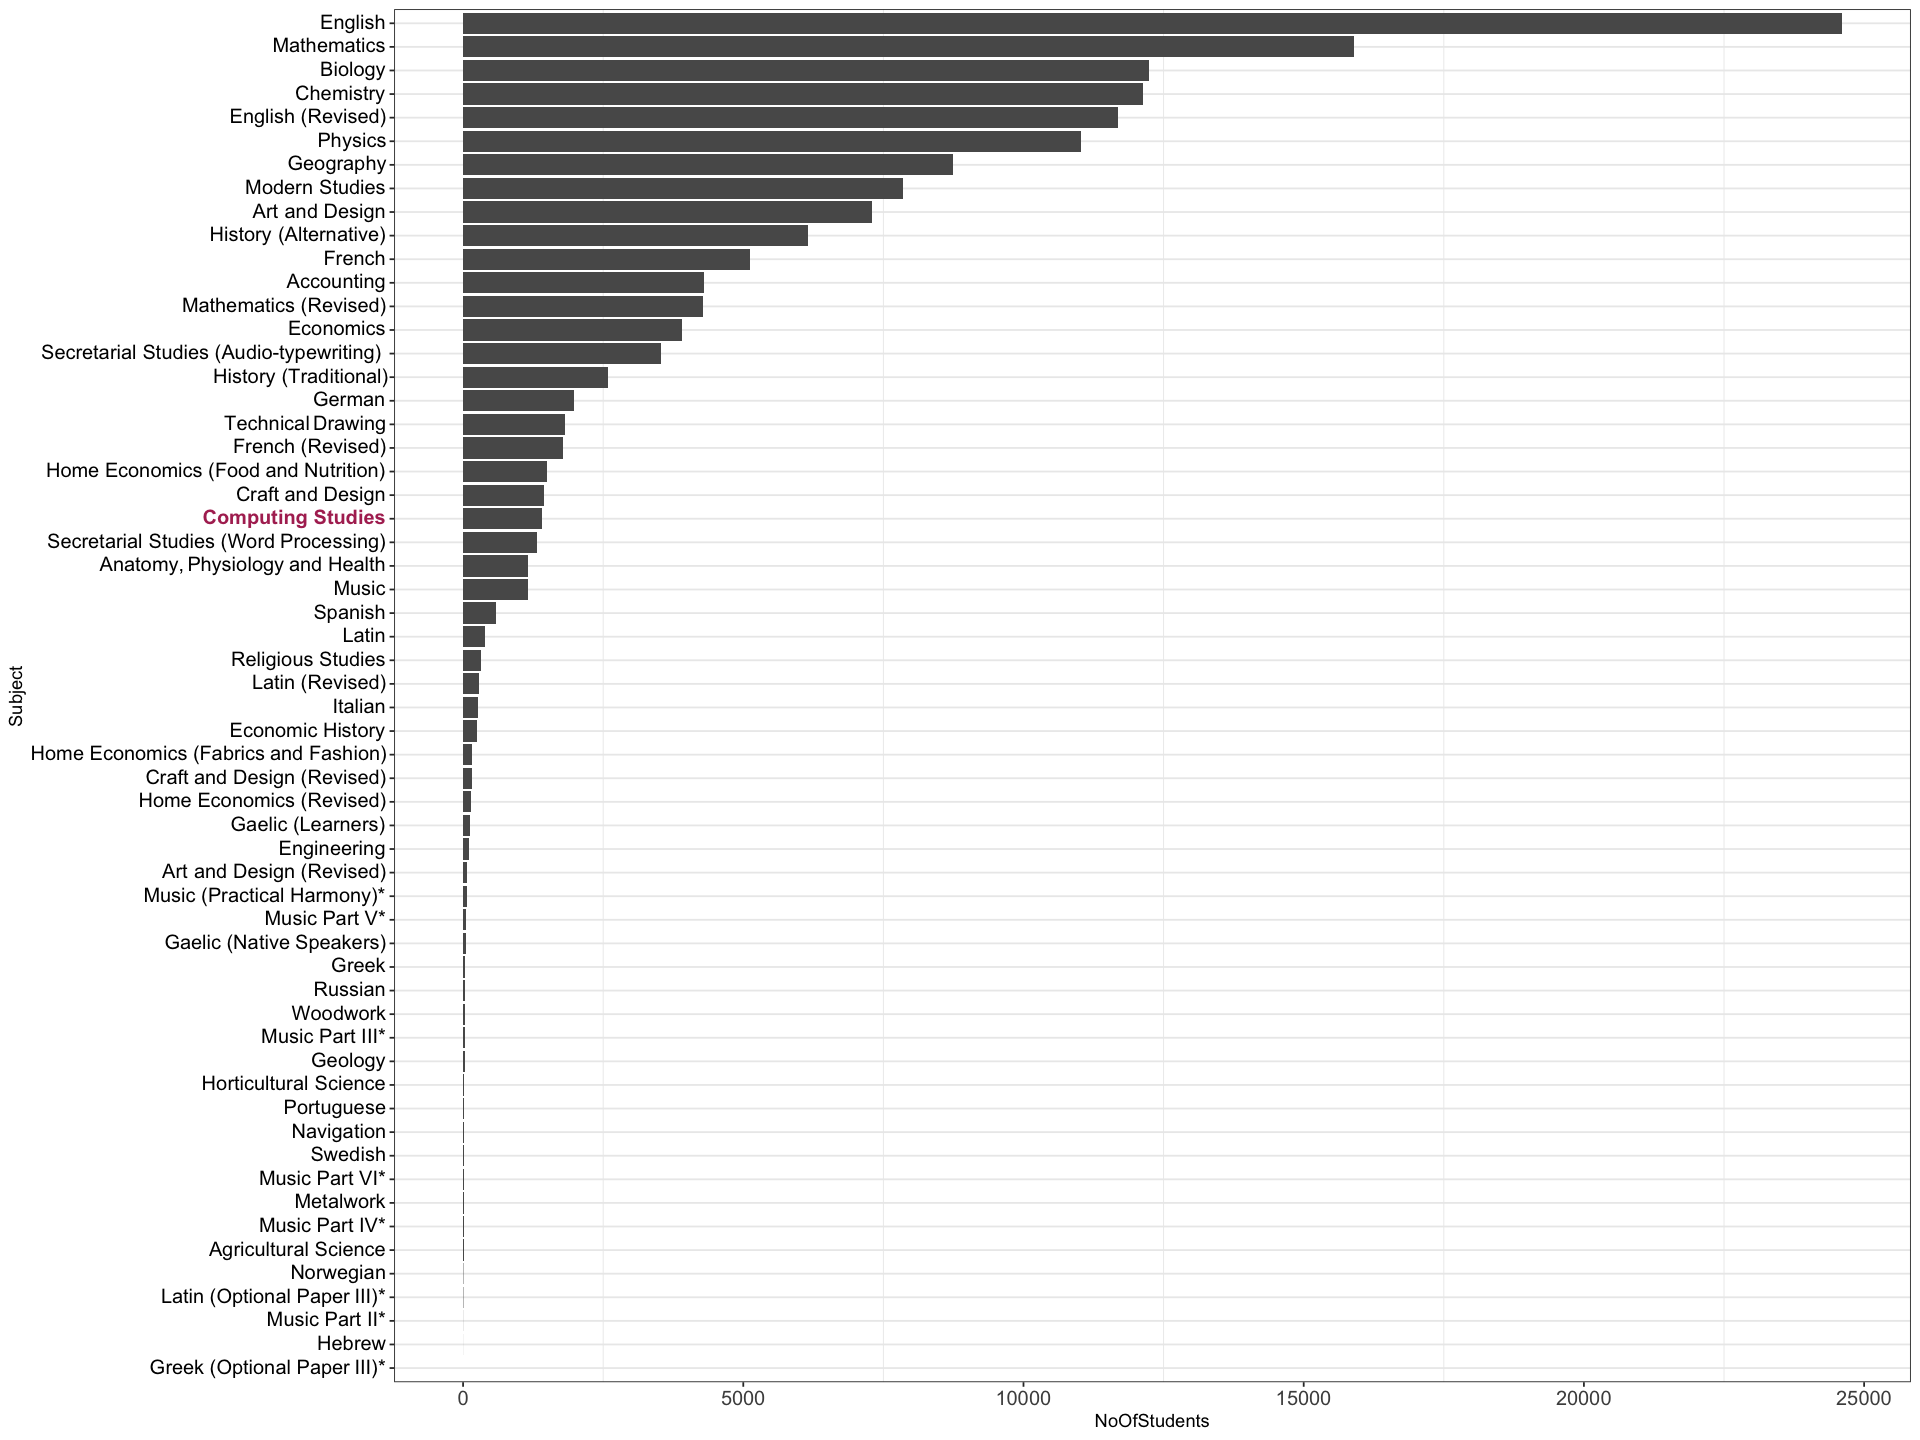

In [23]:
options(repr.plot.width = 16, 
        repr.plot.height = 12)


higher_1990 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((gender %in% c("all")) & (grade %in% c("Entries"))) %>%
    arrange(gender, desc(NoOfStudents)) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot... and na.rm in fct_reorder is iffy ..

    mutate(Subject.label = eval(formatted_subject_labels_as_expr),
           Subject.label = fct_reorder(Subject.label, NoOfStudents)) %>%


    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_col() +
        ylab("Subject") +
        dressCodeTheme 


In [24]:
head(higher_1989) %>%
    mutate(year = 1989) %>%

full_join(head(higher_1990) %>%
    mutate(year = 1990)) %>%

    select(year, everything()) %>%
    pivot_longer(!c(year, Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade", "year"), as.factor) %>%
    filter((grade %in% c("Entries"))) %>%
    arrange(Subject, year)

Joining, by = c("Subject", "male-Entries", "male-NoAward", "male-A", "male-B", "male-C", "male-Passes", "male-D", "female-Entries", "female-NoAward", "female-A", "female-B", "female-C", "female-Passes", "female-D", "all-Entries", "all-NoAward", "all-A", "all-B", "all-C", "all-Passes", "all-D", "NumberOfCentres", "year")



year Subject                        NumberOfCentres gender grade  
1  1989 Accounting                     432             male   Entries
2  1989 Accounting                     432             female Entries
3  1989 Accounting                     432             all    Entries
4  1990 Accounting                     426             male   Entries
5  1990 Accounting                     426             female Entries
6  1990 Accounting                     426             all    Entries
7  1989 Agricultural Science             2             male   Entries
8  1989 Agricultural Science             2             female Entries
9  1989 Agricultural Science             2             all    Entries
10 1990 Agricultural Science             6             male   Entries
11 1990 Agricultural Science             6             female Entries
12 1990 Agricultural Science             6             all    Entries
13 1989 Anatomy, Physiology and Health 179             male   Entries
14 1989 Anatomy, Physiology and Health 179             female Entries
15 1989 Anatomy, Physiology and Health 179             all    Entries
16 1990 Anatomy, Physiology and Health 175             male   Entries
17 1990 Anatomy, Physiology and Health 175             female Entries
18 1990 Anatomy, Physiology and Health 175             all    Entries
19 1989 Art and Design                 512             male   Entries
20 1989 Art and Design                 512             female Entries
21 1989 Art and Design                 512             all    Entries
22 1990 Art and Design                 491             male   Entries
23 1990 Art and Design                 491             female Entries
24 1990 Art and Design                 491             all    Entries
25 1989 Biology                        536             male   Entries
26 1989 Biology                        536             female Entries
27 1989 Biology                        536             all    Entries
28 1990 Biology                        537             male   Entries
29 1990 Biology                        537             female Entries
30 1990 Biology                        537             all    Entries
31 1989 Chemistry                      497             male   Entries
32 1989 Chemistry                      497             female Entries
33 1989 Chemistry                      497             all    Entries
34 1990 Art and Design (Revised)        10             male   Entries
35 1990 Art and Design (Revised)        10             female Entries
36 1990 Art and Design (Revised)        10             all    Entries
   NoOfStudents
1   1994       
2   2509       
3   4503       
4   2025       
5   2268       
6   4293       
7      4       
8      3       
9      7       
10     6       
11     2       
12     8       
13   239       
14  1149       
15  1388       
16   201       
17   966       
18  1167       
19  2890       
20  4776       
21  7666       
22  2861       
23  4444       
24  7305       
25  4275       
26  8552       
27 12827       
28  4004       
29  8238       
30 12242       
31  7523       
32  6001       
33 13524       
34    30       
35    48       
36    78

In [25]:
head(higher_1989) %>%
    mutate(year = 1989,
           award = "Higher") %>%

full_join(head(higher_1990) %>%
    mutate(year = 1990,
           award = "Higher")
    ) %>%

    select(award, year, everything()) %>%
    pivot_longer(!c(award, year, Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade", "year"), as.factor) %>%
    #filter((grade %in% c("Entries"))) %>%
    arrange(Subject, year)

Joining, by = c("Subject", "male-Entries", "male-NoAward", "male-A", "male-B", "male-C", "male-Passes", "male-D", "female-Entries", "female-NoAward", "female-A", "female-B", "female-C", "female-Passes", "female-D", "all-Entries", "all-NoAward", "all-A", "all-B", "all-C", "all-Passes", "all-D", "NumberOfCentres", "year", "award")



award  year Subject                  NumberOfCentres gender grade  
1   Higher 1989 Accounting               432             male   Entries
2   Higher 1989 Accounting               432             male   NoAward
3   Higher 1989 Accounting               432             male   A      
4   Higher 1989 Accounting               432             male   B      
5   Higher 1989 Accounting               432             male   C      
6   Higher 1989 Accounting               432             male   Passes 
7   Higher 1989 Accounting               432             male   D      
8   Higher 1989 Accounting               432             female Entries
9   Higher 1989 Accounting               432             female NoAward
10  Higher 1989 Accounting               432             female A      
11  Higher 1989 Accounting               432             female B      
12  Higher 1989 Accounting               432             female C      
13  Higher 1989 Accounting               432             female Passes 
14  Higher 1989 Accounting               432             female D      
15  Higher 1989 Accounting               432             all    Entries
16  Higher 1989 Accounting               432             all    NoAward
17  Higher 1989 Accounting               432             all    A      
18  Higher 1989 Accounting               432             all    B      
19  Higher 1989 Accounting               432             all    C      
20  Higher 1989 Accounting               432             all    Passes 
21  Higher 1989 Accounting               432             all    D      
22  Higher 1990 Accounting               426             male   Entries
23  Higher 1990 Accounting               426             male   NoAward
24  Higher 1990 Accounting               426             male   A      
25  Higher 1990 Accounting               426             male   B      
26  Higher 1990 Accounting               426             male   C      
27  Higher 1990 Accounting               426             male   Passes 
28  Higher 1990 Accounting               426             male   D      
29  Higher 1990 Accounting               426             female Entries
30  Higher 1990 Accounting               426             female NoAward
⋮   ⋮      ⋮    ⋮                        ⋮               ⋮      ⋮      
223 Higher 1989 Chemistry                497             female Passes 
224 Higher 1989 Chemistry                497             female D      
225 Higher 1989 Chemistry                497             all    Entries
226 Higher 1989 Chemistry                497             all    NoAward
227 Higher 1989 Chemistry                497             all    A      
228 Higher 1989 Chemistry                497             all    B      
229 Higher 1989 Chemistry                497             all    C      
230 Higher 1989 Chemistry                497             all    Passes 
231 Higher 1989 Chemistry                497             all    D      
232 Higher 1990 Art and Design (Revised)  10             male   Entries
233 Higher 1990 Art and Design (Revised)  10             male   NoAward
234 Higher 1990 Art and Design (Revised)  10             male   A      
235 Higher 1990 Art and Design (Revised)  10             male   B      
236 Higher 1990 Art and Design (Revised)  10             male   C      
237 Higher 1990 Art and Design (Revised)  10             male   Passes 
238 Higher 1990 Art and Design (Revised)  10             male   D      
239 Higher 1990 Art and Design (Revised)  10             female Entries
240 Higher 1990 Art and Design (Revised)  10             female NoAward
241 Higher 1990 Art and Design (Revised)  10             female A      
242 Higher 1990 Art and Design (Revised)  10             female B      
243 Higher 1990 Art and Design (Revised)  10             female C      
244 Higher 1990 Art and Design (Revised)  10             female Passes 
245 Higher 1990 Art and Design (Revised)  10             female D      
246 Higher 1990 Art and Design (Revised)  10

Joining, by = c("Subject", "male-Entries", "male-NoAward", "male-A", "male-B", "male-C", "male-Passes", "male-D", "female-Entries", "female-NoAward", "female-A", "female-B", "female-C", "female-Passes", "female-D", "all-Entries", "all-NoAward", "all-A", "all-B", "all-C", "all-Passes", "all-D", "NumberOfCentres", "year")



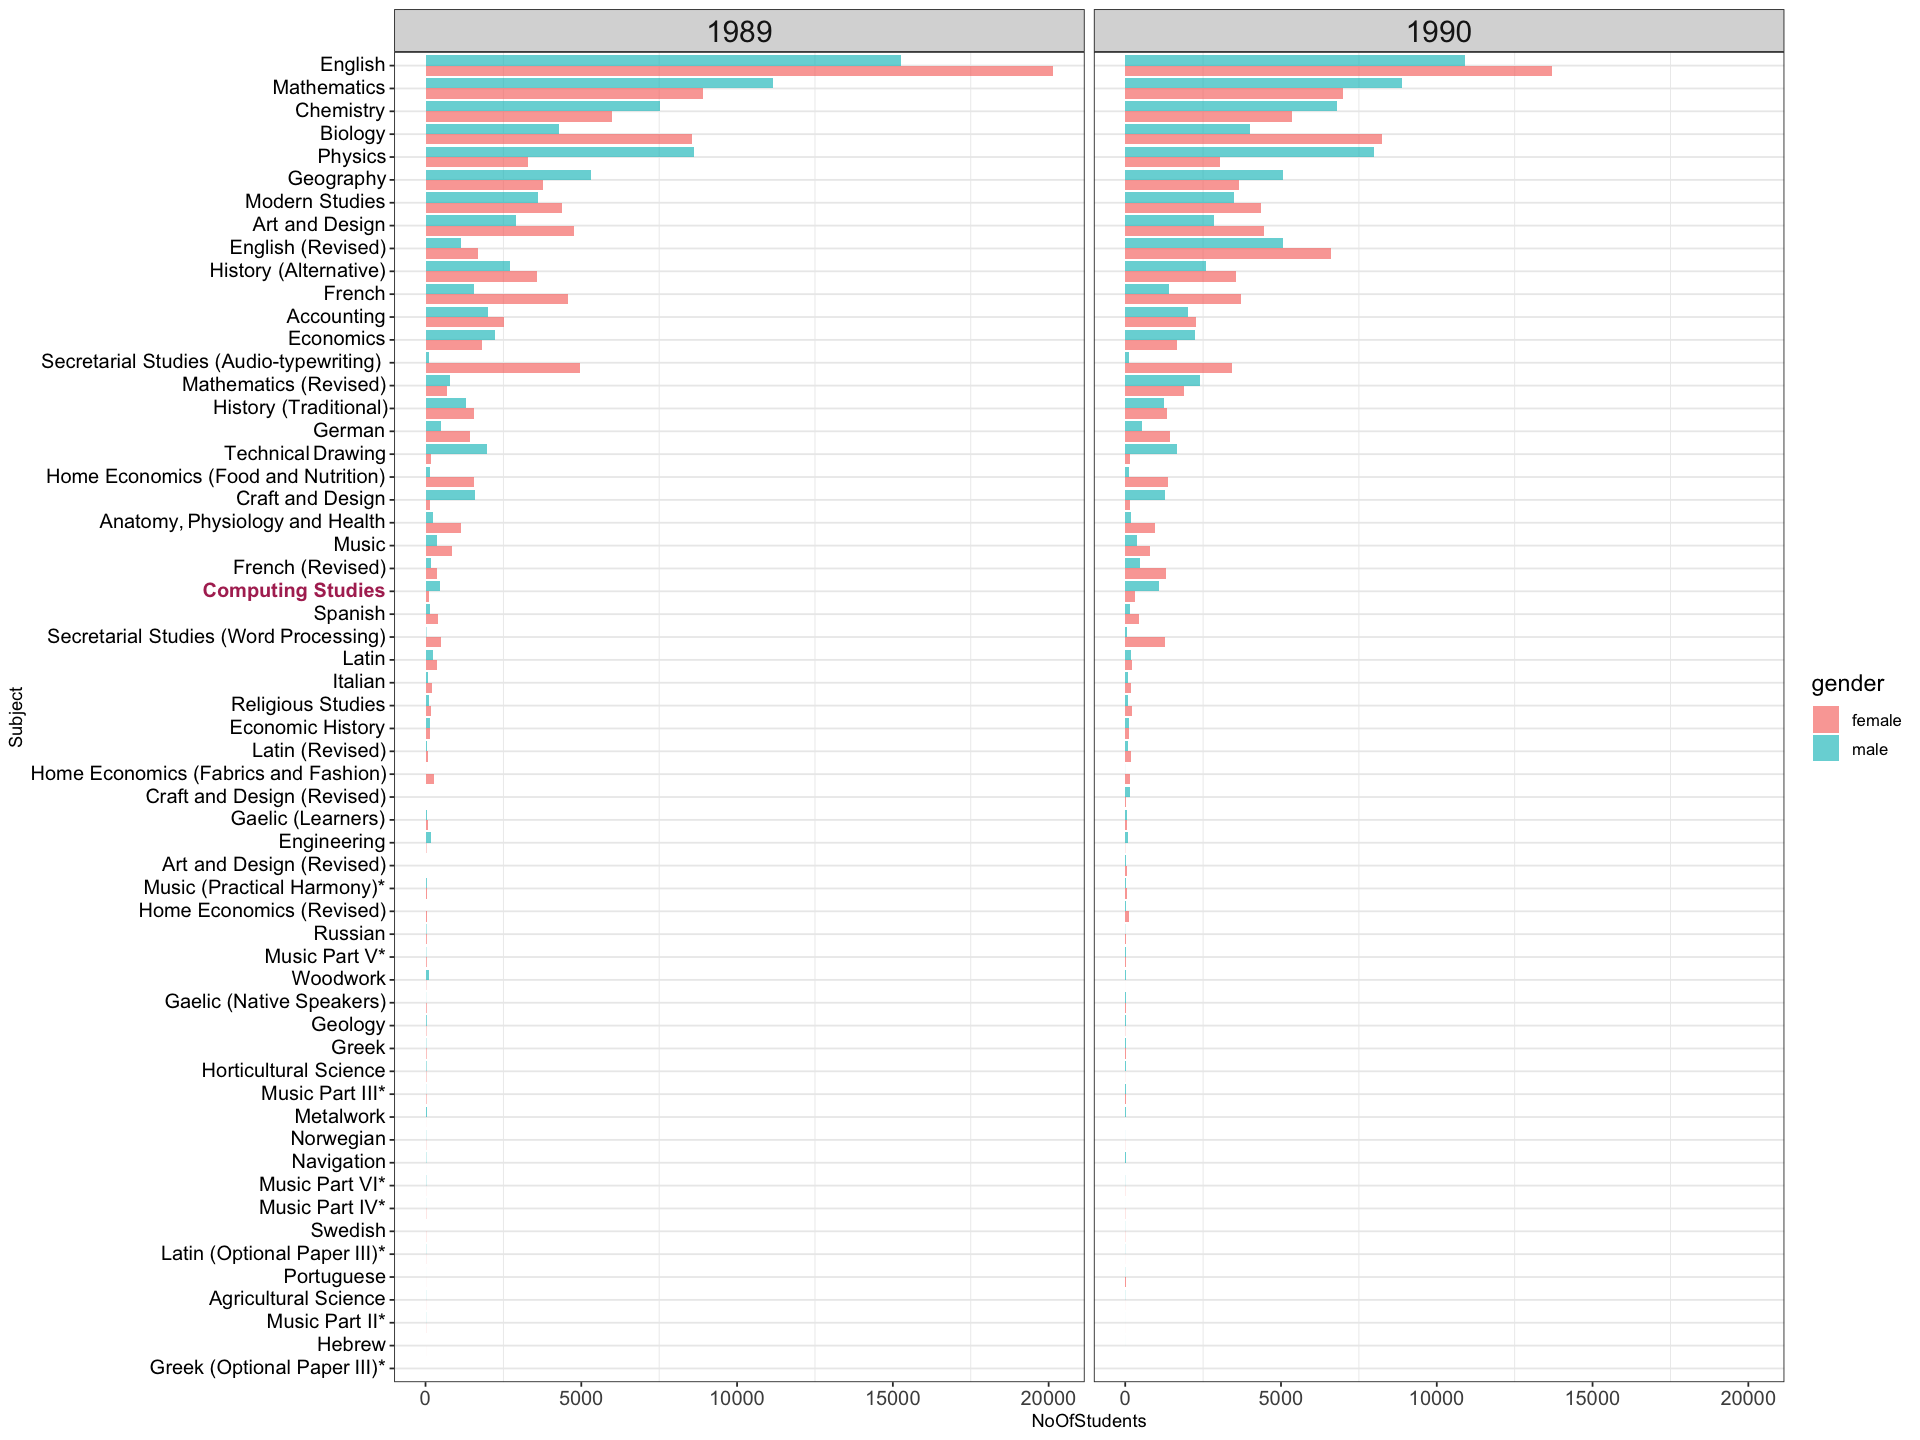

In [26]:
higher_1989 %>%
    mutate(year = 1989) %>%

full_join(higher_1990 %>%
    mutate(year = 1990)) %>%

    select(year, everything()) %>%
    pivot_longer(!c(year, Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((!gender %in% c("all")) & (grade %in% c("Entries"))) %>% 
    arrange(Subject, year) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot... and na.rm in fct_reorder is iffy ..

    mutate(Subject.label = eval(formatted_subject_labels_as_expr),
           Subject.label = fct_reorder(Subject.label, NoOfStudents)) %>%


    ggplot(aes(y = Subject.label, x = NoOfStudents, fill = gender)) +
        geom_col(alpha = 0.65, position = "dodge", na.rm = T) +
        ylab("Subject") +
        dressCodeTheme + 
        facet_wrap(~ as.factor(year))

<br />&nbsp;<br />

# 2019

In [27]:
higher_2019 <- read_csv("sta_it_402/data/grades/2019_Higher.csv", trim_ws = T) %>% 
                                filter(rowSums(is.na(.)) != ncol(.))



glimpse(higher_2019)
head(higher_2019)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  Subject = col_character(),
  `all-Entries` = col_number(),
  `male-percentage` = col_double(),
  `female-percentage` = col_double(),
  `NotKnown-percentage` = col_double(),
  `NA-percentage` = col_double(),
  `male-percentageA` = col_double(),
  `female-percentageA` = col_double(),
  `NotKnown-percentageA` = col_character(),
  `NA-percentageA` = col_character(),
  `male-percentageA-C` = col_double(),
  `female-percentageA-C` = col_double(),
  `NotKnown-percentageA-C` = col_character(),
  `NA-percentageA-C` = col_character(),
  `all-percentageA` = col_double(),
  `all-percentageB` = col_double(),
  `all-percentageC` = col_double(),
  `all-percentageD` = col_double(),
  NumberOfCentres = col_logical()
)




Rows: 46
Columns: 19
$ Subject                  <chr> "Accounting", "Administration and IT", "Art …
$ `all-Entries`            <dbl> 1222, 3770, 5233, 7686, 8322, 838, 10047, 39…
$ `male-percentage`        <dbl> 56, 35, 19, 34, 46, 9, 47, 4, 35, 36, 83, 5,…
$ `female-percentage`      <dbl> 44, 65, 81, 66, 54, 91, 53, 96, 65, 64, 17, …
$ `NotKnown-percentage`    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `NA-percentage`          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `male-percentageA`       <dbl> 41, 24, 20, 28, 27, 12, 30, 24, 75, 29, 21, …
$ `female-percentageA`     <dbl> 42, 31, 25, 27, 35, 10, 30, 14, 88, 35, 33, …
$ `NotKnown-percentageA`   <chr> "-", "-", "-", "-", "-", "-", "-", "-", "-",…
$ `NA-percentageA`         <chr> "-", "-", "***", "-", "-", "***", "-", "-", …
$ `male-percentageA-C`     <dbl> 77, 76, 76, 74, 73, 49, 74, 65, 92, 71, 63, …
$ `female-percentageA-C`   <dbl> 81, 80, 82, 72, 78, 57, 77, 65, 99, 79, 72, …
$ `NotKnown-percentageA-C` <chr

Subject               all-Entries male-percentage female-percentage
1 Accounting            1222        56              44               
2 Administration and IT 3770        35              65               
3 Art and Design        5233        19              81               
4 Biology               7686        34              66               
5 Business Management   8322        46              54               
6 Care                   838         9              91               
  NotKnown-percentage NA-percentage male-percentageA female-percentageA
1 0                   0             41               42                
2 0                   0             24               31                
3 0                   0             20               25                
4 0                   0             28               27                
5 0                   0             27               35                
6 0                   0             12               10                
  NotKnown-percentageA NA-percentageA male-percentageA-C female-percentageA-C
1 -                    -              77                 81                  
2 -                    -              76                 80                  
3 -                    ***            76                 82                  
4 -                    -              74                 72                  
5 -                    -              73                 78                  
6 -                    ***            49                 57                  
  NotKnown-percentageA-C NA-percentageA-C all-percentageA all-percentageB
1 -                      -                41              19             
2 -                      -                29              27             
3 -                      ***              24              28             
4 -                      -                28              22             
5 -                      -                32              24             
6 -                      ***              10              19             
  all-percentageC all-percentageD NumberOfCentres
1 18              10              NA             
2 23              14              NA             
3 29              15              NA             
4 23              17              NA             
5 21              13              NA             
6 27              22              NA

In [28]:
# TODO - record - <x% or gt ...

higher_2019_approximations <- higher_2019 %>%
    mutate_at(c("Subject"), as.factor) %>%
    mutate_at(c("NumberOfCentres"), as.integer) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-") | contains("-percentage")), as.character) %>%

    filter_at(vars(contains("-percentage")), any_vars(str_detect(., "\\*\\*\\*"))) # less than 5 entries - NOT %

higher_2019_approximations

Subject           all-Entries male-percentage female-percentage
1  Art and Design    5233        19              81               
2  Care              838         9               91               
3  Drama             2884        30              70               
4  English           35460       42              58               
5  Gaelic (Learners) 61          18              80               
6  Geography         6867        44              56               
7  Human Biology     6259        29              71               
8  Photography       2473        30              69               
9  Psychology        3410        24              76               
10 Sociology         927         25              75               
11 Spanish           3054        29              71               
   NotKnown-percentage NA-percentage male-percentageA female-percentageA
1  0                   0             20               25                
2  0                   0             12               10                
3  0                   0             24               29                
4  0                   0             19               27                
5  2                   0             73               49                
6  0                   0             23               31                
7  0                   0             24               25                
8  0                   0             18               23                
9  0                   0             9                12                
10 0                   0             16               22                
11 0                   0             45               48                
   NotKnown-percentageA NA-percentageA male-percentageA-C female-percentageA-C
1  -                    ***            76                 82                  
2  -                    ***            49                 57                  
3  ***                  -              72                 83                  
4  -                    ***            69                 77                  
5  ***                  -              91                 90                  
6  ***                  -              72                 79                  
7  ***                  -              67                 71                  
8  ***                  -              74                 80                  
9  -                    ***            38                 47                  
10 -                    ***            52                 62                  
11 ***                  -              81                 84                  
   NotKnown-percentageA-C NA-percentageA-C all-percentageA all-percentageB
1  -                      ***              24              28             
2  -                      ***              10              19             
3  ***                    -                28              26             
4  -                      ***              23              25             
5  ***                    -                52              25             
6  ***                    -                28              24             
7  ***                    -                25              21             
8  ***                    -                21              29             
9  -                      ***              12              14             
10 -                      ***              20              19             
11 ***                    -                47              19             
   all-percentageC all-percentageD NumberOfCentres
1  29              15              NA             
2  27              22              NA             
3  25              15              NA             
4  25              18              NA             
5  13              10              NA             
6  24              15              NA             
7  24              19              NA             
8  28              13              NA             
9  19           

In [29]:
higher_2019 <- higher_2019 %>%

    map_df(function(x) {gsub("\\*\\*\\*", NA, x)}) %>% # order matters - converts cols to x'ter

    mutate_at(c("Subject"), as.factor) %>%
    mutate_at(c("NumberOfCentres"), as.integer) %>%


    #mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-") | contains("-percentage")), as.character) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-") | contains("-percentage")), parse_number) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-") | contains("-percentage")), as.integer) %>%
    suppressWarnings

glimpse(higher_2019)     
head(higher_2019)

Rows: 46
Columns: 19
$ Subject                  <fct> Accounting, Administration and IT, Art and D…
$ `all-Entries`            <int> 1222, 3770, 5233, 7686, 8322, 838, 10047, 39…
$ `male-percentage`        <int> 56, 35, 19, 34, 46, 9, 47, 4, 35, 36, 83, 5,…
$ `female-percentage`      <int> 44, 65, 81, 66, 54, 91, 53, 96, 65, 64, 17, …
$ `NotKnown-percentage`    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `NA-percentage`          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `male-percentageA`       <int> 41, 24, 20, 28, 27, 12, 30, 24, 75, 29, 21, …
$ `female-percentageA`     <int> 42, 31, 25, 27, 35, 10, 30, 14, 88, 35, 33, …
$ `NotKnown-percentageA`   <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `NA-percentageA`         <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `male-percentageA-C`     <int> 77, 76, 76, 74, 73, 49, 74, 65, 92, 71, 63, …
$ `female-percentageA-C`   <int> 81, 80, 82, 72, 78, 57, 77, 65, 99, 79, 72, …
$ `NotKnown-percentageA-C` <int

Subject               all-Entries male-percentage female-percentage
1 Accounting            1222        56              44               
2 Administration and IT 3770        35              65               
3 Art and Design        5233        19              81               
4 Biology               7686        34              66               
5 Business Management   8322        46              54               
6 Care                   838         9              91               
  NotKnown-percentage NA-percentage male-percentageA female-percentageA
1 0                   0             41               42                
2 0                   0             24               31                
3 0                   0             20               25                
4 0                   0             28               27                
5 0                   0             27               35                
6 0                   0             12               10                
  NotKnown-percentageA NA-percentageA male-percentageA-C female-percentageA-C
1 NA                   NA             77                 81                  
2 NA                   NA             76                 80                  
3 NA                   NA             76                 82                  
4 NA                   NA             74                 72                  
5 NA                   NA             73                 78                  
6 NA                   NA             49                 57                  
  NotKnown-percentageA-C NA-percentageA-C all-percentageA all-percentageB
1 NA                     NA               41              19             
2 NA                     NA               29              27             
3 NA                     NA               24              28             
4 NA                     NA               28              22             
5 NA                     NA               32              24             
6 NA                     NA               10              19             
  all-percentageC all-percentageD NumberOfCentres
1 18              10              NA             
2 23              14              NA             
3 29              15              NA             
4 23              17              NA             
5 21              13              NA             
6 27              22              NA

In [30]:
head(higher_2019, 0)

higher_2019 <- higher_2019 %>%

    select(Subject, `all-Entries`, ends_with("-percentage")) %>%
    mutate_at(vars(ends_with("-percentage")), ~round(. /100 * `all-Entries`)) %>%

    select_all(~str_replace(., "-percentage", "-Entries")) %>%

    left_join(higher_2019 %>%
              select(!ends_with("-percentage"))
             ) %>%

    mutate_at(vars(starts_with("male-") & contains("-percentage")), ~round(. /100 * `male-Entries`)) %>%
    mutate_at(vars(starts_with("female-") & contains("-percentage")), ~round(. /100 * `female-Entries`)) %>%
    mutate_at(vars(starts_with("all-") & contains("-percentage")), ~round(. /100 * `all-Entries`)) %>%
    mutate_at(vars(starts_with("NotKnown-") & contains("-percentage")), ~round(. /100 * `NotKnown-Entries`)) %>%
    mutate_at(vars(starts_with("NA-") & contains("-percentage")), ~round(. /100 * `NA-Entries`)) %>%
    
    mutate(#"male-NoAward" = (`male-Entries` - reduce(select(., (starts_with("male") & !ends_with("-Entries"))), `+`)), # rowSums(select(., starts_with("male-")))
           #"female-NoAward" = (`female-Entries` - reduce(select(., (starts_with("female") & !ends_with("-Entries"))), `+`)), 
           "all-NoAward" = (`all-Entries` - reduce(select(., (starts_with("all-") & !ends_with("-Entries"))), `+`))) %>%

    select_all(~str_replace(., "-percentage", "-")) %>%
    relocate(`all-NoAward`, .after = `all-Entries`) 

head(higher_2019)

Subject all-Entries male-percentage female-percentage NotKnown-percentage
     NA-percentage male-percentageA female-percentageA NotKnown-percentageA
     NA-percentageA male-percentageA-C female-percentageA-C
     NotKnown-percentageA-C NA-percentageA-C all-percentageA all-percentageB
     all-percentageC all-percentageD NumberOfCentres

Joining, by = c("Subject", "all-Entries")



Subject               all-Entries all-NoAward male-Entries female-Entries
1 Accounting            1222        147          684          538          
2 Administration and IT 3770        264         1320         2450          
3 Art and Design        5233        209          994         4239          
4 Biology               7686        768         2613         5073          
5 Business Management   8322        832         3828         4494          
6 Care                   838        185           75          763          
  NotKnown-Entries NA-Entries male-A female-A NotKnown-A NA-A male-A-C
1 0                0           280    226     NA         NA    527    
2 0                0           317    760     NA         NA   1003    
3 0                0           199   1060     NA         NA    755    
4 0                0           732   1370     NA         NA   1934    
5 0                0          1034   1573     NA         NA   2794    
6 0                0             9     76     NA         NA     37    
  female-A-C NotKnown-A-C NA-A-C all-A all-B all-C all-D NumberOfCentres
1  436       NA           NA      501   232   220   122  NA             
2 1960       NA           NA     1093  1018   867   528  NA             
3 3476       NA           NA     1256  1465  1518   785  NA             
4 3653       NA           NA     2152  1691  1768  1307  NA             
5 3505       NA           NA     2663  1997  1748  1082  NA             
6  435       NA           NA       84   159   226   184  NA

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(common_vars)` instead of `common_vars` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Joining, by = c("Subject", "male-Entries", "male-A", "female-Entries", "female-A", "all-Entries", "all-NoAward", "all-A", "all-B", "all-C", "all-D", "NumberOfCentres", "year")

Joining, by = c("Subject", "male-Entries", "male-A", "female-Entries", "female-A", "all-Entries", "all-NoAward", "all-A", "all-B", "all-C", "all-D", "NumberOfCentres", "year")



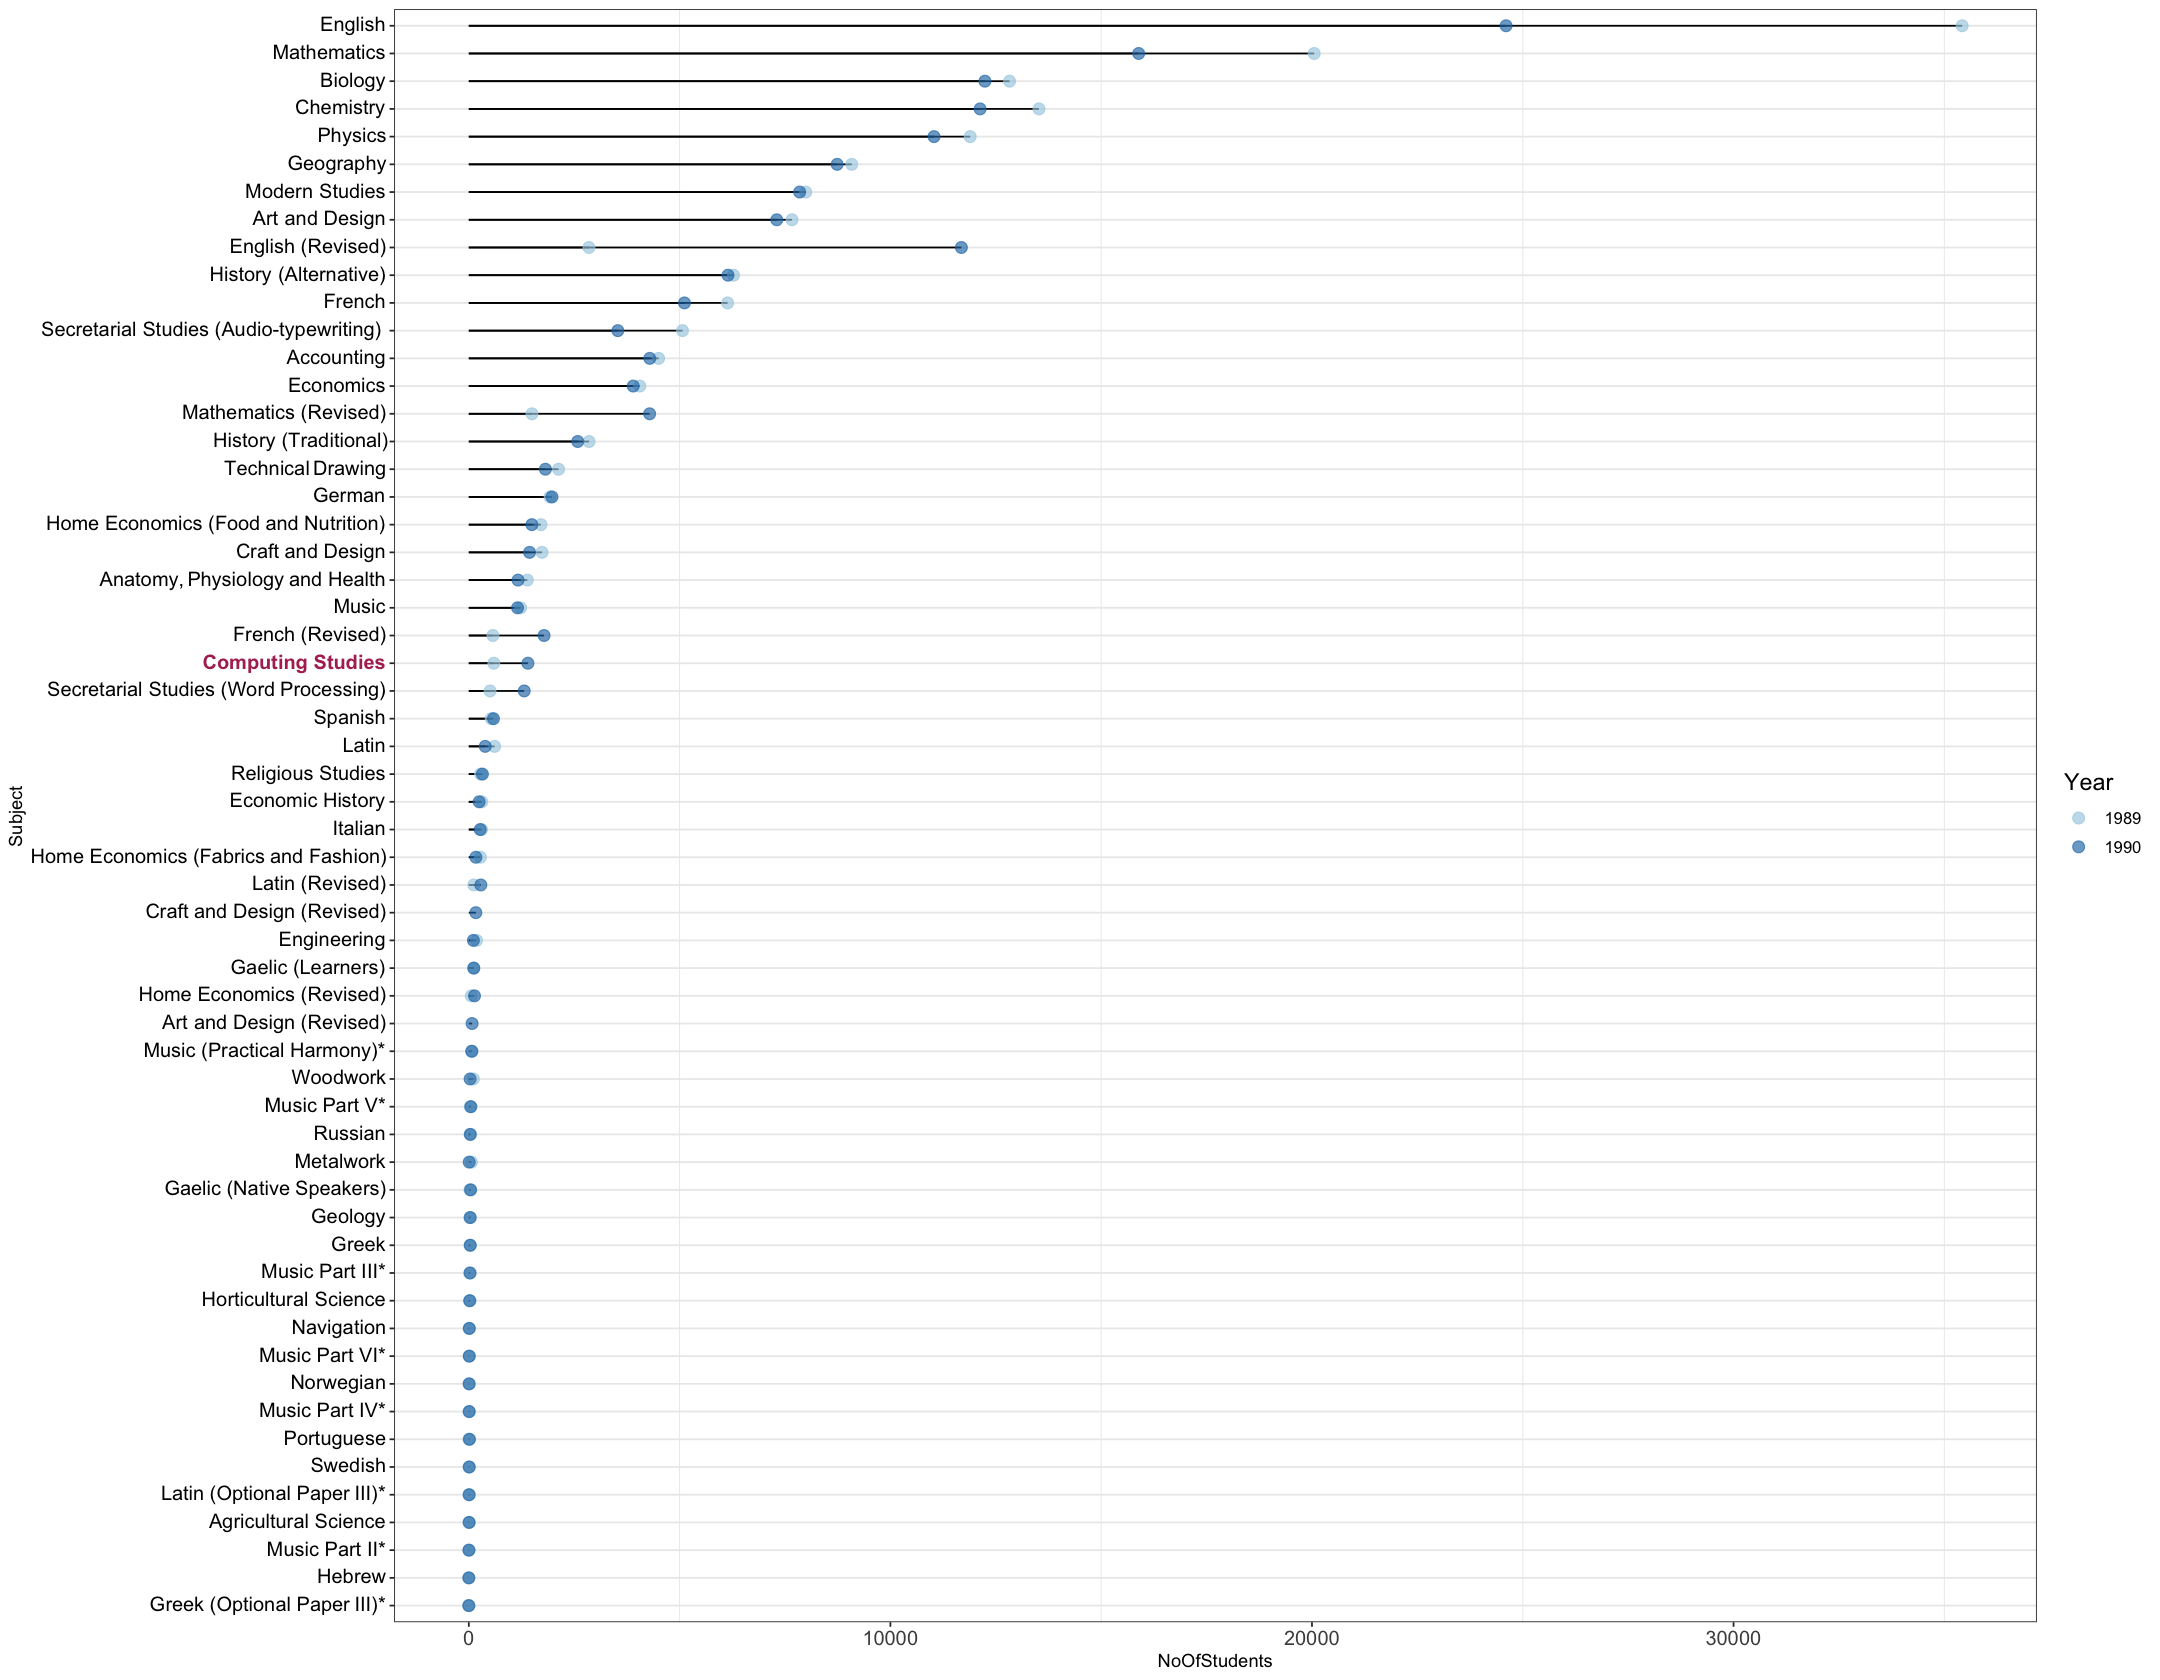

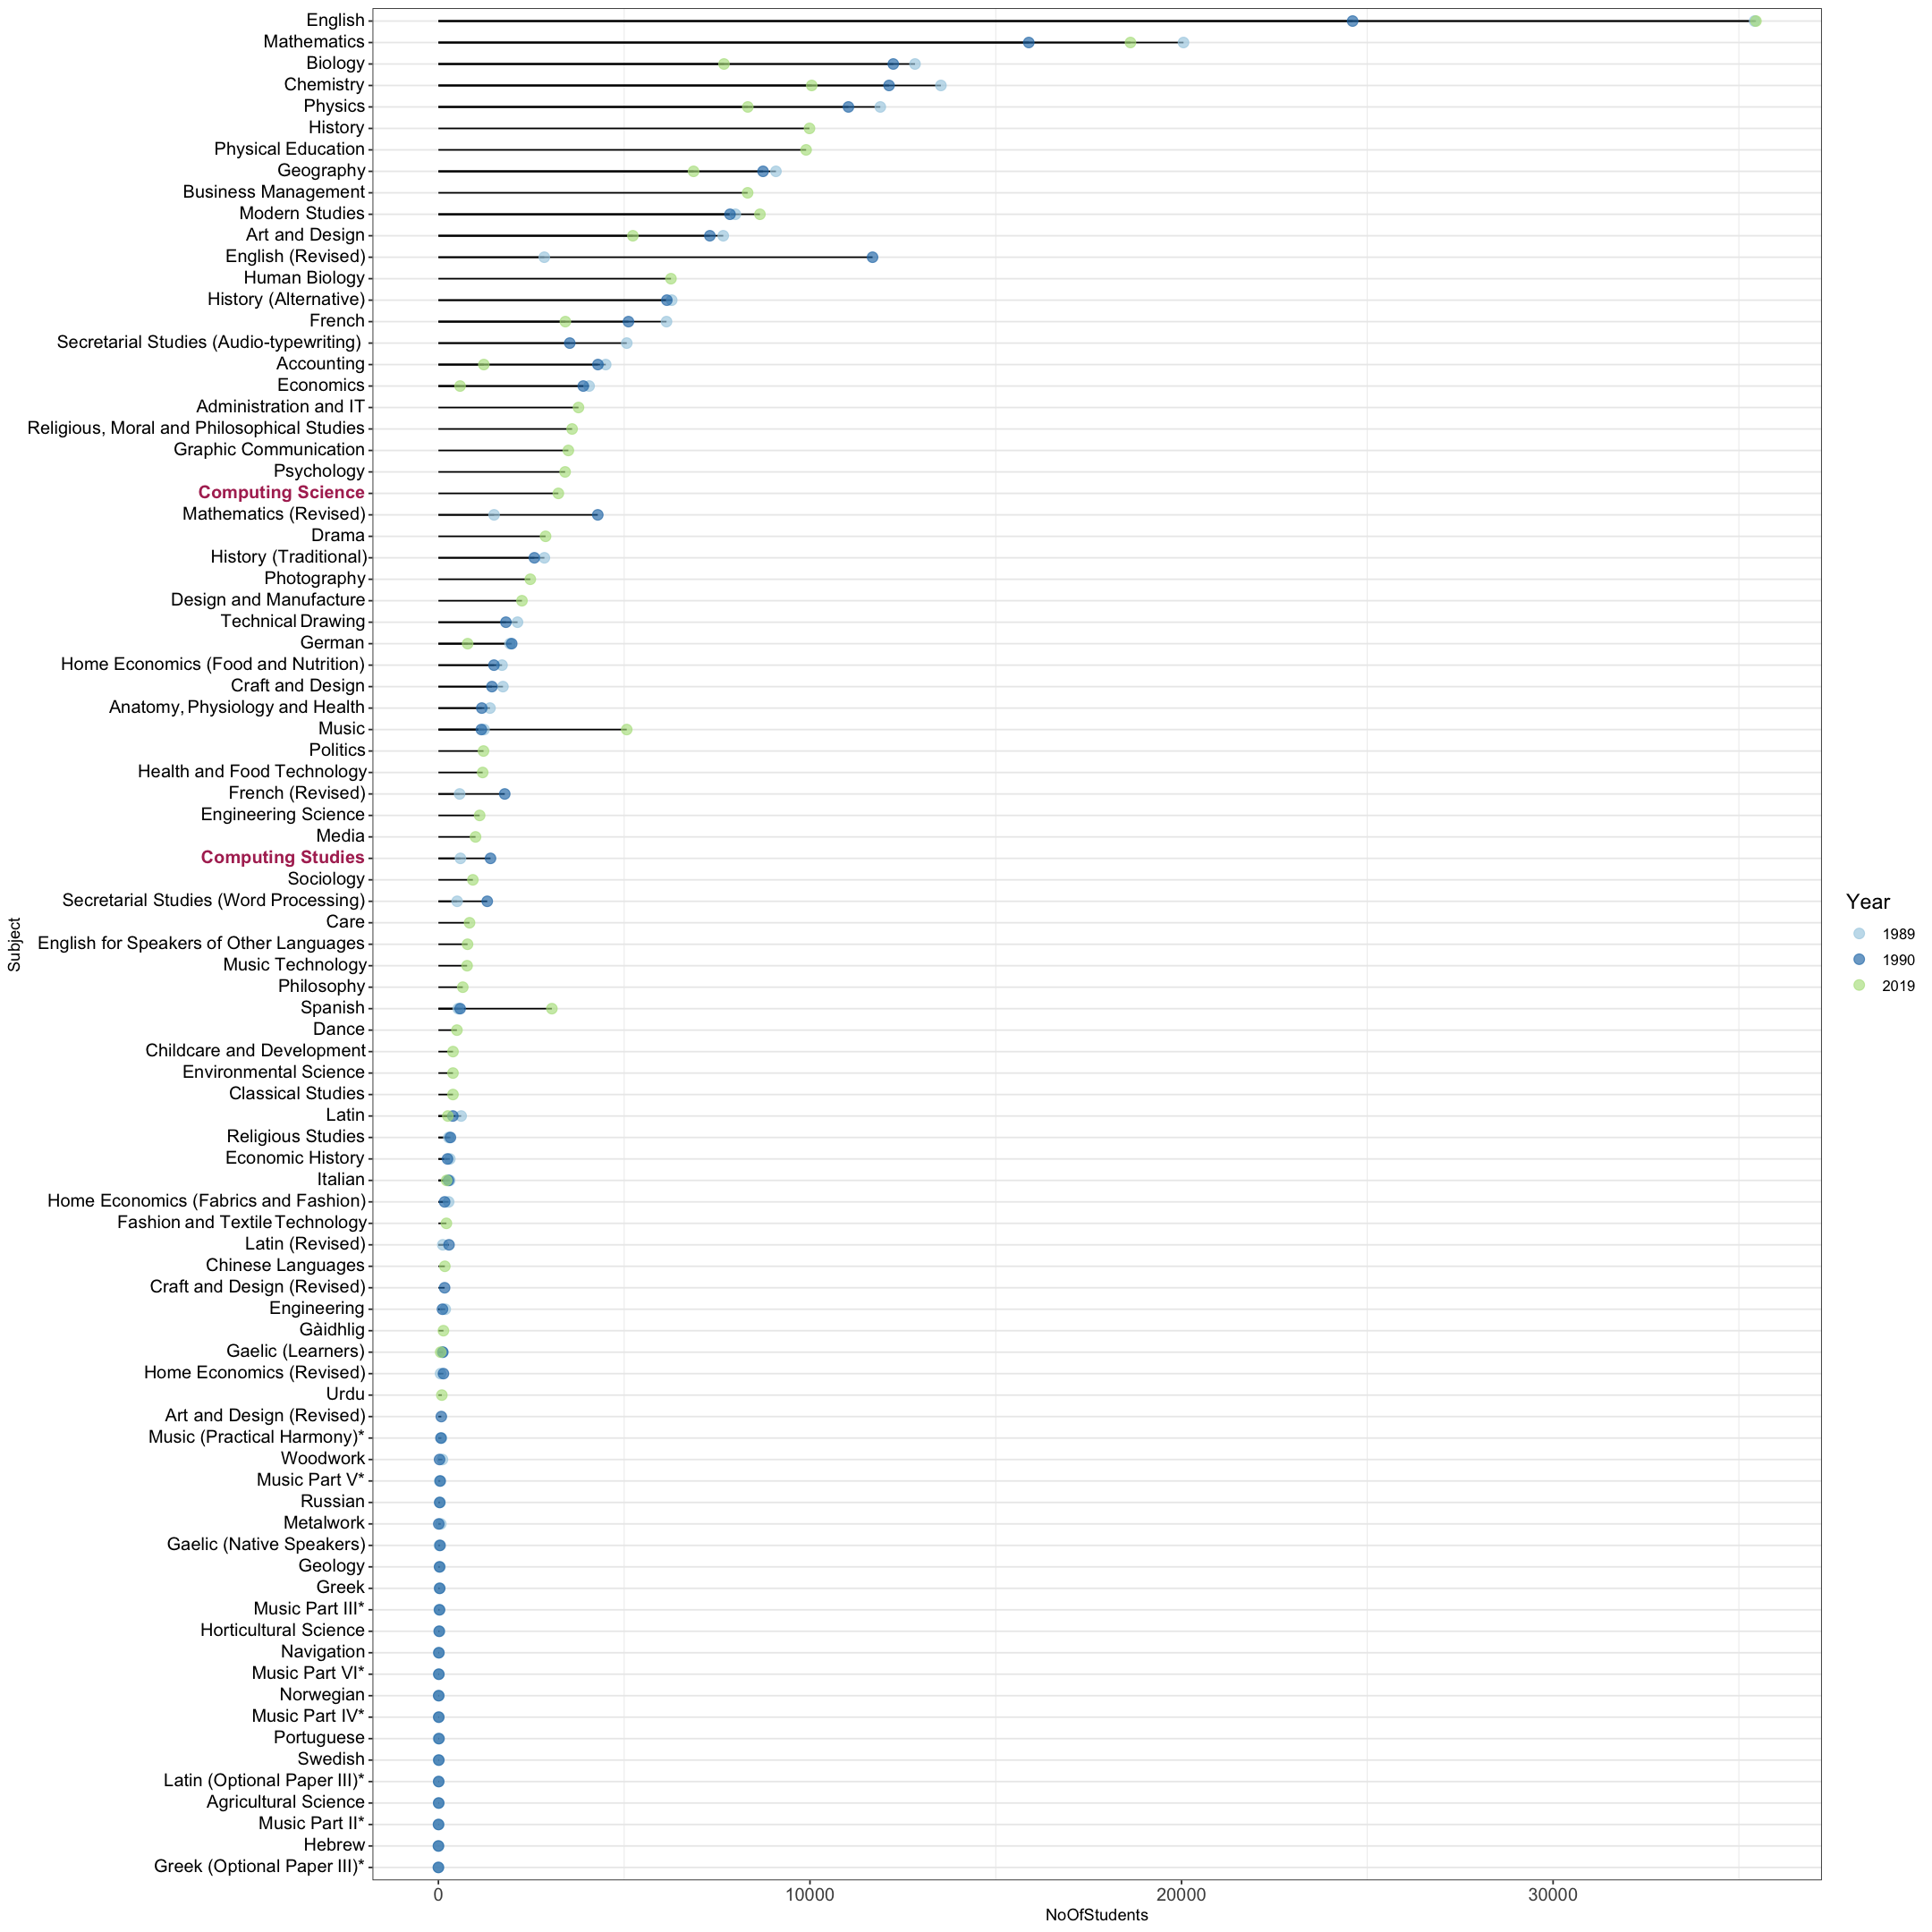

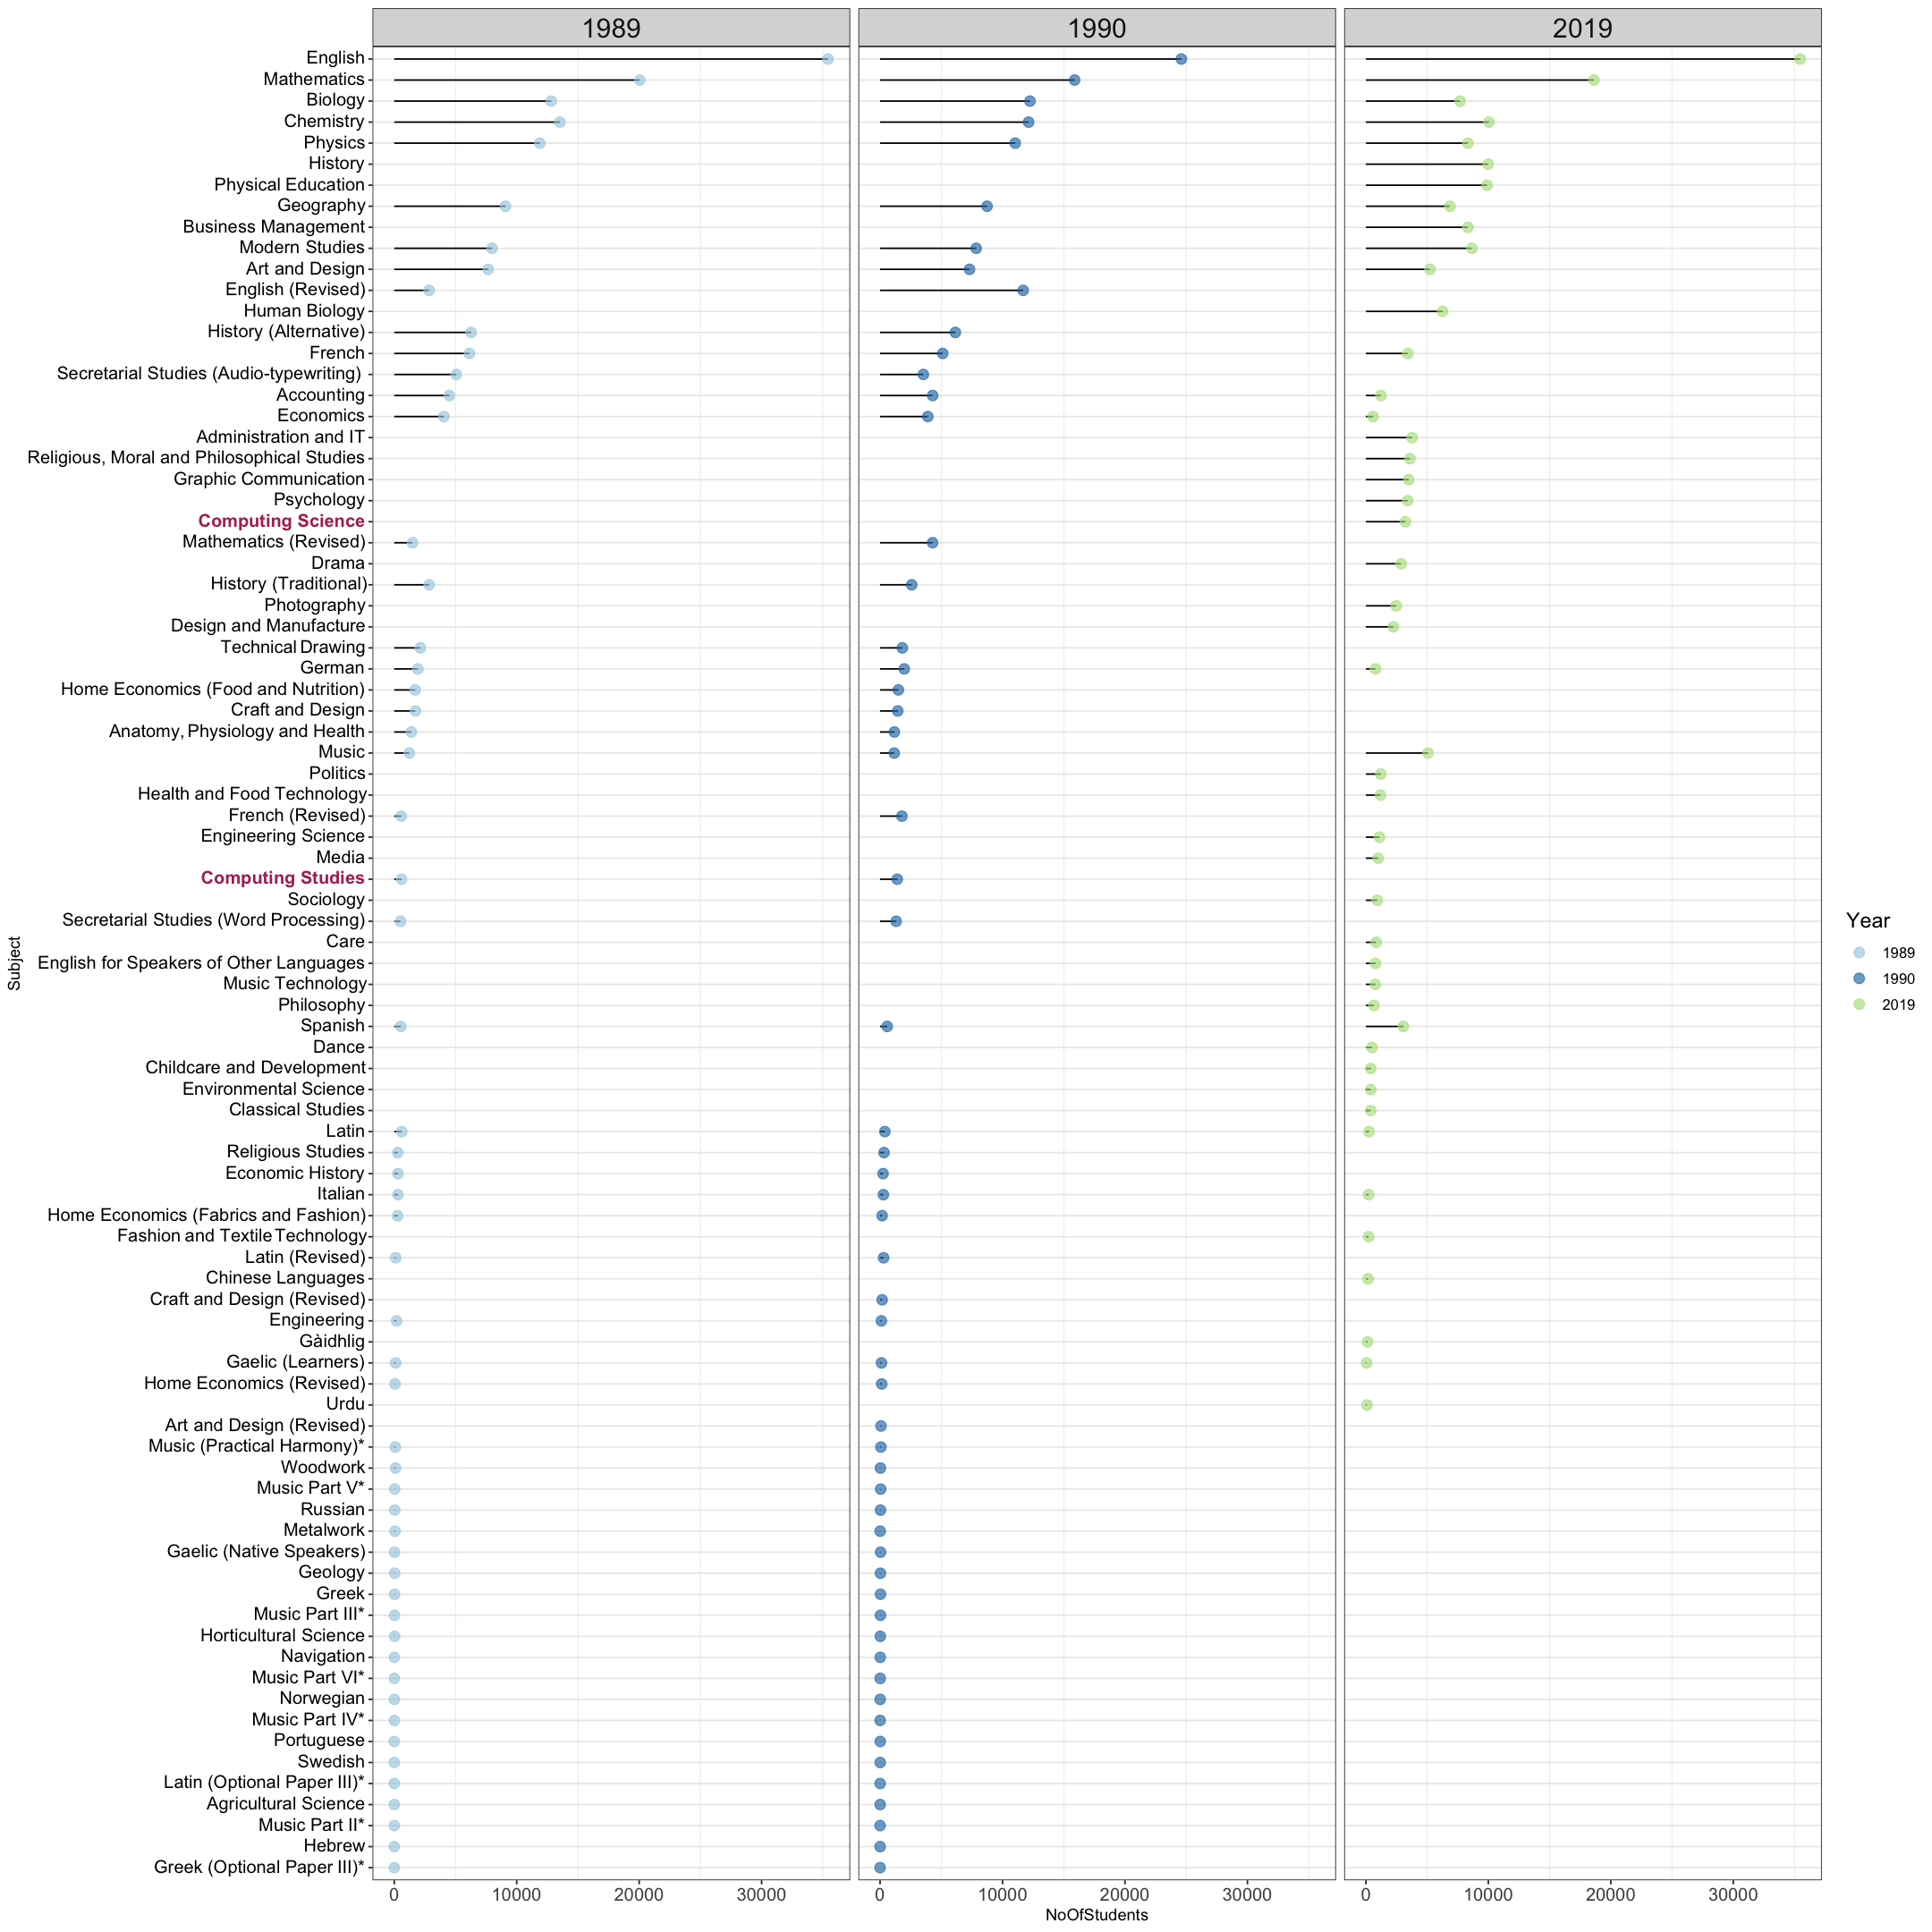

In [31]:

common_vars <- 
    colnames(higher_1989) %>%
        intersect(colnames(higher_1990)) %>%
        intersect(colnames(higher_2019))


tmp_df <- higher_1989 %>%
    select(common_vars) %>%
    mutate(year = 1989) %>%

    full_join(higher_1990 %>%
        select(common_vars) %>%
        mutate(year = 1990)
     ) %>%

    full_join(higher_2019 %>%
        select(common_vars) %>%
        mutate(year = 2019)
     ) %>%


    select(year, everything()) %>%
    pivot_longer(!c(year, Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((gender %in% c("all")) & (grade %in% c("Entries"))) %>% 
    arrange(Subject, year) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot... and na.rm in fct_reorder is iffy ..

    mutate(Subject.label = eval(formatted_subject_labels_as_expr),
           Subject.label = fct_reorder(Subject.label, NoOfStudents)) 


options(repr.plot.width = 18, repr.plot.height = 14)
tmp_df %>%
    filter(year != 2019) %>%

    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_segment(aes(xend = 0, yend = Subject.label)) +
        geom_point(aes(colour = as.factor(year)), size = 3, alpha = 0.65, na.rm = T) +
        scale_colour_brewer(name = "Year", palette = "Paired") +
        ylab("Subject") +
        dressCodeTheme 


options(repr.plot.width = 18, repr.plot.height = 18)
tmp_df %>%

    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_segment(aes(xend = 0, yend = Subject.label)) +
        geom_point(aes(colour = as.factor(year)), size = 3, alpha = 0.65, na.rm = T) +
        scale_colour_brewer(name = "Year", palette = "Paired") +
        ylab("Subject") +
        dressCodeTheme 


tmp_df %>%

    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_segment(aes(xend = 0, yend = Subject.label)) +
        geom_point(aes(colour = as.factor(year)), size = 3, alpha = 0.65, na.rm = T) +
        scale_colour_brewer(name = "Year", palette = "Paired") +
        ylab("Subject") +
        dressCodeTheme + 
        facet_wrap(~ as.factor(year))

rm(common_vars, tmp_df)


Joining, by = c("Subject", "male-Entries", "male-A", "female-Entries", "female-A", "all-Entries", "all-NoAward", "all-A", "all-B", "all-C", "all-D", "NumberOfCentres", "year")

Joining, by = c("Subject", "male-Entries", "male-A", "female-Entries", "female-A", "all-Entries", "all-NoAward", "all-A", "all-B", "all-C", "all-D", "NumberOfCentres", "year")



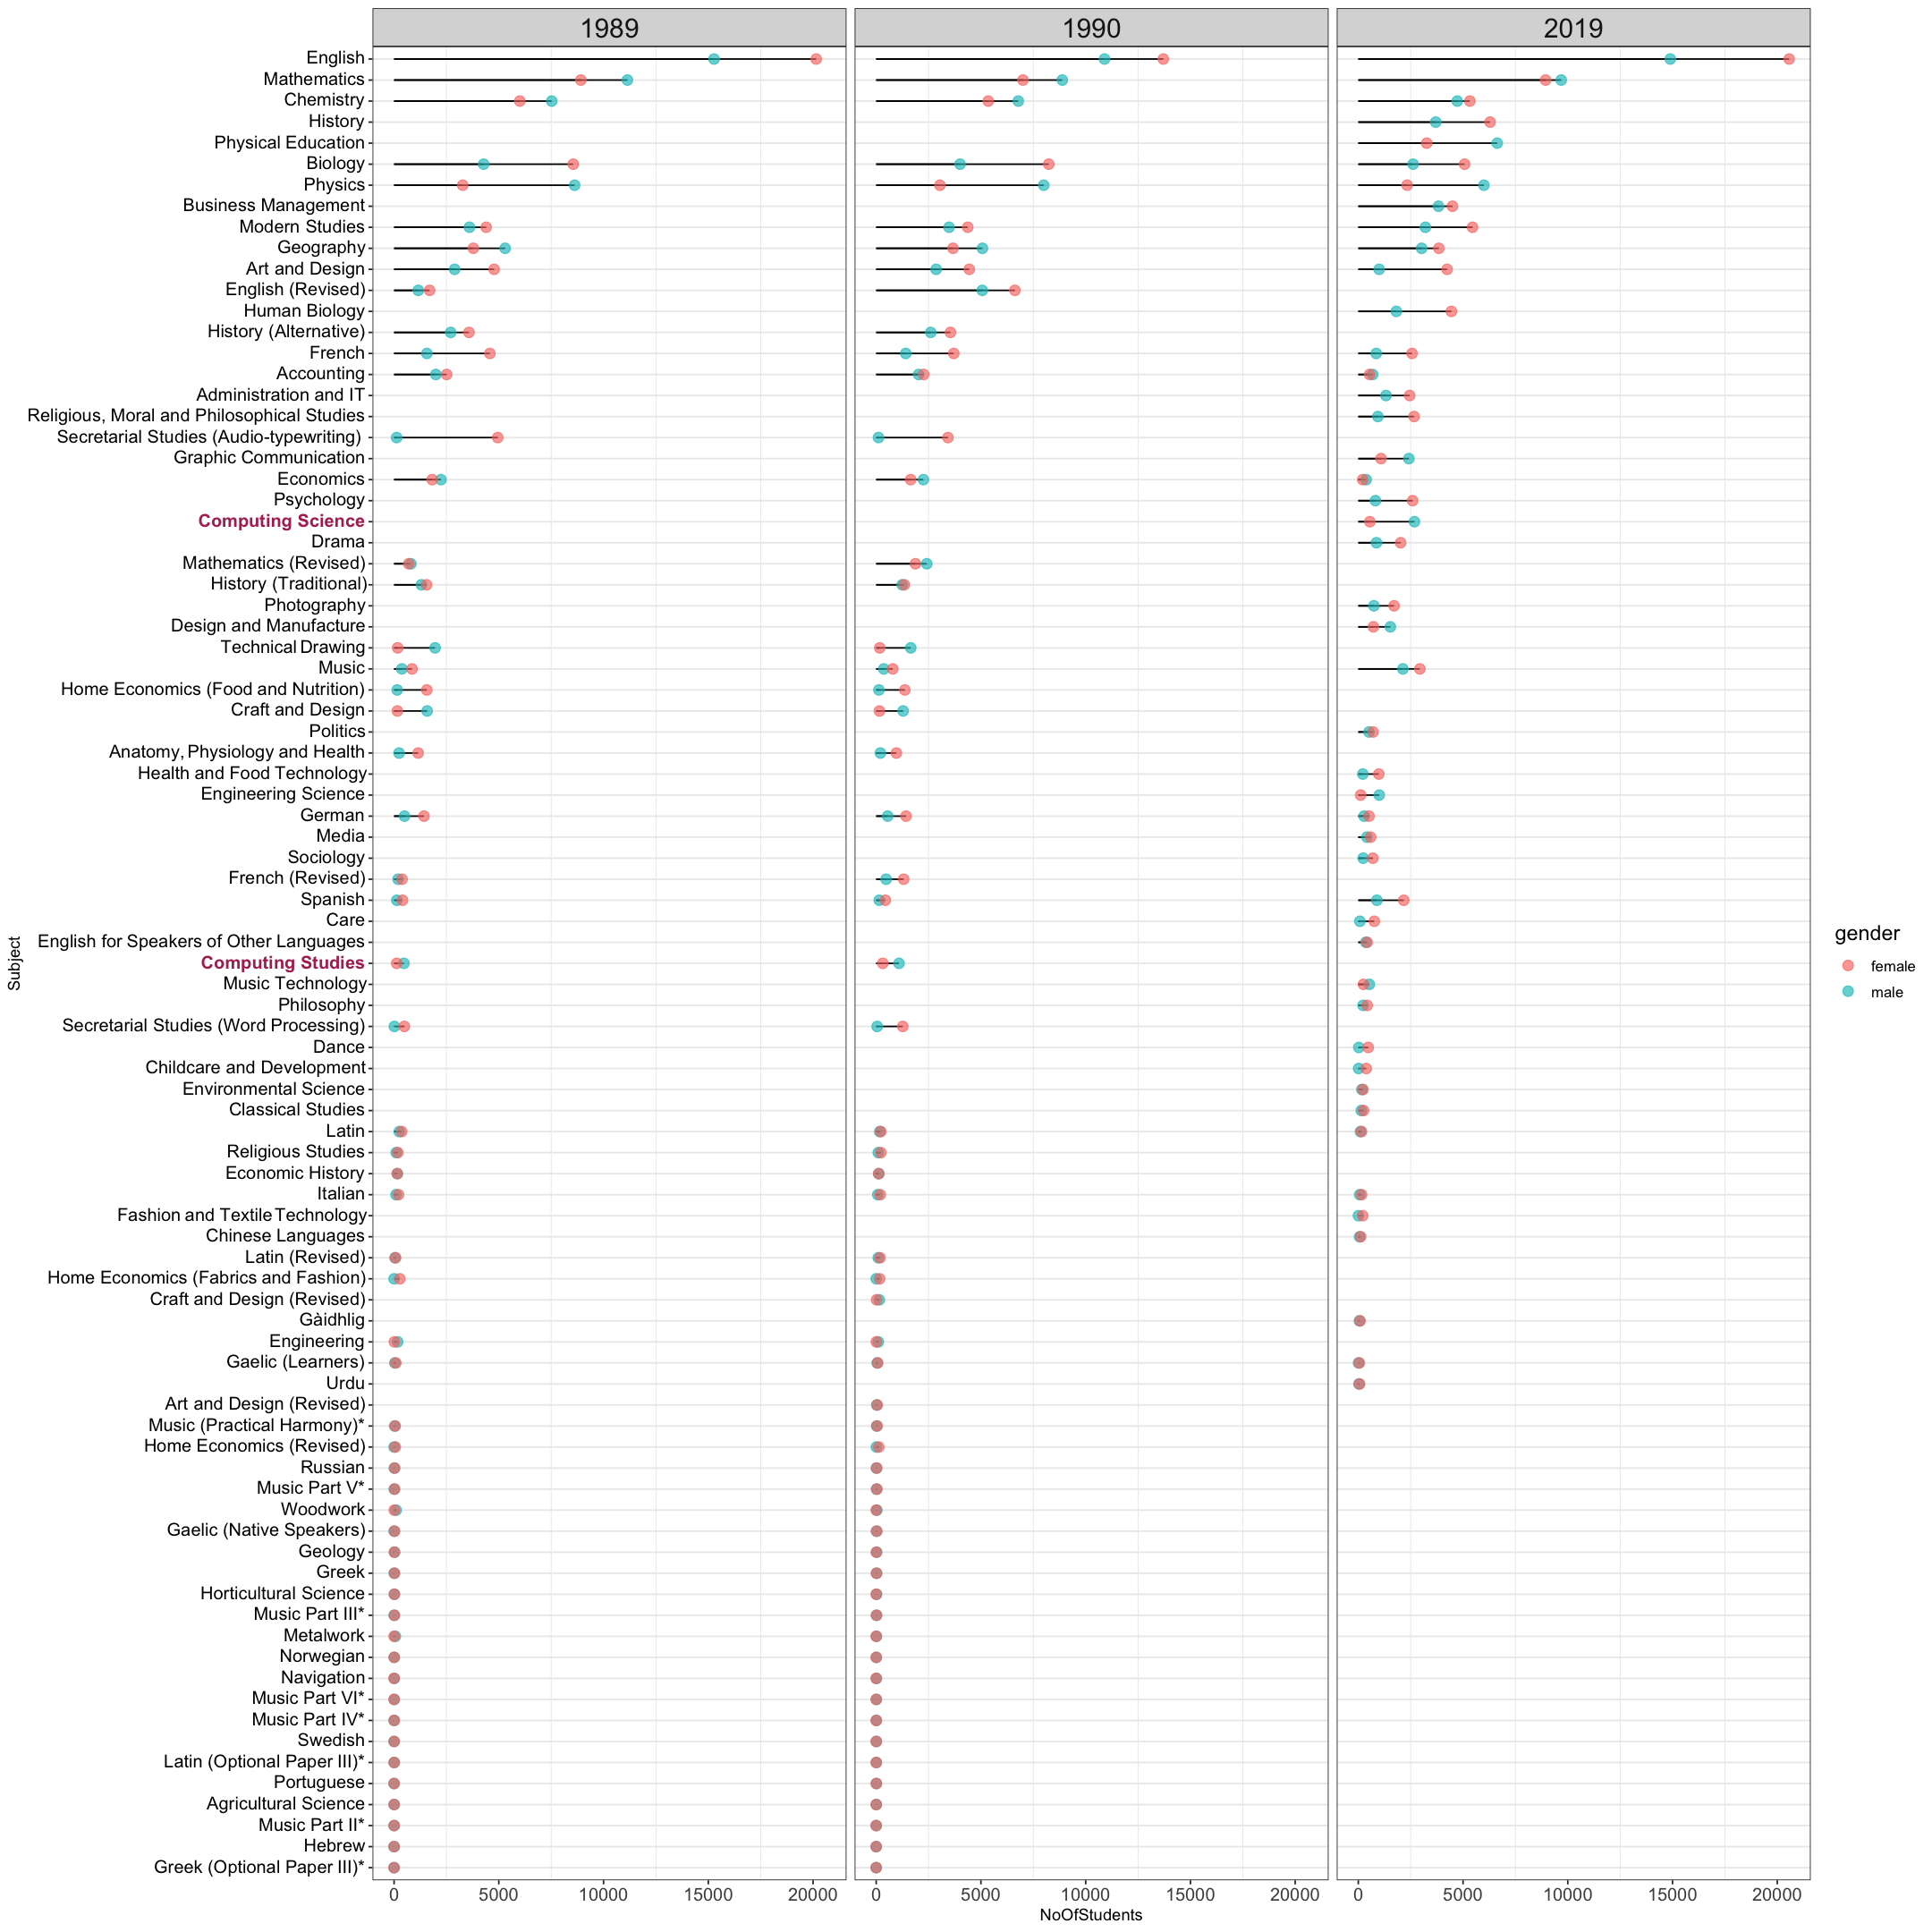

In [32]:
# not the best example - year gap too large - but illustrates the point

common_vars <- 
    colnames(higher_1989) %>%
        intersect(colnames(higher_1990)) %>%
        intersect(colnames(higher_2019))


higher_1989 %>%
    select(common_vars) %>%
    mutate(year = 1989) %>%

    full_join(higher_1990 %>%
        select(common_vars) %>%
        mutate(year = 1990)
     ) %>%

    full_join(higher_2019 %>%
        select(common_vars) %>%
        mutate(year = 2019)
     ) %>%


    select(year, everything()) %>%
    pivot_longer(!c(year, Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((!gender %in% c("all")) & (grade %in% c("Entries"))) %>% 
    arrange(Subject, year) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot... and na.rm in fct_reorder is iffy ..

    mutate(Subject.label = eval(formatted_subject_labels_as_expr),
           Subject.label = fct_reorder(Subject.label, NoOfStudents)) %>%


    ggplot(aes(y = Subject.label, x = NoOfStudents, fill = gender)) +
        geom_segment(aes(xend = 0, yend = Subject.label)) +
        geom_point(aes(colour = gender), size = 3, alpha = 0.65, na.rm = T) +
        ylab("Subject") +
        dressCodeTheme + 
        facet_wrap(~ as.factor(year))
 

rm(common_vars)


<br />&nbsp;<br />

# 1989-99 visual exploration pipeline

* Notes: 
    * no computing '86-88
    *"New Higher" starts from 2000

<br />

In [33]:
loadAndParseFile <- 
    function(pathTofile, glimpseContent = F, awardType = NULL, awardYear = NULL) {
        
        print(paste0("Parsing award file '", pathTofile, "'"))
        
        if (is_null(awardType) || (str_trim(awardType) == "")) {
            
            awardType <- basename(pathTofile)

            if (!str_detect(awardType, regex("(?>.*_)(?>.*\\.)"))) # order matters
                stop("You must specify award type!")
                
            awardType <- unlist(str_split(awardType, "_"))[2]
            awardType <- unlist(str_split(awardType, "\\."))[1]
            
            if (tolower(awardType) %in% tolower(sqa_qualification_list$AwardId)) #relax on case only
                message(paste0("Award type '", awardType, "' derived from file name."))
            else
                stop("You must specify award type!")
        } 
                
        latestAwardYear <- year(Sys.Date())
        if (is_null(awardYear)) {
            
            awardYear <- suppressWarnings(parse_number(basename(pathTofile)))
            if (is.na(awardYear))
                stop(paste0("You must specify award year as 'yyyy', between 1986 and", latestAwardYear))
            else
                message(paste0("Award year '", awardYear, "' derived from file name."))
            
        } else if (!is.integer(awardYear) || !between(awardYear, 1986, latestAwardYear))
            stop(paste0("You must specify award year as 'yyyy', between 1986 and", latestAwardYear))
        
        
        # passed tests - load data and return
        award_data <- read_csv(pathTofile, trim_ws = T) %>%
                            filter(rowSums(is.na(.)) != ncol(.)) %>%
                            distinct(across(everything()), .keep_all = TRUE) %>%
                            suppressMessages
        
        award_data <- award_data %>%
            mutate(year = factor(awardYear),
                   award = factor(awardType)) %>%
            select(award, year, everything())
        
        
        invisible(award_data)
    }

In [34]:
wrangleData <-
    function(awardData) {
        
        awardData <- awardData %>%

            mutate_at(c("Subject"), as.factor) %>%
            mutate_at(c("NumberOfCentres"), as.integer) %>%
            mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), as.character) %>%
            mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), parse_number) %>%
            mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), as.integer) %>%
            suppressWarnings

        
        tmp_df <- awardData %>%
            select(-matches(redundant_column_flags)) 
        tmp_df[is.na(tmp_df)] <- 0

        awardData <- bind_cols(awardData,

            tmp_df %>%
                mutate("male-NoAward" = (`male-Entries` - reduce(select(., (starts_with("male") & !ends_with("-Entries"))), `+`)), # rowSums(select(., starts_with("male-")))
                       "female-NoAward" = (`female-Entries` - reduce(select(., (starts_with("female") & !ends_with("-Entries"))), `+`)), 
                       "all-NoAward" = (`all-Entries` - reduce(select(., (starts_with("all") & !ends_with("-Entries"))), `+`))) %>%
                select(c("male-NoAward", "female-NoAward", "all-NoAward"))
            ) %>%

            relocate(`male-NoAward`, .after = `male-Entries`) %>%
            relocate(`female-NoAward`, .after = `female-Entries`) %>%
            relocate(`all-NoAward`, .after = `all-Entries`) 

        
        awardData <- awardData %>%

            pivot_longer(!c(award, year, Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
            separate("grade", c("gender", "grade"), extra = "merge") %>%
            mutate_at(c("gender", "grade", "year"), as.factor)

        invisible(awardData)
    }

In [35]:
writeToDataStore <-
    function(awardData, dbConnection, dbTable = "sqa_data", overwriteDataStore = FALSE) {
        
        if (is_null(awardData) || (nrow(awardData) == 0))
            stop("You must read in award data (in a dataframe) containing at least one row!")
        
        table_exists <- as.logical(dbGetQuery(dbConnection, paste0("SELECT COUNT(*) FROM sqlite_master WHERE name = '", 
                                                                   dbTable, "' and type = 'table'")))
        
        if (!table_exists | overwriteDataStore)
            currentRowCount <- 0
        else
            currentRowCount <- dbGetQuery(dbConn, "SELECT COUNT(*) FROM sqa_data LIMIT 6") %>%
                                    as.integer
        
        
        if (!table_exists) 
            dbWriteTable(dbConnection, dbTable, awardData)
        else 
            dbWriteTable(dbConnection, dbTable, awardData, append = !overwriteDataStore, overwrite = overwriteDataStore)
        
        # todo - dump duplicates - using dbWriteTable means no primary key set
        
        
        invisible(as.integer(dbGetQuery(dbConn, "SELECT COUNT(*) FROM sqa_data")) - currentRowCount)
    }


In [36]:
removeDuplicatesFromDataStore <- 
    function(dbConnection = NULL, dbTable = NULL) {
        
        if (is_null(dbConnection) | is_null(dbTable))
            stop("You must specify database connection and table to deduplicate!")

        
        if (!as.logical(dbGetQuery(dbConnection, 
                                   paste0("SELECT COUNT(*) FROM sqlite_master WHERE name = '", dbTable, "' and type = 'table'"))))
            stop("No changes made; source table does not exist!")
        
        
        row_count <- as.integer(dbGetQuery(dbConnection, paste("SELECT COUNT(*) FROM", dbTable)))
        if (row_count == 0) {
            
            message(paste0("Table'", dbTable, "' empty; no changes made."))
            invisible(row_count) # nothing to do - allows simple conversion to FALSE
        }
        
        
        tmp_table <- paste0(dbTable, "_tmp")
        if (as.integer(dbGetQuery(dbConnection, 
                                  paste0("SELECT COUNT(*) FROM sqlite_master WHERE name = '", tmp_table, "' and type = 'table'"))) > 0) 
            dbRemoveTable(dbConnection, "sqa_data_tmp")

        dbExecute(dbConnection, paste("CREATE TABLE ", tmp_table, " AS SELECT * FROM", dbTable, "WHERE 0"))
        dbExecute(dbConnection, paste("INSERT INTO", tmp_table,
                                      "SELECT DISTINCT * FROM", dbTable)
                 )
        
        row_count <- row_count - as.integer(dbGetQuery(dbConnection, paste("SELECT COUNT(*) FROM", tmp_table)))
        if (row_count > 0) {
            dbRemoveTable(dbConnection, dbTable)
            dbExecute(dbConnection, paste("ALTER TABLE", tmp_table, "RENAME TO", dbTable))
        } else
            dbRemoveTable(dbConnection, tmp_table)


        invisible(row_count) # no. of rows deleted
    }


In [37]:
runPipeline <-
    function(dataFile, dbConnection = NULL, overwriteDataStore = FALSE) {
        
        #print(dataFile)
        
        award_data <- loadAndParseFile(dataFile)
        #print(head(award_data))      

        award_data <- wrangleData(award_data) 
        #print(dim(award_data))
        #print(head(award_data))

        if (!is_null(dbConnection))
            writeToDataStore(award_data, dbConnection, overwriteDataStore = overwriteDataStore)
    }


In [38]:
filterInput <-
    function(pathTofile, startYear = NULL, endYear = NULL, awardTypes = NULL) {
                
        latestAwardYear <- year(Sys.Date())
        yearErrorMessage <- paste("Start and end years if set must be between 1986 and", latestAwardYear,
                                  "(inclusive), and specified as 'yyyy'")
       
        if (is_null(startYear)) 
            startYear <- 1986

        else {             
            startYear <- suppressWarnings(parse_integer(as.character(startYear)))
            if (is.na(startYear) | (startYear > latestAwardYear))
                stop(yearErrorMessage)            
        } 
        
        if (is_null(endYear)) 
            endYear <- latestAwardYear

        else {             
            endYear <- suppressWarnings(parse_integer(as.character(endYear)))
            if (is.na(endYear) | !between(endYear, 1986, latestAwardYear))
                stop(yearErrorMessage)            
        } 


        
        awardType <- basename(pathTofile)
        if (is_null(awardTypes))
            awardTypes <- sqa_qualification_list$AwardId
        else {
            awardTypes <- as.vector(awardTypes) # allow single value as input
        
            if (!sum(tolower(awardTypes) %in% tolower(sqa_qualification_list$AwardId)) == length(awardTypes)) {
                warning(paste("Non-valid (SQA) award types excluded:",
                             awardTypes[!tolower(awardTypes) %in% tolower(sqa_qualification_list$AwardId)]))

                awardTypes <- awardTypes[tolower(awardTypes) %in% tolower(sqa_qualification_list$AwardId)]
            }
        }


        if (!str_ends(awardType, ".csv") & !str_detect(awardType, regex("(?>.*_)(?>.*\\.)"))) # order matters
            stop("File name must be in format 'yyyy_AwardType.csv' (e.g., '1999_AdvancedHigher.csv') to apply auto-filter!")
        
        awardType <- unlist(str_split(awardType, "_"))[2]
        awardType <- unlist(str_split(awardType, "\\."))[1]

        if (!(tolower(awardType) %in% tolower(awardTypes)))
            return(FALSE)
                                    
        awardYear <- suppressWarnings(parse_number(basename(pathTofile)))
        if (is.na(awardYear) | !between(awardYear, startYear, endYear))        
            return(FALSE)

        
        # if get this far
        return(TRUE)
    }


In [39]:
dbConn <- dbConnect(RSQLite::SQLite(), paste0(path_to_file_store, "/sqa-data-db.sqlite"))
dbConn


<SQLiteConnection>
  Path: /Users/aba-sah/OneDrive/work/programming/devt/r/work/sta/it-402-dc/sta_it_402/data/sqa-data-db.sqlite
  Extensions: TRUE

In [40]:
## test run
#dbRemoveTable(dbConn, "sqa_data")
#filterInput("sta_it_402/data/grades/1999_newhigher.csv", endYear = 1999, awardTypes = c("OrdinaryGrade", "NewHigher"))


#Map(filterInput, files_to_verify, startYear = 1989, endYear = 1999, awardTypes = "Higher")
#files_to_verify[sapply(files_to_verify, filterInput, startYear = 1989, endYear = 1999, awardTypes = "Higher")]


(runPipeline("sta_it_402/data/grades/1989_Higher.csv", dbConn, TRUE))
lapply(files_to_verify[sapply(files_to_verify, filterInput, startYear = 1989, endYear = 1999, awardTypes = "Higher")], 
       runPipeline, dbConn) #, overwriteDataStore = TRUE)
(removeDuplicatesFromDataStore(dbConn, "sqa_data"))


[1] "Parsing award file 'sta_it_402/data/grades/1989_Higher.csv'"


Award type 'Higher' derived from file name.

Award year '1989' derived from file name.



[1] 1176

[1] "Parsing award file 'sta_it_402/data/grades/1989_Higher.csv'"


Award type 'Higher' derived from file name.

Award year '1989' derived from file name.



[1] "Parsing award file 'sta_it_402/data/grades/1990_Higher.csv'"


Award type 'Higher' derived from file name.

Award year '1990' derived from file name.



[1] "Parsing award file 'sta_it_402/data/grades/1991_Higher.csv'"


Award type 'Higher' derived from file name.

Award year '1991' derived from file name.



[1] "Parsing award file 'sta_it_402/data/grades/1992_Higher.csv'"


Award type 'Higher' derived from file name.

Award year '1992' derived from file name.



[1] "Parsing award file 'sta_it_402/data/grades/1993_Higher.csv'"


Award type 'Higher' derived from file name.

Award year '1993' derived from file name.



[1] "Parsing award file 'sta_it_402/data/grades/1994_Higher.csv'"


Award type 'Higher' derived from file name.

Award year '1994' derived from file name.



[1] "Parsing award file 'sta_it_402/data/grades/1995_Higher.csv'"


Award type 'Higher' derived from file name.

Award year '1995' derived from file name.



[1] "Parsing award file 'sta_it_402/data/grades/1996_Higher.csv'"


Award type 'Higher' derived from file name.

Award year '1996' derived from file name.



[1] "Parsing award file 'sta_it_402/data/grades/1997_Higher.csv'"


Award type 'Higher' derived from file name.

Award year '1997' derived from file name.



[1] "Parsing award file 'sta_it_402/data/grades/1998_Higher.csv'"


Award type 'Higher' derived from file name.

Award year '1998' derived from file name.



[1] "Parsing award file 'sta_it_402/data/grades/1999_Higher.csv'"


Award type 'Higher' derived from file name.

Award year '1999' derived from file name.



[[1]]
[1] 1176

[[2]]
[1] 1218

[[3]]
[1] 1512

[[4]]
[1] 1638

[[5]]
[1] 1680

[[6]]
[1] 1764

[[7]]
[1] 1575

[[8]]
[1] 924

[[9]]
[1] 714

[[10]]
[1] 714

[[11]]
[1] 714

[1] 1176

In [41]:
dbGetQuery(dbConn, "SELECT COUNT(*) FROM sqa_data") 

dbGetQuery(dbConn, "SELECT * FROM sqa_data LIMIT 6")

dbGetQuery(dbConn, 
           paste("SELECT year, COUNT(*) FROM sqa_data",
                 "GROUP BY year")
           )



COUNT(*)
1 13629

award  year Subject    NumberOfCentres gender grade   NoOfStudents
1 Higher 1989 Accounting 432             male   Entries 1994        
2 Higher 1989 Accounting 432             male   NoAward  243        
3 Higher 1989 Accounting 432             male   A        184        
4 Higher 1989 Accounting 432             male   B        447        
5 Higher 1989 Accounting 432             male   C        691        
6 Higher 1989 Accounting 432             male   Passes  1322

year COUNT(*)
1  1989 1176    
2  1990 1218    
3  1991 1512    
4  1992 1638    
5  1993 1680    
6  1994 1764    
7  1995 1575    
8  1996  924    
9  1997  714    
10 1998  714    
11 1999  714

In [42]:
tmp_df <- dbGetQuery(dbConn, 
                       paste("SELECT * FROM sqa_data",
                             "WHERE grade = 'Entries'")
                       )
dim(tmp_df)
tail(tmp_df)

#rm(tmp_df)


[1] 1947    7

award  year Subject            NumberOfCentres gender grade   NoOfStudents
1942 Higher 1999 Physical Education 304             male   Entries 2668        
1943 Higher 1999 Physical Education 304             female Entries 1000        
1944 Higher 1999 Physical Education 304             all    Entries 3668        
1945 Higher 1999 Religious Studies  153             male   Entries  317        
1946 Higher 1999 Religious Studies  153             female Entries 1034        
1947 Higher 1999 Religious Studies  153             all    Entries 1351

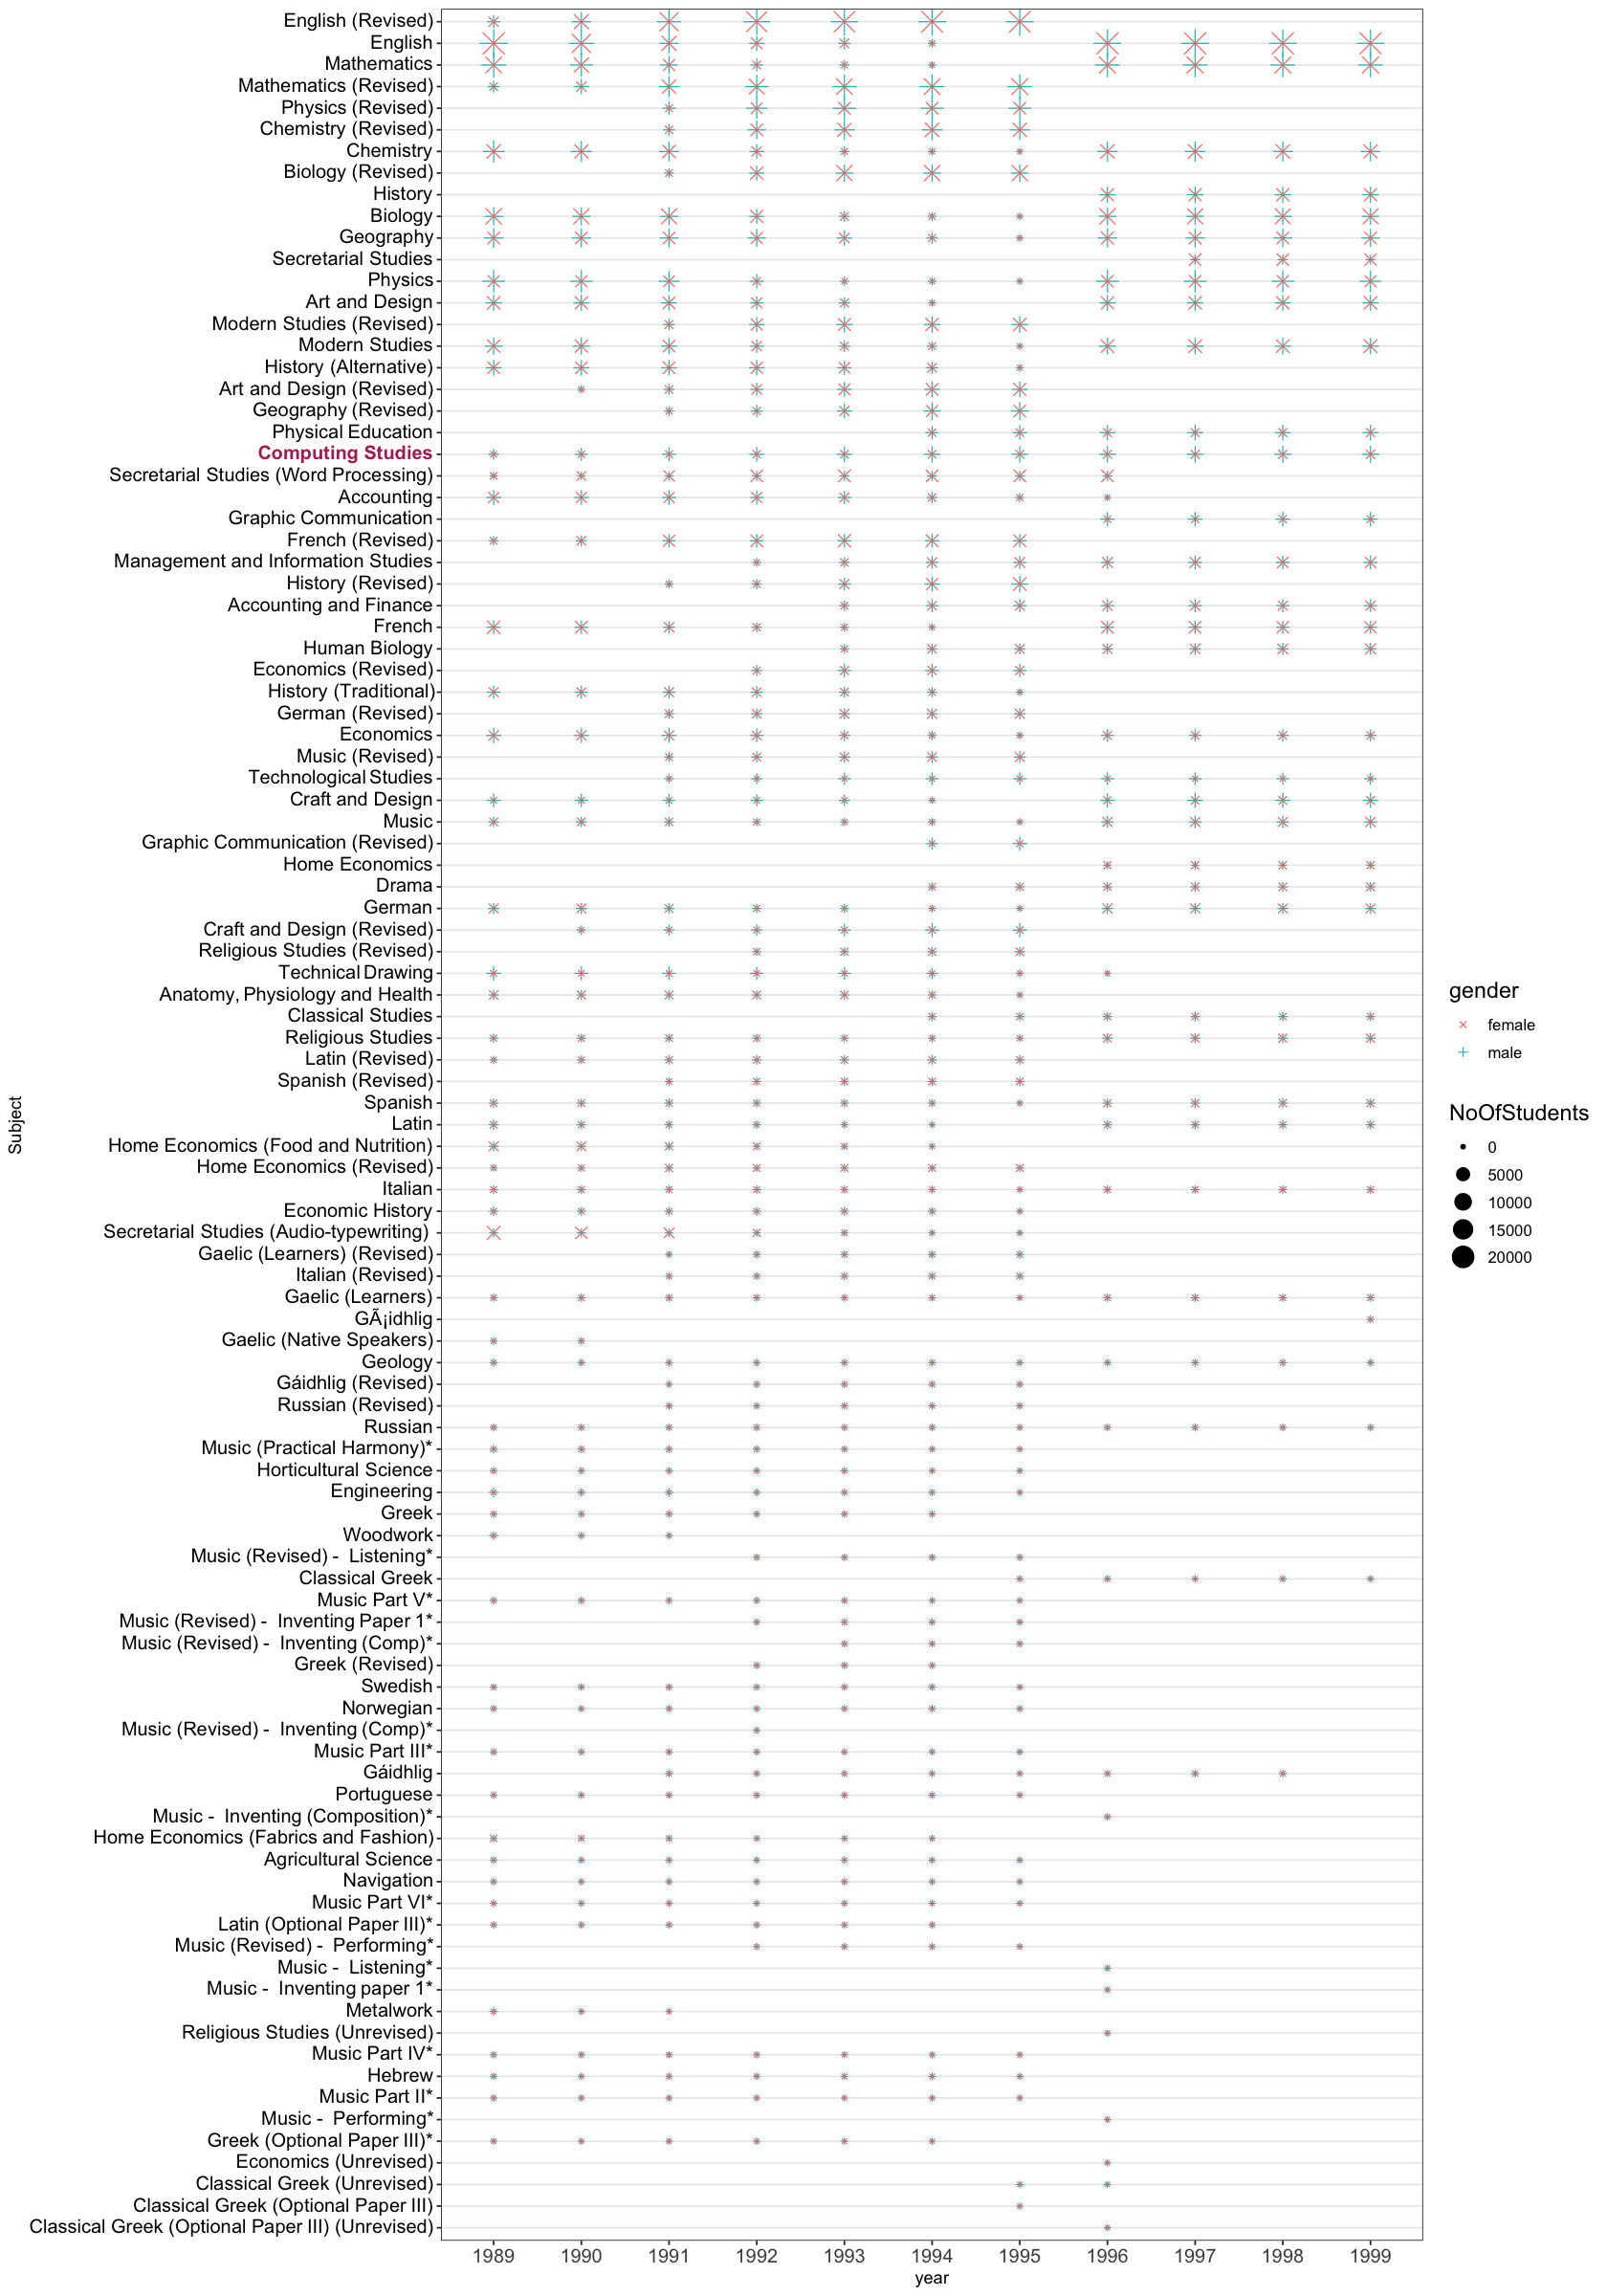

In [43]:
tmp_df <- tmp_df %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot... and na.rm in fct_reorder is iffy ..

    mutate(Subject.label = eval(formatted_subject_labels_as_expr),
           Subject.label = fct_reorder(Subject.label, NoOfStudents)) 

#head(tmp_df)

# not a good plot, a bit too busy with geom-segment, this is only slightly better, but have the relative size issue
# TODO - generate a line plot, or ideally, parallel coords

options(repr.plot.width = 14, repr.plot.height = 20)
tmp_df %>%
    #head(15) %>%
    filter(!(gender %in% c("all"))) %>% 

    ggplot(aes(y = Subject.label, x = year)) +
        geom_point(aes(size = NoOfStudents, shape = gender, colour = gender)) +
        ylab("Subject") +
        scale_shape_manual(values = c(4, 3)) +
        dressCodeTheme 

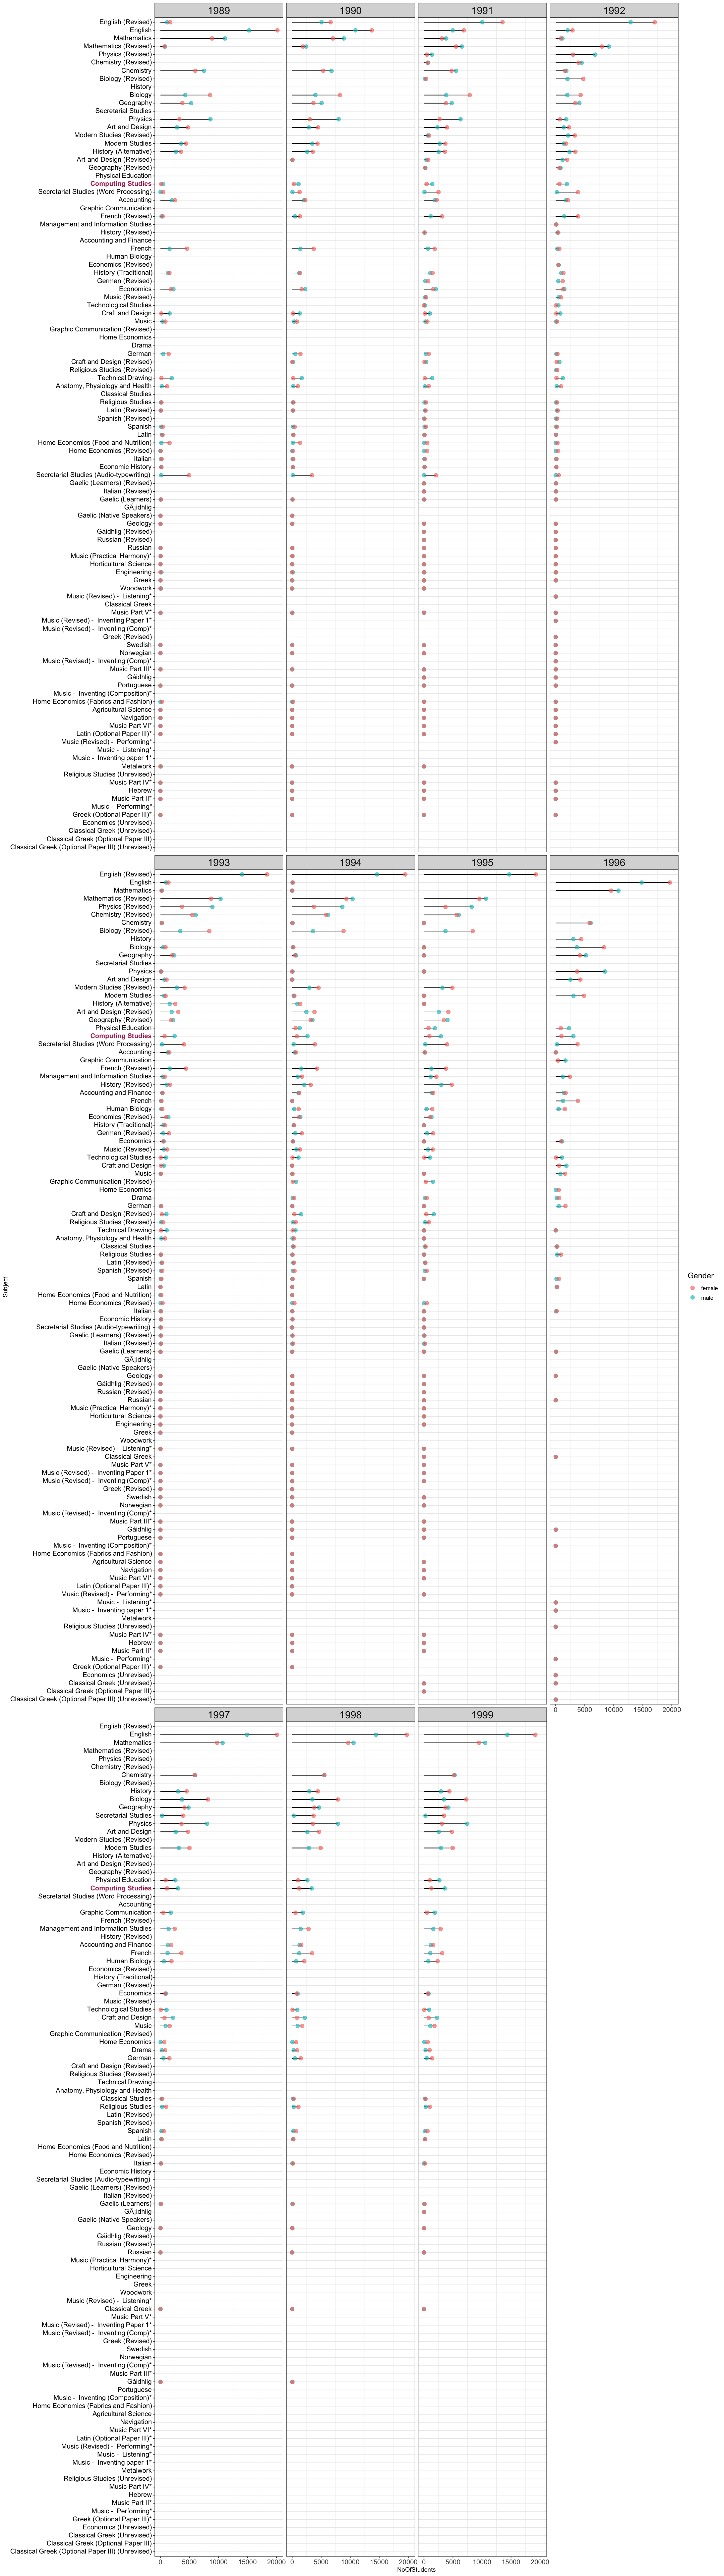

In [44]:
options(repr.plot.width = 18, repr.plot.height = 64)

tmp_df %>%
    filter(!(gender %in% c("all"))) %>% 

    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_segment(aes(xend = 0, yend = Subject.label)) +
        geom_point(aes(colour = as.factor(gender)), size = 3, alpha = 0.65, na.rm = T) +
        ylab("Subject") +
        scale_colour_discrete(name = "Gender") +
        dressCodeTheme + 
        facet_wrap(~ as.factor(year))


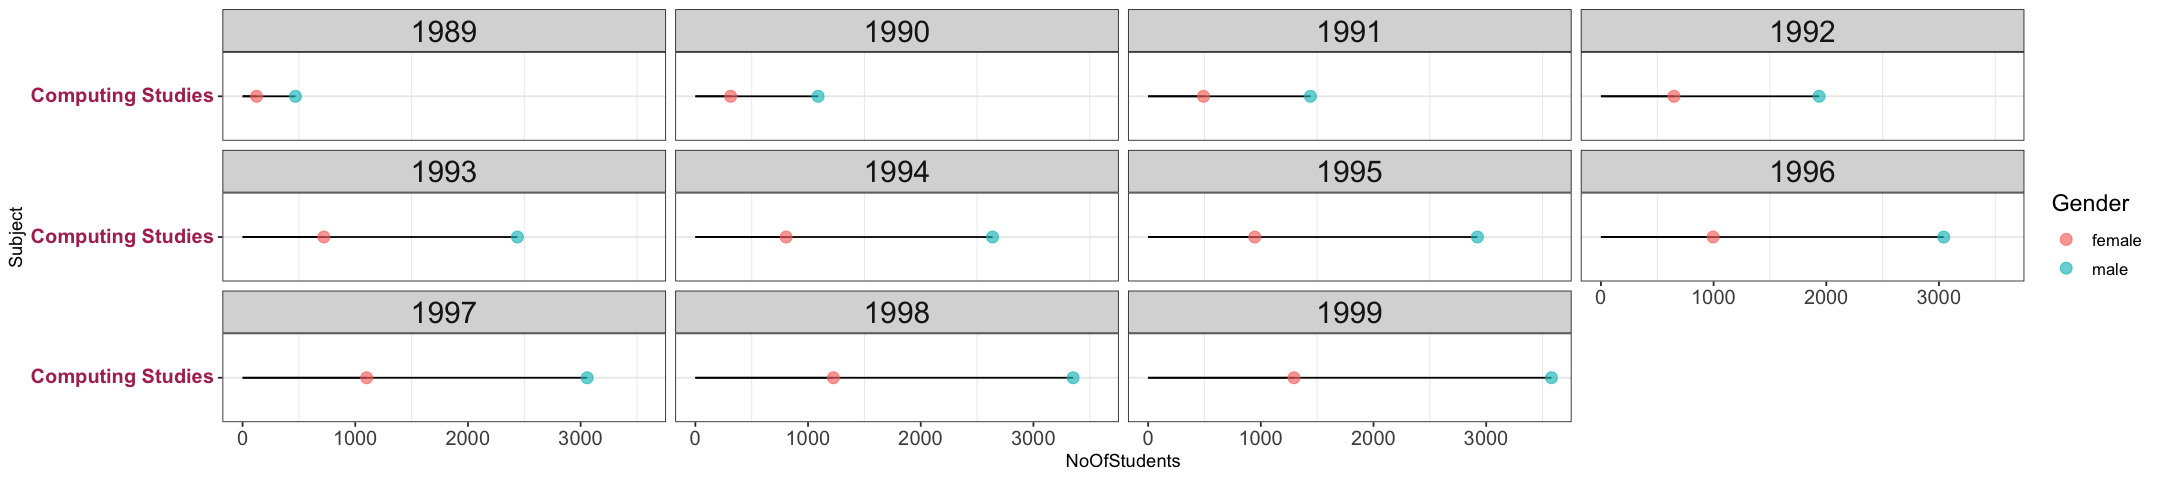

In [45]:

options(repr.plot.width = 18, repr.plot.height = 4)
tmp_df %>%
    filter(str_detect(Subject, regex(focus_subject, ignore_case = TRUE)) & 
           !(gender %in% c("all"))) %>% 

    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_segment(aes(xend = 0, yend = Subject.label)) +
        geom_point(aes(colour = as.factor(gender)), size = 3, alpha = 0.65, na.rm = T) +
        ylab("Subject") +
        scale_colour_discrete(name = "Gender") +
        dressCodeTheme + 
        facet_wrap(~ as.factor(year))



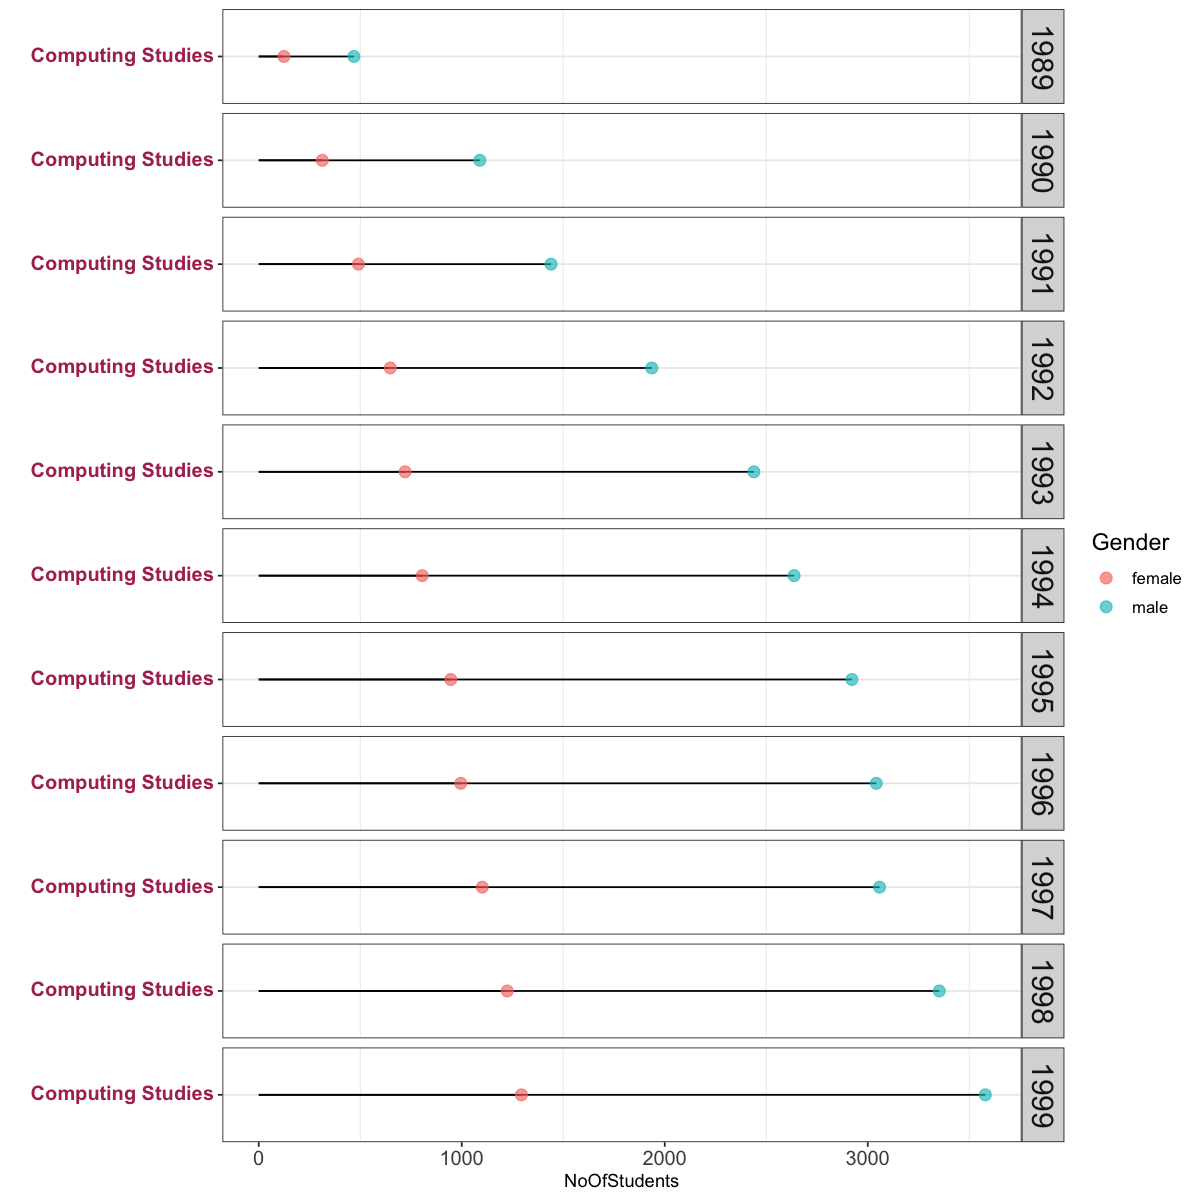

In [46]:

options(repr.plot.width = 10, repr.plot.height = 10)
tmp_df %>%
    filter(str_detect(Subject, regex(focus_subject, ignore_case = TRUE)) & 
           !(gender %in% c("all"))) %>% 

    ggplot(aes(y = Subject.label, x = NoOfStudents)) +
        geom_segment(aes(xend = 0, yend = Subject.label)) +
        geom_point(aes(colour = as.factor(gender)), size = 3, alpha = 0.65, na.rm = T) +
        ylab("") +
        scale_colour_discrete(name = "Gender") +
        dressCodeTheme + 
        facet_grid(as.factor(year) ~ .)




In [47]:
rm(tmp_df)

dbDisconnect(dbConn)
unlink(paste0(path_to_file_store, "/sqa-data-db.sqlite"))
